# <u>XYZ Ads Airing Report Analysis - Sagir Mehmood

### Description: 
This dataset having different TV Airing Brands, their product, and their category. The dataset includes the network through which Ads are airing,  types of networks like Cable/ Broadcast, and the show name also on which Ads got aired. The dataset includes the data of Dayparts, Time zone, and the time & date at which Ads got aired. It also includes other data like Pod Position (the lesser the valuable), the duration for which Ads aired on screen, Equivalent sales &, and the total amount spent on the Ads aired. 

### Objective: 
- a.	What is Pod Position? Does the Pod position number affect the amount spent on Ads for a specific period by a company? 
- b.	What is the share of various brands in TV airings and how has it changed from Q1 to Q4 in 2021?
- c.	Conduct a competitive analysis for the brands and define the advertisement strategy of different brands and how it differs across the brands. 
- d.	Mahindra and Mahindra want to run a digital ad campaign to complement its existing TV ads in Q1 of 2022. Based on the data from 2021, suggest a media plan to the CMO of Mahindra and Mahindra. Which audience should they target? 


### Approach: 
Here I am explaining my analysis approach below steps:
`STEP 1`: Data importing and understanding the data 1st, I imported the
Dataset (‘XYZ_Ads_Airings_Data.xlsx’), then I thoroughly
read every column of the dataset.
`STEP 2`: Data cleaning
   - i. First, I looked for columns (Date-Time) which are wrongly labeled and
        corrected them (Timestamp).
        ##### `Time of the day`
        - Eary-Morning  5 am to 9 am
        - Morning       9 am to 12 pm
        - Afternoon     12 pm to 5 pm
        - Evening       5 pm to 9 pm
        - Night         9 pm to 12 am
        - Mid-Night     12 am to 5 am
        
   - ii. Then, I looked for null values but fortunately, there is no missing data.
   - iii. Checked outliers. Here I have used Q1 as the 20th percentile and Q3 as the
        80th percentile of the data.
   - iv. Added a column named Day_Time, which indicates the time of the day,
        such as Early morning, Morning, Afternoon,.. etc.
   - v. Replaced the day number with the proper day name, such as day 1: Monday.
   - vi. Replaced the month number with the proper month name, such as month 1:
        January.
`STEP 3:` EDA 


In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Adjust Jupyter view
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [4]:
# Importing ads airing report
raw_data = pd.read_excel("XYZ_Ads_Airings_Data.xlsx",'XYZ_Ads_Airings_Data')

In [5]:
raw_data.head()

,Id,Brand,Product,Network,Network Type,Show,Date,Time,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Year,Broadcast Month,Broadcast Week,Day Of Week,Hour Of Day,TimeZone
0,1000001,Honda Cars,Honda Jazz,N-10079,cable,S-16736,01/10/2021,10:19:08 PM,1,PRIME TIME,30,1.0,178,2021,JAN,2,7,22,Northeast India
1,1000002,Maruti Suzuki,Maruti Suzuki Baleno,N-10096,cable,S-17450,01/16/2021,7:28:13 PM,3,WEEKEND,30,1.0,514,2021,JAN,3,6,19,Northeast India
2,1000003,Maruti Suzuki,Maruti Suzuki Ciaz,N-10044,cable,S-12299,01/05/2021,1:09:26 PM,2,DAYTIME,30,1.0,2313,2021,JAN,2,2,13,Northeast India
3,1000004,Maruti Suzuki,Maruti Suzuki Ciaz,N-10060,cable,S-14354,01/06/2021,8:55:49 AM,1,EARLY MORNING,30,1.0,308,2021,JAN,2,3,8,Northeast India
4,1000005,Hyundai Motors India,Hyundai I20,N-10123,cable,S-15146,01/02/2021,11:07:43 PM,2,LATE FRINGE,30,1.0,1885,2021,JAN,1,6,23,Northeast India


In [1]:
#raw_data.loc[raw_data['Broadcast Year']==2021,['Broadcast Month','Broadcast Year','Date']]

In [2]:
#raw_data.loc[raw_data['Broadcast Year']==2022,['Broadcast Month','Broadcast Year','Date']]

In [8]:
data=raw_data.copy()

In [9]:
data.shape

(731784, 19)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731784 entries, 0 to 731783
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Id               731784 non-null  int64  
 1   Brand            731784 non-null  object 
 2   Product          731784 non-null  object 
 3   Network          731784 non-null  object 
 4   Network Type     731784 non-null  object 
 5   Show             731784 non-null  object 
 6   Date             731784 non-null  object 
 7   Time             731784 non-null  object 
 8   Pod Position     731784 non-null  int64  
 9   Dayparts         731784 non-null  object 
 10  Duration         731784 non-null  int64  
 11  EQ Units         731784 non-null  float64
 12  Spend ($)        731784 non-null  int64  
 13  Broadcast Year   731784 non-null  int64  
 14  Broadcast Month  731784 non-null  object 
 15  Broadcast Week   731784 non-null  int64  
 16  Day Of Week      731784 non-null  int6

In [11]:
data.describe()

,Id,Pod Position,Duration,EQ Units,Spend ($),Broadcast Year,Broadcast Week,Day Of Week,Hour Of Day
count,7.317840e+05,731784.000000,731784.000000,731784.000000,7.317840e+05,731784.000000,731784.000000,731784.000000,731784.000000
mean,1.365892e+06,4.225938,26.766443,0.892311,1.902833e+03,2021.011811,24.406377,4.029390,12.664387
std,2.112480e+05,3.175515,8.725895,0.290627,8.537470e+03,0.108034,14.757142,2.006631,6.927000
min,1.000001e+06,1.000000,5.000000,0.170000,0.000000e+00,2021.000000,1.000000,1.000000,0.000000
25%,1.182947e+06,2.000000,30.000000,1.000000,1.270000e+02,2021.000000,11.000000,2.000000,8.000000
50%,1.365892e+06,3.000000,30.000000,1.000000,5.050000e+02,2021.000000,24.000000,4.000000,13.000000
75%,1.548838e+06,6.000000,30.000000,1.000000,1.516000e+03,2021.000000,36.000000,6.000000,19.000000
max,1.731784e+06,31.000000,120.000000,4.000000,5.500000e+06,2022.000000,52.000000,7.000000,23.000000


### Checking numeric columns and categorical columns

In [12]:
data_type=data.dtypes

In [13]:
# Numeric columns
data_num = list(data_type[data_type !='object'].index)
data_num

['Id',
 'Pod Position',
 'Duration',
 'EQ Units',
 'Spend ($)',
 'Broadcast Year',
 'Broadcast Week',
 'Day Of Week',
 'Hour Of Day']

In [14]:
len(data_num)

9

In [15]:
# Categoric columns
data_catg = list(data_type[data_type =='object'].index)
data_catg

['Brand',
 'Product',
 'Network',
 'Network Type',
 'Show',
 'Date',
 'Time',
 'Dayparts',
 'Broadcast Month',
 'TimeZone']

In [16]:
len(data_catg)

10

In [17]:
data.shape

(731784, 19)

# Data Cleaning

 ## 1. Check : Columns data

In [18]:
data.loc[data['Broadcast Year']==2021,['Broadcast Month','Broadcast Year','Date']]

,Broadcast Month,Broadcast Year,Date
0,JAN,2021,01/10/2021
1,JAN,2021,01/16/2021
2,JAN,2021,01/05/2021
3,JAN,2021,01/06/2021
4,JAN,2021,01/02/2021
...,...,...,...
731772,DEC,2021,12/24/2021
731774,DEC,2021,12/20/2021
731777,DEC,2021,12/26/2021
731780,DEC,2021,12/26/2021


In [19]:
data.loc[data['Broadcast Year']==2022,['Broadcast Month','Broadcast Year','Date']]

,Broadcast Month,Broadcast Year,Date
709177,JAN,2022,12/31/2021
709178,JAN,2022,12/31/2021
709179,JAN,2022,12/31/2021
709180,JAN,2022,12/31/2021
709181,JAN,2022,12/31/2021
...,...,...,...
731776,JAN,2022,12/30/2021
731778,JAN,2022,12/29/2021
731779,JAN,2022,12/27/2021
731781,JAN,2022,12/29/2021


- ###### When 'Broadcast Year' is 2022, we can see that all 'Broadcast Month' are lablled as 'JAN, where as Date's year is 2021.
- ###### So, here I am dropping these two columns

In [20]:
x=["Broadcast Month","Broadcast Year"]
data.drop(x,axis=1,inplace=True)

In [21]:
data

,Id,Brand,Product,Network,Network Type,Show,Date,Time,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Week,Day Of Week,Hour Of Day,TimeZone
0,1000001,Honda Cars,Honda Jazz,N-10079,cable,S-16736,01/10/2021,10:19:08 PM,1,PRIME TIME,30,1.0,178,2,7,22,Northeast India
1,1000002,Maruti Suzuki,Maruti Suzuki Baleno,N-10096,cable,S-17450,01/16/2021,7:28:13 PM,3,WEEKEND,30,1.0,514,3,6,19,Northeast India
2,1000003,Maruti Suzuki,Maruti Suzuki Ciaz,N-10044,cable,S-12299,01/05/2021,1:09:26 PM,2,DAYTIME,30,1.0,2313,2,2,13,Northeast India
3,1000004,Maruti Suzuki,Maruti Suzuki Ciaz,N-10060,cable,S-14354,01/06/2021,8:55:49 AM,1,EARLY MORNING,30,1.0,308,2,3,8,Northeast India
4,1000005,Hyundai Motors India,Hyundai I20,N-10123,cable,S-15146,01/02/2021,11:07:43 PM,2,LATE FRINGE,30,1.0,1885,1,6,23,Northeast India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731779,1731780,Honda Cars,Honda Civiz,N-10016,cable,S-21075,12/27/2021,7:36:26 PM,4,PRIME ACCESS,15,0.5,66,1,1,19,Northeast India
731780,1731781,Hyundai Motors India,Hyundai I20,N-10092,cable,S-18143,12/26/2021,5:03:33 PM,14,WEEKEND,30,1.0,751,52,7,17,Northeast India
731781,1731782,Maruti Suzuki,Maruti Suzuki Baleno,N-10041,cable,S-19396,12/29/2021,11:25:10 AM,2,DAYTIME,30,1.0,594,1,3,11,Northeast India
731782,1731783,Maruti Suzuki,Maruti Suzuki Baleno,N-10113,cable,S-19407,12/31/2021,11:54:13 AM,1,DAYTIME,30,1.0,40,1,5,11,Northeast India


 ## 2. Check : Columns Formating  

In [22]:
data_type=data.dtypes
data_num = list(data_type[data_type=='int64'].index)
data_float = list(data_type[data_type=='float64'].index)
for i in data_float:
    data_num.append(i)
data_catg = list(data_type[data_type=='object'].index)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731784 entries, 0 to 731783
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Id              731784 non-null  int64  
 1   Brand           731784 non-null  object 
 2   Product         731784 non-null  object 
 3   Network         731784 non-null  object 
 4   Network Type    731784 non-null  object 
 5   Show            731784 non-null  object 
 6   Date            731784 non-null  object 
 7   Time            731784 non-null  object 
 8   Pod Position    731784 non-null  int64  
 9   Dayparts        731784 non-null  object 
 10  Duration        731784 non-null  int64  
 11  EQ Units        731784 non-null  float64
 12  Spend ($)       731784 non-null  int64  
 13  Broadcast Week  731784 non-null  int64  
 14  Day Of Week     731784 non-null  int64  
 15  Hour Of Day     731784 non-null  int64  
 16  TimeZone        731784 non-null  object 
dtypes: float64

#### Here Date and time both are in object form, I need to covert it to proper datetime format.
- ##### I shall 1st merge both the columns then I shall convert them to datetime format.

###### ` Creating a new column, named "Date_Time"`

In [24]:
data['Date_Time'] = data['Date']+ " " +data['Time']

In [25]:
data['Date_Time'].head()

0    01/10/2021 10:19:08 PM
1     01/16/2021 7:28:13 PM
2     01/05/2021 1:09:26 PM
3     01/06/2021 8:55:49 AM
4    01/02/2021 11:07:43 PM
Name: Date_Time, dtype: object

###### ` Converting the column into proper datetime format`

In [26]:
data['Date_Time'] = pd.to_datetime(data['Date_Time'])

In [27]:
data['Date_Time'].head()

0   2021-01-10 22:19:08
1   2021-01-16 19:28:13
2   2021-01-05 13:09:26
3   2021-01-06 08:55:49
4   2021-01-02 23:07:43
Name: Date_Time, dtype: datetime64[ns]

In [28]:
data['Date_Time'].dt.time.head()

0    22:19:08
1    19:28:13
2    13:09:26
3    08:55:49
4    23:07:43
Name: Date_Time, dtype: object

In [29]:
data['Date_Time'].dt.date.head()

0    2021-01-10
1    2021-01-16
2    2021-01-05
3    2021-01-06
4    2021-01-02
Name: Date_Time, dtype: object

In [30]:
data['Date_Time'].dt.day.head()

0    10
1    16
2     5
3     6
4     2
Name: Date_Time, dtype: int64

In [31]:
data['Date_Time'].dt.month.head()

0    1
1    1
2    1
3    1
4    1
Name: Date_Time, dtype: int64

In [32]:
data['Date_Time'].dt.date[1]-data['Date_Time'].dt.date[0]

datetime.timedelta(days=6)

In [33]:
data['Date_Time'].dt.hour.head()

0    22
1    19
2    13
3     8
4    23
Name: Date_Time, dtype: int64

### `Remove: both the "Date" and "Time"  columns.`

In [34]:
x=["Date" , "Time"]
data.drop(x,axis=1,inplace=True)

### `Add: "Broadcast Month"  columns.`

In [35]:
data['Broadcast Month'] = data['Date_Time'].dt.month

In [36]:
data['Broadcast Month'].head()

0    1
1    1
2    1
3    1
4    1
Name: Broadcast Month, dtype: int64

##### Now, replacing the month number with month name.

In [37]:
data['Broadcast Month']=data['Broadcast Month'].replace(1,'Jan').replace(2,'Feb').replace(3,'Mar').replace(4,'Apr').replace(5,'May').replace(6,'Jun').replace(7,'Jul').replace(8,'Aug').replace(9,'Sep').replace(10,'Oct').replace(11,'Nov').replace(12,'Dec')

In [38]:
data['Broadcast Month'].head()

0    Jan
1    Jan
2    Jan
3    Jan
4    Jan
Name: Broadcast Month, dtype: object

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731784 entries, 0 to 731783
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Id               731784 non-null  int64         
 1   Brand            731784 non-null  object        
 2   Product          731784 non-null  object        
 3   Network          731784 non-null  object        
 4   Network Type     731784 non-null  object        
 5   Show             731784 non-null  object        
 6   Pod Position     731784 non-null  int64         
 7   Dayparts         731784 non-null  object        
 8   Duration         731784 non-null  int64         
 9   EQ Units         731784 non-null  float64       
 10  Spend ($)        731784 non-null  int64         
 11  Broadcast Week   731784 non-null  int64         
 12  Day Of Week      731784 non-null  int64         
 13  Hour Of Day      731784 non-null  int64         
 14  TimeZone         731

## 3. Check: Outliers

In [40]:
data_type = data.dtypes
data_num = list(data_type[data_type=='int64'].index)
data_float = list(data_type[data_type=='float64'].index)
for i in data_float:
    data_num.append(i)
data_catg = list(data_type[data_type=='object'].index)

In [41]:
def outliers(df):
    outliers=[]
    
    data_type = df.dtypes
    df_num = list(data_type[data_type=='int64'].index)
    df_float = list(data_type[data_type=='float64'].index)
    for i in df_float:
        df_num.append(i) # Defining the numeric variable
    
    for i in df_num:
        Q1 = df[i].quantile(0.20) # Quartile 1 at 20th percentile
        Q3 = df[i].quantile(0.80) # Quartile 3 at 80th percentile
        IQR = Q3 - Q1         # Interquartile range
        mn = min(df[i])
        mx = max(df[i])
        ll = Q1-(1.5*IQR)
        ul = Q3+(1.5*IQR)
        me =df[i].mean()
        md = df[i].median()
        if mn<ll or mx>ul:
            outliers.append([i,np.format_float_positional(mn),np.format_float_positional(ll),np.format_float_positional(ul),np.format_float_positional(mx),np.format_float_positional(me),md,"YES"])
        else:
            outliers.append([i,np.format_float_positional(mn),np.format_float_positional(ll),np.format_float_positional(ul),np.format_float_positional(mx),np.format_float_positional(me),md,"NO"])

  
    outliers = pd.DataFrame(outliers, columns=['Column name','Min','Lower limit','Upper Limit','Max','Mean','Median','Outliers'])
    return outliers.sort_values(by='Outliers', ascending=False)

    
    

In [42]:
outliers(data)

,Column name,Min,Lower limit,Upper Limit,Max,Mean,Median,Outliers
1,Pod Position,1.,-8.,16.,31.,4.225938255004209,3.0,YES
2,Duration,5.,-7.5,52.5,120.,26.766443376734117,30.0,YES
3,Spend ($),0.,-2764.5,4847.5,5500000.,1902.8327511943414,505.0,YES
7,EQ Units,0.17,-0.25,1.75,4.,0.8923107365016018,1.0,YES
0,Id,1000001.,487752.9000000004,2244032.0999999996,1731784.,1365892.5,1365892.5,NO
4,Broadcast Week,1.,-36.,84.,52.,24.40637674505045,24.0,NO
5,Day Of Week,1.,-4.,12.,7.,4.02938981994687,4.0,NO
6,Hour Of Day,0.,-15.,41.,23.,12.664387305543713,13.0,NO


##### - Visualization of outliers

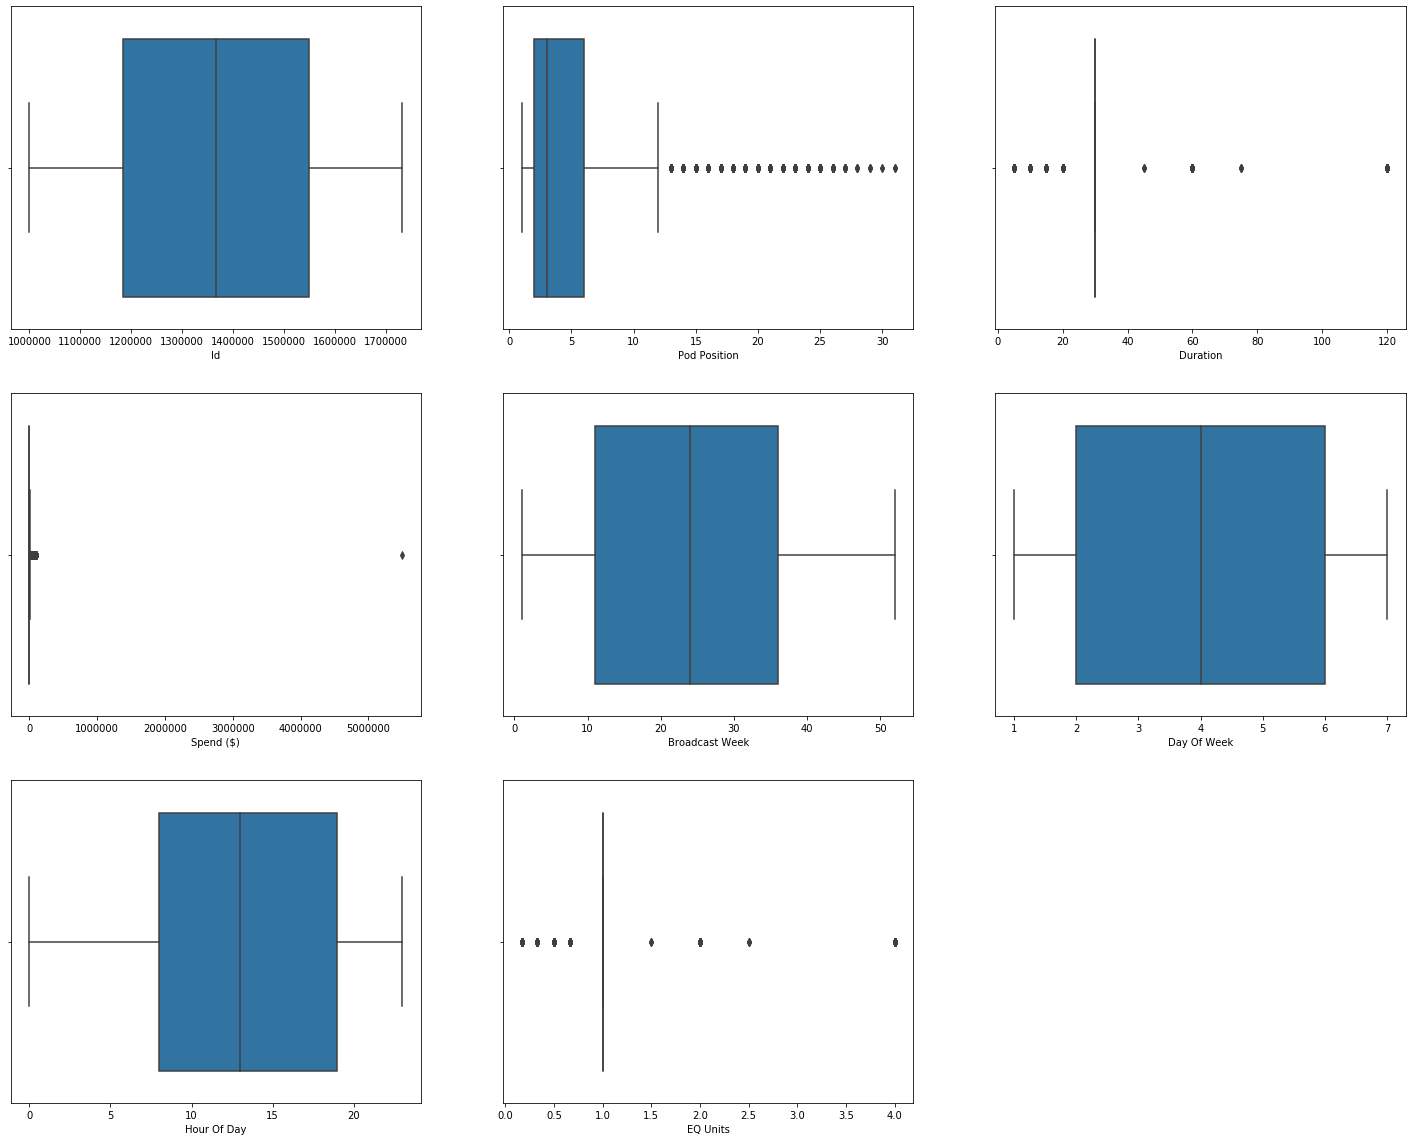

In [43]:
plt.figure(figsize = (25,70))
for i in enumerate(data_num): 
    ax = plt.subplot(10, 3, i[0]+1)
    sns.boxplot(data[i[1]])

#### In the above visualization, it is observabale that 'Pod Position', 'Duration', and 'Spend' columns contains outliers.

# 4. Check: Null values

In [44]:
data.isnull().sum()

Id                 0
Brand              0
Product            0
Network            0
Network Type       0
Show               0
Pod Position       0
Dayparts           0
Duration           0
EQ Units           0
Spend ($)          0
Broadcast Week     0
Day Of Week        0
Hour Of Day        0
TimeZone           0
Date_Time          0
Broadcast Month    0
dtype: int64

#### Fortunately there are no missing values in the dataset

## 5. Replacing the numbers with objects

In [45]:
data.head()

,Id,Brand,Product,Network,Network Type,Show,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Week,Day Of Week,Hour Of Day,TimeZone,Date_Time,Broadcast Month
0,1000001,Honda Cars,Honda Jazz,N-10079,cable,S-16736,1,PRIME TIME,30,1.0,178,2,7,22,Northeast India,2021-01-10 22:19:08,Jan
1,1000002,Maruti Suzuki,Maruti Suzuki Baleno,N-10096,cable,S-17450,3,WEEKEND,30,1.0,514,3,6,19,Northeast India,2021-01-16 19:28:13,Jan
2,1000003,Maruti Suzuki,Maruti Suzuki Ciaz,N-10044,cable,S-12299,2,DAYTIME,30,1.0,2313,2,2,13,Northeast India,2021-01-05 13:09:26,Jan
3,1000004,Maruti Suzuki,Maruti Suzuki Ciaz,N-10060,cable,S-14354,1,EARLY MORNING,30,1.0,308,2,3,8,Northeast India,2021-01-06 08:55:49,Jan
4,1000005,Hyundai Motors India,Hyundai I20,N-10123,cable,S-15146,2,LATE FRINGE,30,1.0,1885,1,6,23,Northeast India,2021-01-02 23:07:43,Jan


##### Here 'Day Of Week' columns contain 7 unique numbers, they are 1 to 7.Here 1 denotes Monday, 2 denotes Tuesday, and so on..
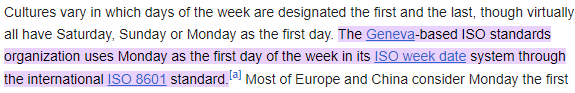
##### Thus I am replacing all the numbers with proper days.

In [46]:
data['Day Of Week'].head()

0    7
1    6
2    2
3    3
4    6
Name: Day Of Week, dtype: int64

In [47]:
min(data['Day Of Week'])

1

In [48]:
max(data['Day Of Week'])

7

In [49]:
data['Day Of Week']=data['Day Of Week'].replace(1,'Mon').replace(2,'Tues').replace(3,'Wed').replace(4,'Thurs').replace(5,'Fri').replace(6,'Sat').replace(7,'Sun')

In [50]:
data['Day Of Week'].head()

0     Sun
1     Sat
2    Tues
3     Wed
4     Sat
Name: Day Of Week, dtype: object

In [51]:
data.head()

,Id,Brand,Product,Network,Network Type,Show,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Week,Day Of Week,Hour Of Day,TimeZone,Date_Time,Broadcast Month
0,1000001,Honda Cars,Honda Jazz,N-10079,cable,S-16736,1,PRIME TIME,30,1.0,178,2,Sun,22,Northeast India,2021-01-10 22:19:08,Jan
1,1000002,Maruti Suzuki,Maruti Suzuki Baleno,N-10096,cable,S-17450,3,WEEKEND,30,1.0,514,3,Sat,19,Northeast India,2021-01-16 19:28:13,Jan
2,1000003,Maruti Suzuki,Maruti Suzuki Ciaz,N-10044,cable,S-12299,2,DAYTIME,30,1.0,2313,2,Tues,13,Northeast India,2021-01-05 13:09:26,Jan
3,1000004,Maruti Suzuki,Maruti Suzuki Ciaz,N-10060,cable,S-14354,1,EARLY MORNING,30,1.0,308,2,Wed,8,Northeast India,2021-01-06 08:55:49,Jan
4,1000005,Hyundai Motors India,Hyundai I20,N-10123,cable,S-15146,2,LATE FRINGE,30,1.0,1885,1,Sat,23,Northeast India,2021-01-02 23:07:43,Jan


## 6. Adding two more columns to get the time of the day (e.g: Morning, Afternoon, Evening and Night) and Quarters of the year (e.g: Q1,Q2,Q3,Q4)

##### `Time of the day`
- Eary-Morning  5 am to 9 am
- Morning       9 am to 12 pm
- Afternoon     12 pm to 5 pm
- Evening       5 pm to 9 pm
- Night         9 pm to 12 am
- Mid-Night     12 am to 5 am

In [52]:
print(min(data['Date_Time'].dt.hour),max(data['Date_Time'].dt.hour))

0 23


In [53]:
bins = [-1,4,9,11,16,20,24]
slot = ['Mid-night','Early-morning ','Morning','Afternoon','Evening','Night']

data['Day_Time']=pd.cut(data['Date_Time'].dt.hour,bins,labels=slot)

In [54]:
# Check
data.loc[data['Date_Time'].dt.hour==10,['Date_Time','Day_Time']].head()

,Date_Time,Day_Time
12,2021-01-13 10:55:51,Morning
32,2021-01-07 10:18:16,Morning
84,2021-01-09 10:17:36,Morning
97,2021-01-06 10:13:15,Morning
100,2021-01-03 10:17:05,Morning


##### `Quarters of the year`
- Q1: 1 January – 31 March 
- Q2: 1 April – 30 June  
- Q3: 1 July – 30 September  
- Q4: 1 October – 31 December 

In [55]:
print(min(data['Date_Time'].dt.month),max(data['Date_Time'].dt.month))

1 12


In [56]:
bins = [0,3,6,9,12]
slot = ['Q1','Q2','Q3','Q4']

data['Quarters']=pd.cut(data['Date_Time'].dt.month,bins,labels=slot)

In [57]:
# Check
data.loc[data['Date_Time'].dt.month==7,['Date_Time','Quarters']].head()

,Date_Time,Quarters
394101,2021-07-02 21:48:04,Q3
394102,2021-07-03 16:44:31,Q3
394103,2021-07-09 13:26:13,Q3
394104,2021-07-05 16:28:24,Q3
394105,2021-07-11 01:53:58,Q3


# EDA

In [58]:
data.head()

,Id,Brand,Product,Network,Network Type,Show,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Week,Day Of Week,Hour Of Day,TimeZone,Date_Time,Broadcast Month,Day_Time,Quarters
0,1000001,Honda Cars,Honda Jazz,N-10079,cable,S-16736,1,PRIME TIME,30,1.0,178,2,Sun,22,Northeast India,2021-01-10 22:19:08,Jan,Night,Q1
1,1000002,Maruti Suzuki,Maruti Suzuki Baleno,N-10096,cable,S-17450,3,WEEKEND,30,1.0,514,3,Sat,19,Northeast India,2021-01-16 19:28:13,Jan,Evening,Q1
2,1000003,Maruti Suzuki,Maruti Suzuki Ciaz,N-10044,cable,S-12299,2,DAYTIME,30,1.0,2313,2,Tues,13,Northeast India,2021-01-05 13:09:26,Jan,Afternoon,Q1
3,1000004,Maruti Suzuki,Maruti Suzuki Ciaz,N-10060,cable,S-14354,1,EARLY MORNING,30,1.0,308,2,Wed,8,Northeast India,2021-01-06 08:55:49,Jan,Early-morning,Q1
4,1000005,Hyundai Motors India,Hyundai I20,N-10123,cable,S-15146,2,LATE FRINGE,30,1.0,1885,1,Sat,23,Northeast India,2021-01-02 23:07:43,Jan,Night,Q1


In [59]:
data.shape

(731784, 19)

In [60]:
data.columns

Index(['Id', 'Brand', 'Product', 'Network', 'Network Type', 'Show', 'Pod Position', 'Dayparts', 'Duration', 'EQ Units', 'Spend ($)', 'Broadcast Week', 'Day Of Week', 'Hour Of Day', 'TimeZone', 'Date_Time', 'Broadcast Month', 'Day_Time', 'Quarters'], dtype='object')

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731784 entries, 0 to 731783
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Id               731784 non-null  int64         
 1   Brand            731784 non-null  object        
 2   Product          731784 non-null  object        
 3   Network          731784 non-null  object        
 4   Network Type     731784 non-null  object        
 5   Show             731784 non-null  object        
 6   Pod Position     731784 non-null  int64         
 7   Dayparts         731784 non-null  object        
 8   Duration         731784 non-null  int64         
 9   EQ Units         731784 non-null  float64       
 10  Spend ($)        731784 non-null  int64         
 11  Broadcast Week   731784 non-null  int64         
 12  Day Of Week      731784 non-null  object        
 13  Hour Of Day      731784 non-null  int64         
 14  TimeZone         731

In [62]:
def dtypes(df):
    
    cols=[]
    data_type=df.dtypes

    data_num = list(data_type[data_type=='int64'].index)
    data_float = list(data_type[data_type=='float64'].index)
    for i in data_float:
        data_num.append(i)

    data_catg = list(data_type[data_type=='object'].index)
    category =  list(data_type[data_type=='category'].index)
    for i in category:
        data_catg.append(i)
        
    cols.append(data_num)
    cols.append(data_catg)
    return(cols)

In [63]:
# numeric cols
dtypes(data)[0]

['Id',
 'Pod Position',
 'Duration',
 'Spend ($)',
 'Broadcast Week',
 'Hour Of Day',
 'EQ Units']

In [64]:
len(dtypes(data)[0])

7

In [65]:
# categoric cols
dtypes(data)[1]

['Brand',
 'Product',
 'Network',
 'Network Type',
 'Show',
 'Dayparts',
 'Day Of Week',
 'TimeZone',
 'Broadcast Month',
 'Day_Time',
 'Quarters']

In [66]:
len(dtypes(data)[1])

11

In [67]:
x=['Pod Position',
 'Duration',
 'Spend ($)',
 'Broadcast Week',
 'Hour Of Day',
 'EQ Units']

In [68]:
data[x].describe()

,Pod Position,Duration,Spend ($),Broadcast Week,Hour Of Day,EQ Units
count,731784.000000,731784.000000,7.317840e+05,731784.000000,731784.000000,731784.000000
mean,4.225938,26.766443,1.902833e+03,24.406377,12.664387,0.892311
std,3.175515,8.725895,8.537470e+03,14.757142,6.927000,0.290627
min,1.000000,5.000000,0.000000e+00,1.000000,0.000000,0.170000
25%,2.000000,30.000000,1.270000e+02,11.000000,8.000000,1.000000
50%,3.000000,30.000000,5.050000e+02,24.000000,13.000000,1.000000
75%,6.000000,30.000000,1.516000e+03,36.000000,19.000000,1.000000
max,31.000000,120.000000,5.500000e+06,52.000000,23.000000,4.000000


In [69]:
data[dtypes(data)[1]].describe()

,Brand,Product,Network,Network Type,Show,Dayparts,Day Of Week,TimeZone,Broadcast Month,Day_Time,Quarters
count,731784,731784,731784,731784,731784,731784,731784,731784,731784,731784,731784
unique,6,20,138,2,12659,9,7,4,12,6,4
top,Maruti Suzuki,Maruti Suzuki Baleno,N-10123,cable,S-19396,DAYTIME,Sat,Northeast India,Jan,Afternoon,Q1
freq,280274,161393,15176,670071,9666,159017,107752,707920,76199,162621,212968


## Q1. What is Pod Position? Does the Pod position number affect the amount spent on Ads for a specific period of time by a company? (Explain in Details with examples from the dataset provided)

## `Pod Position:`
Pod position refers to a certain advertisement's location within a particular commercial pod.

An ad pod is a collection of advertisements that are timed to play consecutively within a single ad break or placement, much like commercial breaks on conventional linear TV. Ad pods provide advertisers more control over ad positioning and give publishers the chance to maximize income from each ad break.


In [70]:
min(data['Spend ($)'])

0

In [71]:
data.loc[data['Spend ($)']==0,:]

,Id,Brand,Product,Network,Network Type,Show,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Week,Day Of Week,Hour Of Day,TimeZone,Date_Time,Broadcast Month,Day_Time,Quarters
1040,1001041,Maruti Suzuki,Maruti Suzuki Ciaz,N-10028,broadcast,S-16527,2,EARLY MORNING,30,1.0,0,2,Sun,8,Central India,2021-01-10 08:37:27,Jan,Early-morning,Q1
1777,1001778,Maruti Suzuki,Maruti Suzuki Ciaz,N-10028,broadcast,S-16527,2,EARLY MORNING,30,1.0,0,1,Sun,8,Central India,2021-01-03 08:35:45,Jan,Early-morning,Q1
4880,1004881,Mahindra and Mahindra,Mahindra New Thar,N-10090,cable,S-10956,3,PRIME TIME,30,1.0,0,3,Wed,22,Southern India,2021-01-13 22:38:50,Jan,Night,Q1
11602,1011603,Mahindra and Mahindra,Mahindra New Thar,N-10107,cable,S-11257,5,PRIME TIME,30,1.0,0,2,Mon,22,Northeast India,2021-01-04 22:49:20,Jan,Night,Q1
17382,1017383,Maruti Suzuki,Maruti Suzuki WagonR,N-10049,cable,S-21060,3,EARLY MORNING,30,1.0,0,3,Wed,8,Southern India,2021-01-13 08:49:49,Jan,Early-morning,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730947,1730948,Maruti Suzuki,Maruti Suzuki Baleno,N-10138,cable,S-20669,3,EARLY FRINGE,30,1.0,0,52,Mon,17,Northeast India,2021-12-20 17:46:35,Dec,Evening,Q4
731093,1731094,Maruti Suzuki,Maruti Suzuki Baleno,N-10138,cable,S-15547,2,WEEKEND,30,1.0,0,52,Sat,19,Northeast India,2021-12-25 19:52:45,Dec,Evening,Q4
731132,1731133,Mahindra and Mahindra,Mahindra New Thar,N-10138,cable,S-22574,3,EARLY FRINGE,30,1.0,0,52,Fri,16,Northeast India,2021-12-24 16:36:57,Dec,Afternoon,Q4
731267,1731268,Toyota,Toyota Etios,N-10090,cable,S-18497,4,EVENING NEWS,15,0.5,0,1,Mon,18,Southern India,2021-12-27 18:59:17,Dec,Evening,Q4


In [72]:
max(data['Spend ($)'])

5500000

In [73]:
data.loc[data['Spend ($)']==5500000,:]

,Id,Brand,Product,Network,Network Type,Show,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Week,Day Of Week,Hour Of Day,TimeZone,Date_Time,Broadcast Month,Day_Time,Quarters
93821,1093822,Hyundai Motors India,Hyundai I20,N-10020,broadcast,S-19607,4,PRIME TIME,30,1.0,5500000,6,Sun,19,Northeast India,2021-02-07 19:18:52,Feb,Evening,Q1


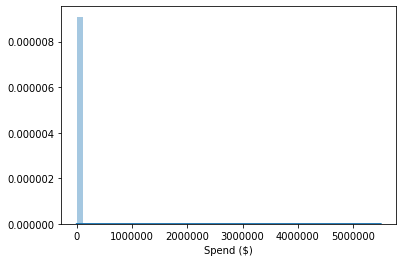

In [74]:
sns.distplot(data['Spend ($)'])

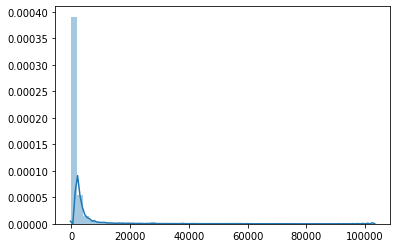

In [75]:
sns.distplot(data.loc[data['Spend ($)']<5500000,['Spend ($)']])

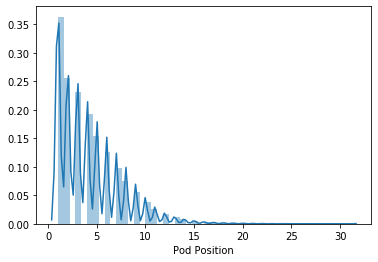

In [76]:
sns.distplot(data['Pod Position'])

### Pod Position v/s Spend

In [77]:
data['Pod Position'].corr(data['Spend ($)'])

-0.005715704123710858

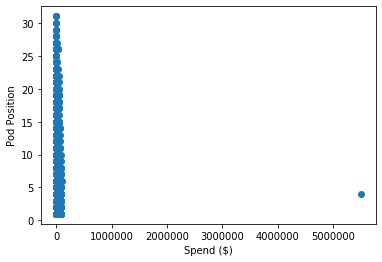

In [78]:
plt.scatter(data['Spend ($)'],data['Pod Position'])
plt.xlabel("Spend ($)")
plt.ylabel("Pod Position")
plt.show()

- #### For heigher spend pod position is lower, so there is an negative correlation.

#### Spend not equal `5500000`

In [79]:
spend_pod = data.loc[(data['Spend ($)']!=5500000)  ,['Brand','Product','Spend ($)','Pod Position']]

In [80]:
spend_pod['Pod Position'].corr(spend_pod['Spend ($)'])

-0.008588397568439706

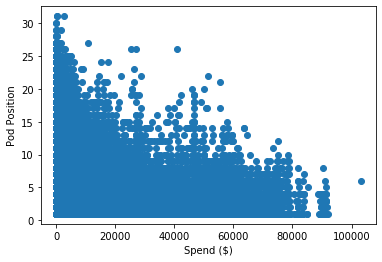

In [81]:
plt.scatter(spend_pod['Spend ($)'],spend_pod['Pod Position'])
plt.xlabel("Spend ($)")
plt.ylabel("Pod Position")
plt.show()

In [82]:
pod=data.groupby("Pod Position").sum()
pod.sort_values(by='Spend ($)', ascending=False)

,Id,Duration,EQ Units,Spend ($),Broadcast Week,Hour Of Day
Pod Position,,,,,,
1,219791426071,4400650,146700.94,324025029,3988739,1952381
3,138105734515,2718835,90638.03,196432582,2457927,1279669
2,152990651803,3040565,101358.69,187654622,2713447,1398589
4,115124270536,2249070,74977.98,178545699,2051333,1078711
5,92113750920,1786135,59545.62,132148569,1640883,865813
6,74922982851,1446720,48230.29,105981319,1328945,707755
7,58800935594,1131085,37707.73,77255099,1046037,557359
8,45536311410,872285,29080.24,58205928,812534,436211
9,33136810433,632965,21102.00,41909147,589604,318295


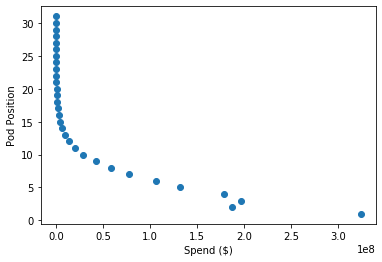

In [83]:
plt.scatter(pod['Spend ($)'],pod.index)
plt.xlabel("Spend ($)")
plt.ylabel("Pod Position")
plt.show()

- #### For heigher spend pod position is lower, so there is a negative correlation.

### Pod Position v/s Spend v/s Time period

##### In the above table columns 'Dayparts', 'Quarters','Broadcast Month','Broadcast Week','Day Of Week','Day_Time','Hour Of Day' denotes time period.

In [84]:
pst = data[['Brand','Product','Spend ($)','Pod Position','Dayparts', 'Quarters','Broadcast Month','Broadcast Week','Day Of Week','Day_Time','Hour Of Day','Date_Time']]

### Check: Pod Position v/s Spend v/s Quarters

In [85]:
qt = pst['Quarters'].unique()
qt

['Q1', 'Q2', 'Q3', 'Q4']
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [86]:
for i in enumerate(qt):
    spend_pod = pst.loc[(pst['Quarters']==i[1])  ,['Spend ($)','Pod Position']]
    print(i[1],spend_pod['Pod Position'].corr(spend_pod['Spend ($)']))

Q1 -0.002346744092481439
Q2 -0.0017880317310178682
Q3 -0.009426604522098238
Q4 -0.0182379614984312


#### `Among the quarters during Q4, Spend and Pod position have higher correlation.  Now I shall check for Q4 months, i.e. 1 October to 31 December`

In [89]:
mn=pst['Broadcast Month'].unique()

In [90]:
for i in enumerate(mn):
    spend_pod = pst.loc[(pst['Broadcast Month']==i[1])  ,['Spend ($)','Pod Position']]
    print(i[1],spend_pod['Pod Position'].corr(spend_pod['Spend ($)']))

Jan -0.015245464824936304
Feb -0.0011159015955460926
Mar 0.004779692605240327
Apr 0.0007444292349393261
May 0.006588735655925959
Jun -0.011694248055792212
Jul 0.0005991998224241765
Aug -0.010234287581361584
Sep -0.018527261625608044
Oct -0.03638207222404898
Nov -0.011971139404785017
Dec -0.004427221025674376


#### `Among the month during October month, Spend and Pod position have higher correlation.  Now I shall check for week and then days, i.e. Sunday, Monday, and others and then day parts..`

In [91]:
pst2= pst.loc[(pst['Broadcast Month']=='Oct')  ,:]

#### `Weeks`

In [92]:
week = pst2['Broadcast Week'].unique()

In [93]:
for i in enumerate(week):
    spend_pod = pst2.loc[(pst2['Broadcast Week']==i[1])  ,['Spend ($)','Pod Position']]
    print(i[1],spend_pod['Pod Position'].corr(spend_pod['Spend ($)']))

41 -0.03559771487259455
42 -0.031742642568943644
40 -0.0537867128025693
44 -0.033329049437539976
43 -0.03197243801453066


##### Except the 40th week, remaining in all weeks Spend and Pod position have same correlations

#### `Days`

In [100]:
day = pst2['Day Of Week'].unique()

In [101]:
for i in enumerate(day):
    spend_pod = pst2.loc[(pst2['Day Of Week']==i[1])  ,['Spend ($)','Pod Position']]
    print(i[1],spend_pod['Pod Position'].corr(spend_pod['Spend ($)']))

Sun -0.08212355911032239
Wed -0.017530075387944485
Tues -0.007175162882044321
Fri -0.0048148945294465345
Thurs -0.025835514643875943
Sat -0.0633484307677525
Mon 0.0020705501355392044


#### `Among the days during Saturday and Sunday, Spend and Pod position have higher correlation.  Now I shall check for day part`

In [102]:
dayp = pst2['Dayparts'].unique()

In [103]:
dayp

array(['OVERNIGHT', 'DAYTIME', 'EARLY MORNING', 'LATE FRINGE',
       'EARLY FRINGE', 'PRIME TIME', 'WEEKEND', 'EVENING NEWS',
       'PRIME ACCESS'], dtype=object)

In [104]:
for i in enumerate(dayp):
    spend_pod = pst2.loc[(pst2['Dayparts']==i[1])  ,['Spend ($)','Pod Position']]
    print(i[1],spend_pod['Pod Position'].corr(spend_pod['Spend ($)']))

OVERNIGHT 0.06003276642805156
DAYTIME 0.019098211444715837
EARLY MORNING 0.0778757164973569
LATE FRINGE 0.016887884380227532
EARLY FRINGE -0.02732347468497008
PRIME TIME -0.08678568014652345
WEEKEND -0.10923239140923695
EVENING NEWS 0.017123301246917955
PRIME ACCESS -0.06915141640952989


#### `Here also we can see that, during the weekend, Spend and Pod position have higher correlation.  Now I shall check for day time`

In [105]:
pst3 = pst2.loc[(pst2['Dayparts']=='WEEKEND')  ,:]

In [106]:
dayt = pst3['Day_Time'].unique()

In [107]:
for i in enumerate(dayt):
    spend_pod = pst3.loc[(pst3['Day_Time']==i[1])  ,['Spend ($)','Pod Position']]
    print(i[1],spend_pod['Pod Position'].corr(spend_pod['Spend ($)']))

Morning -0.017967176906109102
Afternoon -0.1280398543083124
Evening -0.12761166319531705
Early-morning  -0.020918483096198925


In [108]:
dayt

['Morning', 'Afternoon', 'Evening', 'Early-morning ']
Categories (6, object): ['Mid-night' < 'Early-morning ' < 'Morning' < 'Afternoon' < 'Evening' < 'Night']

#### `Final`

In [109]:
pst4 = pst3.loc[(pst3['Day_Time']=='Afternoon') | (pst3['Day_Time']=='Evening'),:]
#pst4 = pst4.loc[(pst4['Broadcast Week']==41) | (pst4['Broadcast Week']==42) | (pst4['Broadcast Week']==43) | (pst4['Broadcast Week']==44) ,:]

In [110]:
daytt = pst4['Day_Time'].unique()

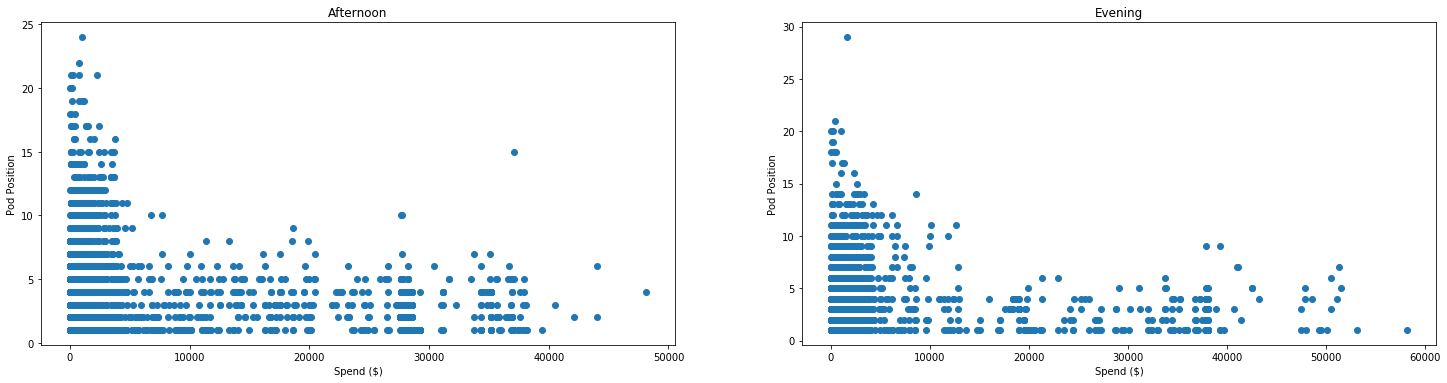

In [111]:
plt.figure(figsize = (25,70))
for i in enumerate(daytt):
    spend_pod = pst4.loc[(pst4['Day_Time']==i[1])  ,['Spend ($)','Pod Position']]
    ax = plt.subplot(10, 2, i[0]+1)
    plt.scatter(spend_pod['Spend ($)'],spend_pod['Pod Position'])
    plt.title(i[1])
    plt.xlabel("Spend ($)")
    plt.ylabel("Pod Position")

In [112]:
for i in enumerate(daytt):
    spend_pod = pst4.loc[(pst4['Day_Time']==i[1])  ,['Spend ($)','Pod Position']]
    print(i[1],spend_pod['Pod Position'].corr(spend_pod['Spend ($)']))

Afternoon -0.1280398543083124
Evening -0.12761166319531705


##### `Q4 -> Oct -> Weekend -> 12pm-9pm`   

##### `Time of the day`
- Morning       5 am to 12 pm
- Afternoon     12 pm to 5 pm
- Evening       5 pm to 9 pm
- Night         9 pm to 12 am
- Mid-Night     12 am to 5 am

# Q2. What is the share of various brands in TV airings and how has it changed from Q1 to Q4 in 2021?

In [113]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [114]:
def brnd_chng_count(col):
    df = data.copy()
    q1 = df.loc[df['Quarters']=='Q1',:]
    q2 = df.loc[df['Quarters']=='Q2',:]
    q3 = df.loc[df['Quarters']=='Q3',:]
    q4 = df.loc[df['Quarters']=='Q4',:]
    
    spend_q1_count = q1.pivot_table(values =col,index=['Brand'],aggfunc='count')
    spend_q1_count.rename(columns = {'Spend ($)':'Q1-Total'}, inplace = True)
    
    spend_q2_count = q2.pivot_table(values =col,index=['Brand'],aggfunc='count')
    spend_q2_count.rename(columns = {'Spend ($)':'Q2-Total'}, inplace = True)
    
    spend_q3_count = q3.pivot_table(values =col,index=['Brand'],aggfunc='count')
    spend_q3_count.rename(columns = {'Spend ($)':'Q3-Total'}, inplace = True)
    
    spend_q4_count = q4.pivot_table(values =col,index=['Brand'],aggfunc='count')
    spend_q4_count.rename(columns = {'Spend ($)':'Q4-Total'}, inplace = True) 
    
    x=pd.concat([spend_q1_count, spend_q2_count,spend_q3_count, spend_q4_count], axis=1)
    return x

In [115]:
def brnd_chng_sum(col):
    df = data.copy()
    q1 = df.loc[df['Quarters']=='Q1',:]
    q2 = df.loc[df['Quarters']=='Q2',:]
    q3 = df.loc[df['Quarters']=='Q3',:]
    q4 = df.loc[df['Quarters']=='Q4',:]
    
    spend_q1_sum = q1.pivot_table(values =col,index=['Brand'],aggfunc='sum')
    spend_q1_sum.rename(columns = {'Spend ($)':'Q1-Total'}, inplace = True)
    
    spend_q2_sum = q2.pivot_table(values =col,index=['Brand'],aggfunc='sum')
    spend_q2_sum.rename(columns = {'Spend ($)':'Q2-Total'}, inplace = True)
    
    spend_q3_sum = q3.pivot_table(values =col,index=['Brand'],aggfunc='sum')
    spend_q3_sum.rename(columns = {'Spend ($)':'Q3-Total'}, inplace = True)
    
    spend_q4_sum = q4.pivot_table(values =col,index=['Brand'],aggfunc='sum')
    spend_q4_sum.rename(columns = {'Spend ($)':'Q4-Total'}, inplace = True) 
    
    x=pd.concat([spend_q1_sum, spend_q2_sum,spend_q3_sum, spend_q4_sum], axis=1)
    return x

In [116]:
def brnd_chng_avg(col):
    df = data.copy()
    q1 = df.loc[df['Quarters']=='Q1',:]
    q2 = df.loc[df['Quarters']=='Q2',:]
    q3 = df.loc[df['Quarters']=='Q3',:]
    q4 = df.loc[df['Quarters']=='Q4',:]
    
    spend_q1_avg = q1.pivot_table(values =col,index=['Brand'],aggfunc='mean')
    spend_q1_avg.rename(columns = {'Spend ($)':'Q1-Total'}, inplace = True)
    
    spend_q2_avg = q2.pivot_table(values =col,index=['Brand'],aggfunc='mean')
    spend_q2_avg.rename(columns = {'Spend ($)':'Q2-Total'}, inplace = True)
    
    spend_q3_avg = q3.pivot_table(values =col,index=['Brand'],aggfunc='mean')
    spend_q3_avg.rename(columns = {'Spend ($)':'Q3-Total'}, inplace = True)
    
    spend_q4_avg = q4.pivot_table(values =col,index=['Brand'],aggfunc='mean')
    spend_q4_avg.rename(columns = {'Spend ($)':'Q4-Total'}, inplace = True) 
    
    x=pd.concat([spend_q1_avg, spend_q2_avg,spend_q3_avg, spend_q4_avg], axis=1)

    x['Q1-Total'] = x['Q1-Total'].round(2)
    x['Q2-Total'] = x['Q2-Total'].round(2)
    x['Q3-Total'] = x['Q3-Total'].round(2)
    x['Q4-Total'] = x['Q4-Total'].round(2)
    return x

In [117]:
s=brnd_chng_sum('Spend ($)')
c=brnd_chng_count('Spend ($)')
a=brnd_chng_avg('Spend ($)')

In [118]:
s['Q1-Q2'] = round(100*(s['Q2-Total']-s['Q1-Total'])/s['Q1-Total'],2)
s['Q2-Q3'] = round(100*(s['Q3-Total']-s['Q2-Total'])/s['Q2-Total'],2)
s['Q3-Q4'] = round(100*(s['Q4-Total']-s['Q3-Total'])/s['Q3-Total'],2)
s['Q1-Q4'] = round(100*(s['Q4-Total']-s['Q1-Total'])/s['Q1-Total'],2)
sx=s[['Q1-Q2','Q2-Q3','Q3-Q4','Q1-Q4']]

c['Q1-Q2'] = round(100*(c['Q2-Total']-c['Q1-Total'])/c['Q1-Total'],2)
c['Q2-Q3'] = round(100*(c['Q3-Total']-c['Q2-Total'])/c['Q2-Total'],2)
c['Q3-Q4'] = round(100*(c['Q4-Total']-c['Q3-Total'])/c['Q3-Total'],2)
c['Q1-Q4'] = round(100*(c['Q4-Total']-c['Q1-Total'])/c['Q1-Total'],2)
cx=c[['Q1-Q2','Q2-Q3','Q3-Q4','Q1-Q4']]

a['Q1-Q2'] = round(100*(a['Q2-Total']-a['Q1-Total'])/a['Q1-Total'],2)
a['Q2-Q3'] = round(100*(a['Q3-Total']-a['Q2-Total'])/a['Q2-Total'],2)
a['Q3-Q4'] = round(100*(a['Q4-Total']-a['Q3-Total'])/a['Q3-Total'],2)
a['Q1-Q4'] = round(100*(a['Q4-Total']-a['Q1-Total'])/a['Q1-Total'],2)
ax=a[['Q1-Q2','Q2-Q3','Q3-Q4','Q1-Q4']]


In [119]:
st=s[['Q1-Total','Q2-Total','Q3-Total','Q4-Total']]
ct=c[['Q1-Total','Q2-Total','Q3-Total','Q4-Total']]
at=a[['Q1-Total','Q2-Total','Q3-Total','Q4-Total']]

In [120]:
# Quarter wise
stp=st.copy()
tot=[]
for i in range(len(stp)):
    tot.append(stp.iloc[i].sum())
    
for i in range(len(stp)):
    stp.iloc[i]=round(100*(stp.iloc[i]/tot[i]),2)

In [121]:
# Quarter wise
ctp=ct.copy()
cnt=[]
for i in range(len(ctp)):
    cnt.append(ctp.iloc[i].sum())
    
for i in range(len(ctp)):
    ctp.iloc[i]=round(100*(ctp.iloc[i]/cnt[i]),2)

In [122]:
# Brand wise
spt=st.copy()
for i in spt.columns:
    spt[i]=round((100*spt[i])/spt[i].sum(),2)
    
cpt=ct.copy()
for i in cpt.columns:
    cpt[i]=round((100*cpt[i])/cpt[i].sum(),2)

In [123]:
def plot(df,y_lab):
    x=['Q1','Q2','Q3','Q4']
    plt.figure(figsize=(20,90))
    for i in enumerate(df.index):
        ax = plt.subplot(20,3, i[0]+1)
        y=df.iloc[i[0]].values
        plt.xlabel(i[1])
        plt.ylabel(y_lab) 
        plt.bar(x,y)
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    height,
                    ha="center")

In [124]:
def chng(df,y_lab):
    x=['Q1-Q2','Q2-Q3','Q3-Q4','Q1-Q4']
    plt.figure(figsize=(24,90))
    for i in enumerate(df.index):
        ax = plt.subplot(20,2, i[0]+1)
        y=df.iloc[i[0]].values
        plt.xlabel(i[1])
        plt.ylabel(y_lab) 
        plt.bar(x,y)
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(height),
                    ha="center")

In [125]:
def piec(df,heading):
    lab = df.index
    cols = df.columns
    plt.figure(figsize=(15,80))
    for i in enumerate(cols):
        val = df[i[1]].values
        ax = plt.subplot(15,2, i[0]+1)
        plt.pie(val, labels = lab,autopct='%1.2f%%')
        plt.title(i[0]+1)
    print('\033[1m' +heading)
    plt.show()

## Brand wise `Share`

##### `Count`

In [126]:
display_side_by_side(ct,cpt,titles=['Total Adv','% Total Adv'])

,Q1-Total,Q2-Total,Q3-Total,Q4-Total
Brand,,,,
Honda Cars,25929,19388,23020,16928
Hyundai Motors India,22396,18623,16484,13793
Mahindra and Mahindra,43371,46244,39537,18738
Maruti Suzuki,82381,71695,66196,60002
Tata Motors,20679,14967,14912,30483
Toyota,18212,22083,19678,6045
,Q1-Total,Q2-Total,Q3-Total,Q4-Total
Brand,,,,
Honda Cars,12.18,10.05,12.80,11.60


Share of Ads (%)


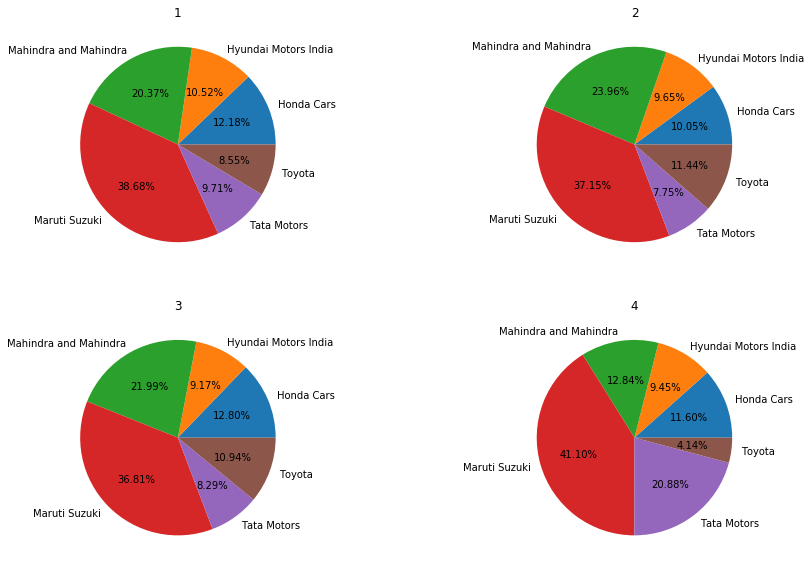

In [127]:
piec(cpt,'Share of Ads (%)')

In [128]:
ctp

,Q1-Total,Q2-Total,Q3-Total,Q4-Total
Brand,,,,
Honda Cars,30.41,22.74,27.00,19.85
Hyundai Motors India,31.41,26.12,23.12,19.35
Mahindra and Mahindra,29.33,31.27,26.73,12.67
Maruti Suzuki,29.39,25.58,23.62,21.41
Tata Motors,25.52,18.47,18.40,37.61
Toyota,27.59,33.45,29.81,9.16


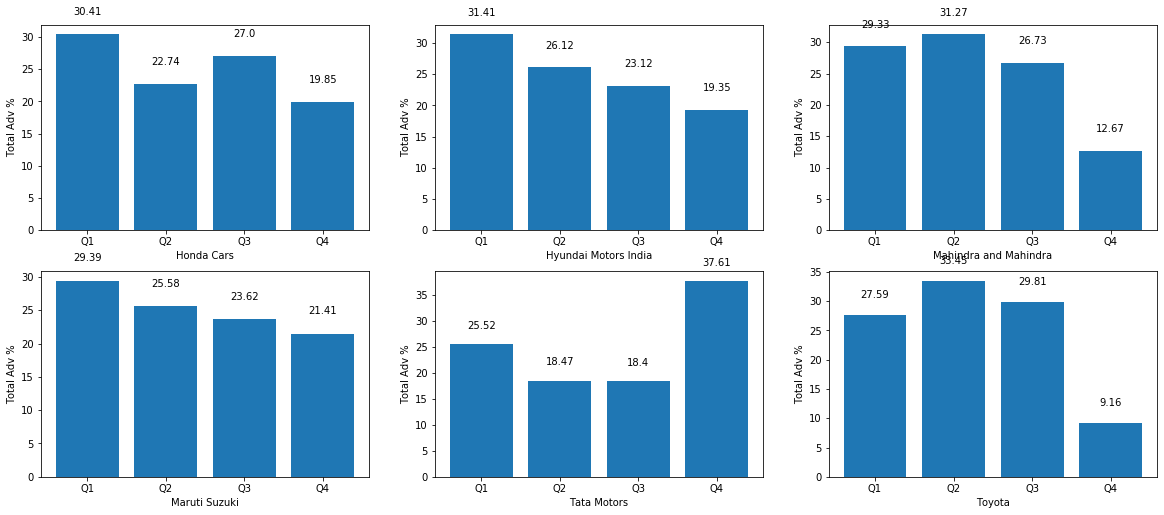

In [129]:
plot(ctp,'Total Adv %')

In [130]:
#count
cx

,Q1-Q2,Q2-Q3,Q3-Q4,Q1-Q4
Brand,,,,
Honda Cars,-25.23,18.73,-26.46,-34.71
Hyundai Motors India,-16.85,-11.49,-16.32,-38.41
Mahindra and Mahindra,6.62,-14.50,-52.61,-56.80
Maruti Suzuki,-12.97,-7.67,-9.36,-27.17
Tata Motors,-27.62,-0.37,104.42,47.41
Toyota,21.26,-10.89,-69.28,-66.81


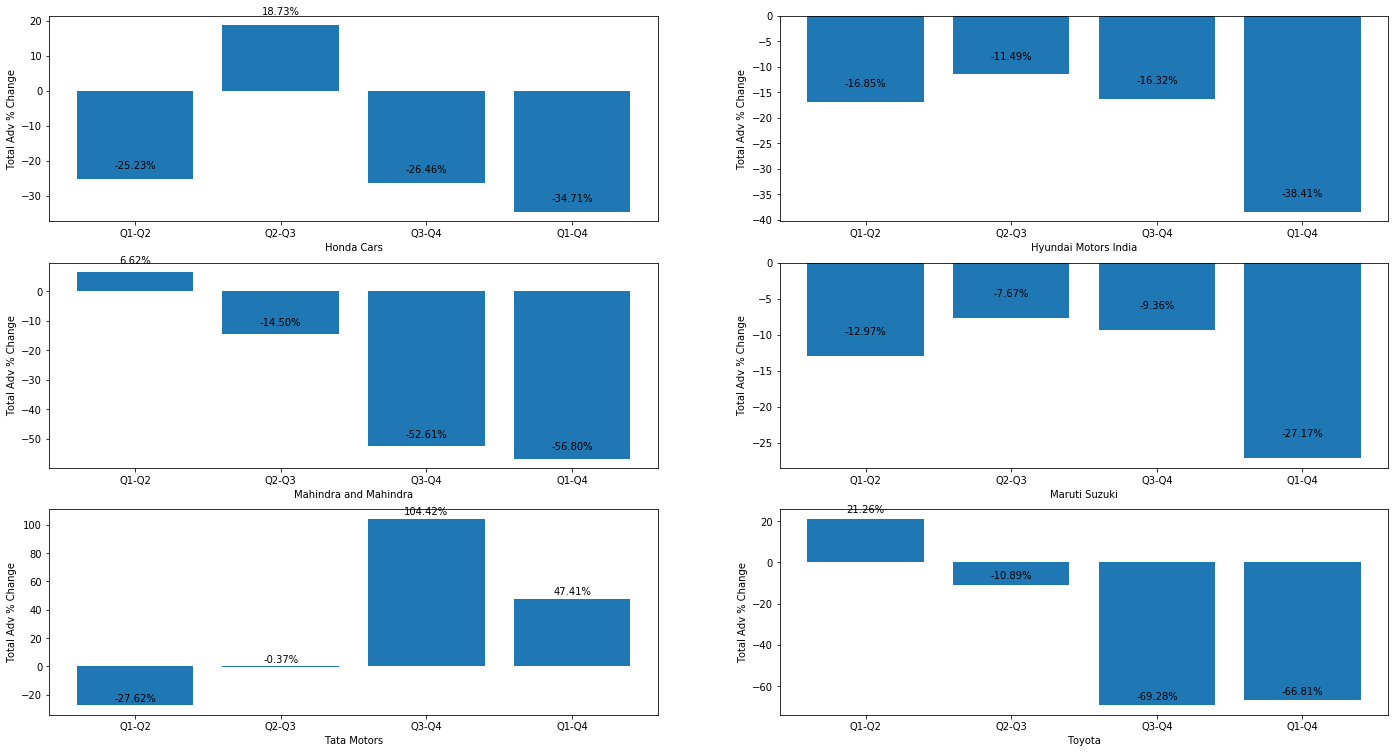

In [131]:
chng(cx,'Total Adv % Change')

##### `Spend`

In [132]:
display_side_by_side(st,spt,titles=['Total Spend ($)','% Total Spend ($)'])

,Q1-Total,Q2-Total,Q3-Total,Q4-Total
Brand,,,,
Honda Cars,16963778,9549604,12073060,9671898
Hyundai Motors India,62470842,40830200,38727107,38780607
Mahindra and Mahindra,129215380,99500908,95196781,73392586
Maruti Suzuki,183019481,129229242,124833119,121564630
Tata Motors,25796631,16408174,15831865,36753557
Toyota,40351398,29509857,28424768,14367089
,Q1-Total,Q2-Total,Q3-Total,Q4-Total
Brand,,,,
Honda Cars,3.71,2.94,3.83,3.28


Share of Spend (%)


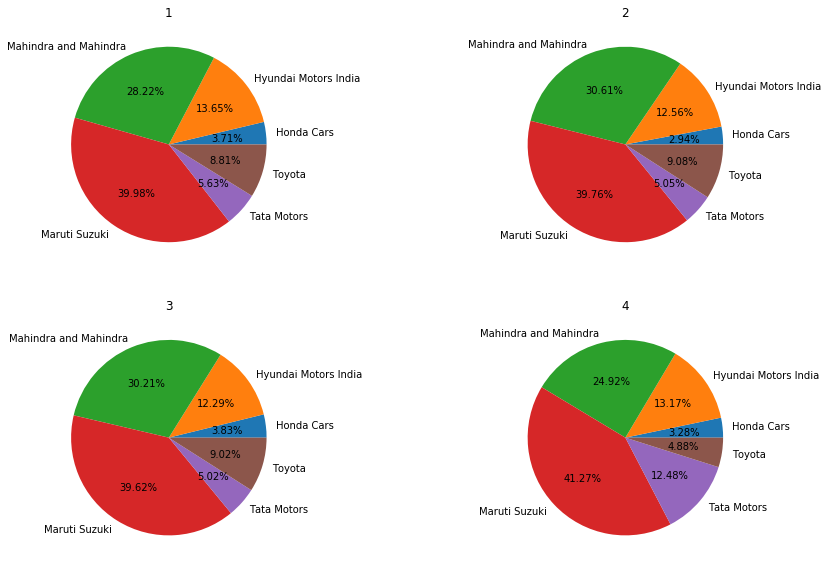

In [133]:
piec(spt,'Share of Spend (%)')

In [134]:
stp

,Q1-Total,Q2-Total,Q3-Total,Q4-Total
Brand,,,,
Honda Cars,35.15,19.79,25.02,20.04
Hyundai Motors India,34.55,22.58,21.42,21.45
Mahindra and Mahindra,32.52,25.04,23.96,18.47
Maruti Suzuki,32.76,23.13,22.35,21.76
Tata Motors,27.21,17.31,16.70,38.77
Toyota,35.82,26.20,25.23,12.75


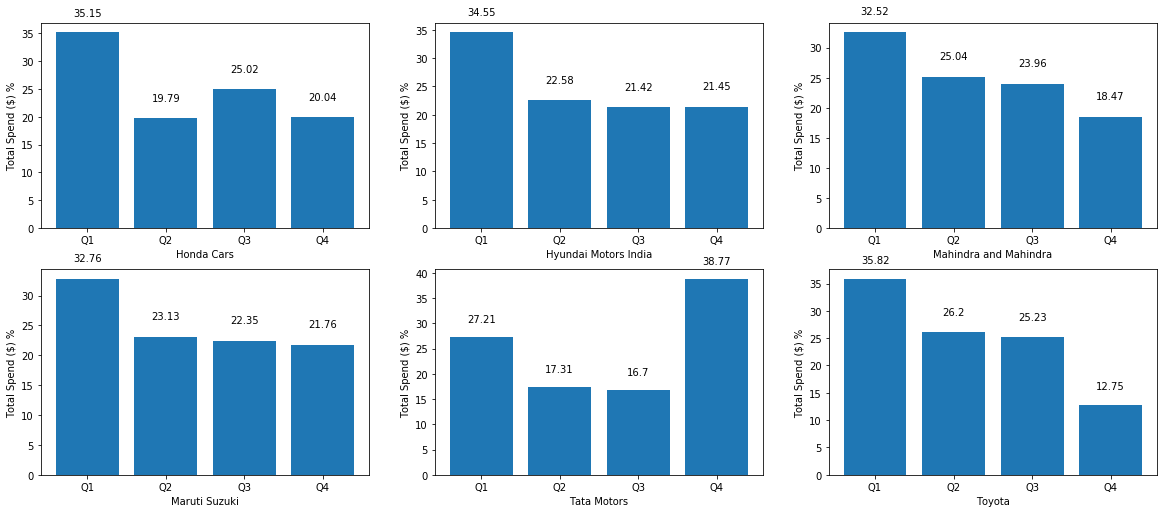

In [135]:
plot(stp,'Total Spend ($) %')

In [136]:
# sum
sx

,Q1-Q2,Q2-Q3,Q3-Q4,Q1-Q4
Brand,,,,
Honda Cars,-43.71,26.42,-19.89,-42.99
Hyundai Motors India,-34.64,-5.15,0.14,-37.92
Mahindra and Mahindra,-23.00,-4.33,-22.90,-43.20
Maruti Suzuki,-29.39,-3.40,-2.62,-33.58
Tata Motors,-36.39,-3.51,132.15,42.47
Toyota,-26.87,-3.68,-49.46,-64.40


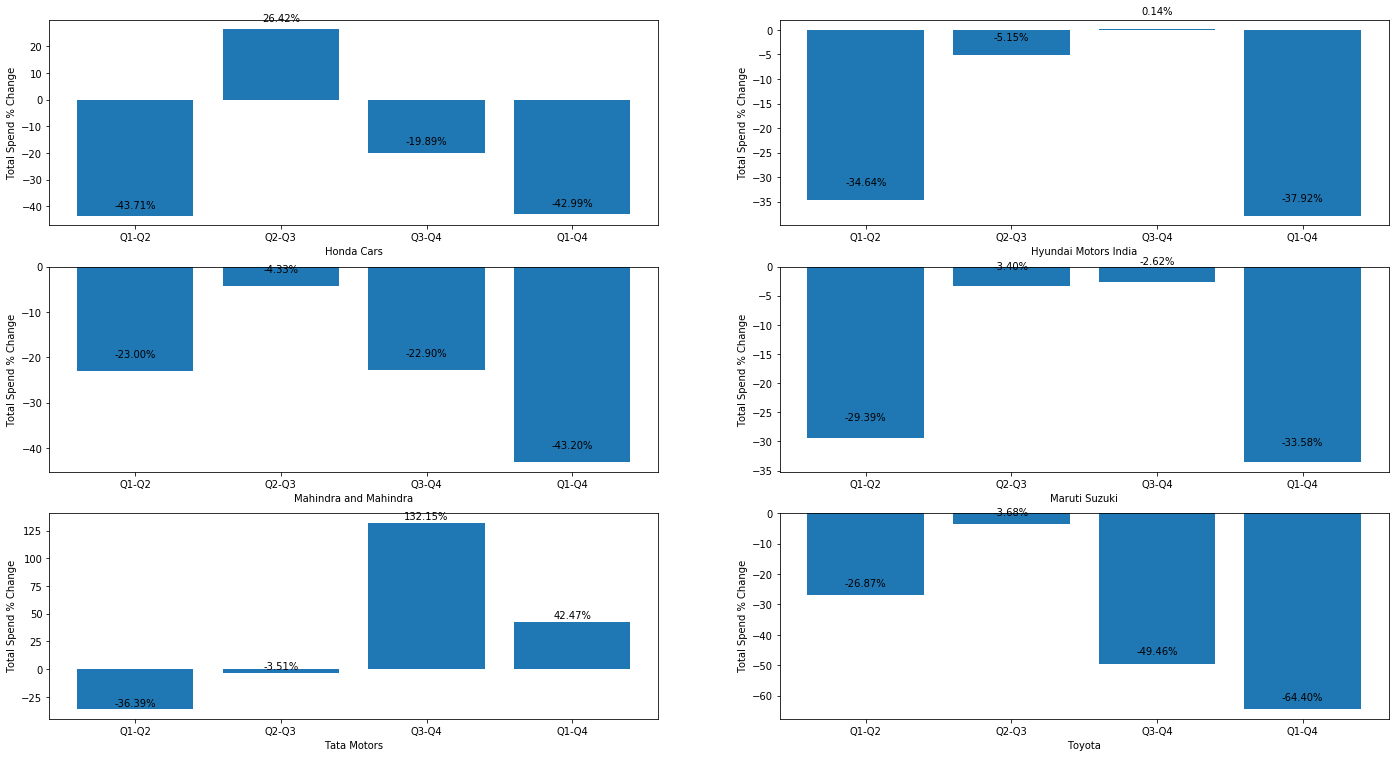

In [137]:
chng(sx,'Total Spend % Change')

# Q3. Conduct a competitive analysis for the brands and define advertisement strategy of different brands and how it differs across the brands. 

In [138]:
data.head()

,Id,Brand,Product,Network,Network Type,Show,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Week,Day Of Week,Hour Of Day,TimeZone,Date_Time,Broadcast Month,Day_Time,Quarters
0,1000001,Honda Cars,Honda Jazz,N-10079,cable,S-16736,1,PRIME TIME,30,1.0,178,2,Sun,22,Northeast India,2021-01-10 22:19:08,Jan,Night,Q1
1,1000002,Maruti Suzuki,Maruti Suzuki Baleno,N-10096,cable,S-17450,3,WEEKEND,30,1.0,514,3,Sat,19,Northeast India,2021-01-16 19:28:13,Jan,Evening,Q1
2,1000003,Maruti Suzuki,Maruti Suzuki Ciaz,N-10044,cable,S-12299,2,DAYTIME,30,1.0,2313,2,Tues,13,Northeast India,2021-01-05 13:09:26,Jan,Afternoon,Q1
3,1000004,Maruti Suzuki,Maruti Suzuki Ciaz,N-10060,cable,S-14354,1,EARLY MORNING,30,1.0,308,2,Wed,8,Northeast India,2021-01-06 08:55:49,Jan,Early-morning,Q1
4,1000005,Hyundai Motors India,Hyundai I20,N-10123,cable,S-15146,2,LATE FRINGE,30,1.0,1885,1,Sat,23,Northeast India,2021-01-02 23:07:43,Jan,Night,Q1


In [139]:
ss = data.pivot_table(values ='Spend ($)',index=['Brand'],aggfunc='sum')
cc = data.pivot_table(values ='Spend ($)',index=['Brand'],aggfunc='count')
cc.rename(columns = {'Spend ($)':'Count'}, inplace = True)
aa=data.pivot_table(values ='Spend ($)',index=['Brand'],aggfunc='mean')
aa.rename(columns = {'Spend ($)':'Avg Spend ($)'}, inplace = True)
mx= data.pivot_table(values ='Spend ($)',index=['Brand'],aggfunc='max')
mx.rename(columns = {'Spend ($)':'Max Spend ($)'}, inplace = True)
mn=data.pivot_table(values ='Spend ($)',index=['Brand'],aggfunc='min')
mn.rename(columns = {'Spend ($)':'Min Spend ($)'}, inplace = True)

sca=pd.concat([ss,cc,round(aa,2),mx,mn],axis=1)

sca_per = sca.copy()
sca_per['Spend ($) %']= round(100*sca['Spend ($)']/sca['Spend ($)'].sum(),2)
sca_per['Count %'] = round(100*sca['Count']/sca['Count'].sum(),2)
sca_per=sca_per[['Spend ($) %','Count %']]

In [140]:
display_side_by_side(sca,sca_per,titles=[])

Spend ($) 
 Count 
 Avg Spend ($) 
 Max Spend ($) 
 Min Spend ($) 
 
 
 Brand 
 
 
 
 
 
 
 
 
 
 Honda Cars 
 48258340 
 85265 
 565.98 
 72902 
 0 
 
 
 Hyundai Motors India 
 180808756 
 71296 
 2536.03 
 5500000 
 0 
 
 
 Mahindra and Mahindra 
 397305655 
 147890 
 2686.49 
 103048 
 0 
 
 
 Maruti Suzuki 
 558646472 
 280274 
 1993.22 
 91596 
 0 
 
 
 Tata Motors 
 94790227 
 81041 
 1169.66 
 83935 
 0 
 
 
 Toyota 
 112653112 
 66018 
 1706.40 
 92140 
 0 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Brand 
 
 
 
 
 
 
 Honda Cars 
 3.47 
 11.65 
 
 
 Hyundai Motors India 
 12.98 
 9.74 
 
 
 Mahindra and Mahindra 
 28.53 
 20.21 
 
 
 Maruti Suzuki 
 40.12 
 38.30 
 
 
 Tata Motors 
 6.81 
 11.07 
 
 
 Toyota 
 8.09 
 9.02

<BarContainer object of 6 artists>

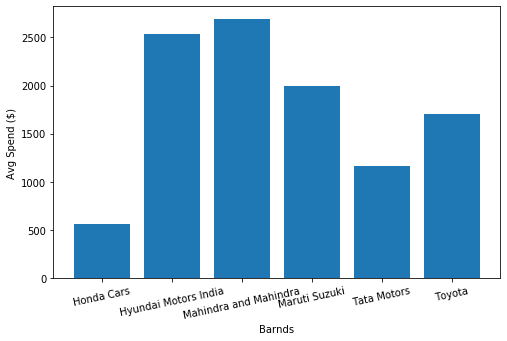

In [141]:
plt.figure(figsize=(8,5))
x=sca['Avg Spend ($)'].index
y=sca['Avg Spend ($)'].values
plt.xlabel('Barnds')
plt.xticks(rotation = 12)
plt.ylabel('Avg Spend ($)') 
plt.bar(x,y)

In [142]:
brands=data['Brand'].unique()
brands

array(['Honda Cars', 'Maruti Suzuki', 'Hyundai Motors India', 'Toyota',
       'Tata Motors', 'Mahindra and Mahindra'], dtype=object)

In [143]:
len(brands)

6

## Here, there are total 6 brands in this dataset, they are 'Honda Cars', 'Maruti Suzuki', 'Hyundai Motors India', 'Toyota', 'Tata Motors', 'Mahindra and Mahindra'

### Each, brand have several products

In [144]:
data.head(2)

,Id,Brand,Product,Network,Network Type,Show,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Week,Day Of Week,Hour Of Day,TimeZone,Date_Time,Broadcast Month,Day_Time,Quarters
0,1000001,Honda Cars,Honda Jazz,N-10079,cable,S-16736,1,PRIME TIME,30,1.0,178,2,Sun,22,Northeast India,2021-01-10 22:19:08,Jan,Night,Q1
1,1000002,Maruti Suzuki,Maruti Suzuki Baleno,N-10096,cable,S-17450,3,WEEKEND,30,1.0,514,3,Sat,19,Northeast India,2021-01-16 19:28:13,Jan,Evening,Q1


In [145]:
def product_comapre(brand_name):
    df = data.loc[data['Brand']==brand_name,:]
    ss = df.pivot_table(values ='Spend ($)',index=['Product'],aggfunc='sum')
    cc = df.pivot_table(values ='Spend ($)',index=['Product'],aggfunc='count')
    cc.rename(columns = {'Spend ($)':'Count'}, inplace = True)
    aa=df.pivot_table(values ='Spend ($)',index=['Product'],aggfunc='mean')
    aa.rename(columns = {'Spend ($)':'Avg Spend ($)'}, inplace = True)
    aa['Avg Spend ($)']=round(aa['Avg Spend ($)'],2)
    xxx=pd.concat([ss,cc,aa], axis=1)
    yyy = xxx.copy()
    yyy['Spend ($) %'] = (100*yyy['Spend ($)'])/yyy['Spend ($)'].sum()
    yyy['Count %'] = (100*yyy['Count'])/yyy['Count'].sum()
    yyy = yyy[['Spend ($) %','Count %']]
    
    return xxx,yyy

In [146]:
def quarters_comapre(brand_name):
    df = data.loc[data['Brand']==brand_name,:]
    ss = df.pivot_table(values ='Spend ($)',index=['Quarters'],aggfunc='sum')
    cc = df.pivot_table(values ='Spend ($)',index=['Quarters'],aggfunc='count')
    cc.rename(columns = {'Spend ($)':'Count'}, inplace = True)
    aa=df.pivot_table(values ='Spend ($)',index=['Quarters'],aggfunc='mean')
    aa.rename(columns = {'Spend ($)':'Avg Spend ($)'}, inplace = True)
    aa['Avg Spend ($)']=round(aa['Avg Spend ($)'],2)
    ccc=pd.concat([ss,cc,aa], axis=1)
    ddd = ccc.copy()
    ddd['Spend ($) %'] = (100*ddd['Spend ($)'])/ddd['Spend ($)'].sum()
    ddd['Count %'] = (100*ddd['Count'])/ddd['Count'].sum()
    ddd = ddd[['Spend ($) %','Count %']]
    
    return ccc,ddd

In [147]:
def daypart_comapre(brand_name):
    df = data.loc[data['Brand']==brand_name,:]
    ss = df.pivot_table(values ='Spend ($)',index=['Dayparts'],aggfunc='sum')
    cc = df.pivot_table(values ='Spend ($)',index=['Dayparts'],aggfunc='count')
    cc.rename(columns = {'Spend ($)':'Count'}, inplace = True)
    aa=df.pivot_table(values ='Spend ($)',index=['Dayparts'],aggfunc='mean')
    aa.rename(columns = {'Spend ($)':'Avg Spend ($)'}, inplace = True)
    aa['Avg Spend ($)']=round(aa['Avg Spend ($)'],2)
    xxx=pd.concat([ss,cc,aa], axis=1)
    yyy = xxx.copy()
    yyy['Spend ($) %'] = (100*yyy['Spend ($)'])/yyy['Spend ($)'].sum()
    yyy['Count %'] = (100*yyy['Count'])/yyy['Count'].sum()
    yyy = yyy[['Spend ($) %','Count %']]
    
    return xxx,yyy

In [148]:
def timezone_comapre(brand_name):
    df = data.loc[data['Brand']==brand_name,:]
    ss = df.pivot_table(values ='Spend ($)',index=['TimeZone'],aggfunc='sum')
    cc = df.pivot_table(values ='Spend ($)',index=['TimeZone'],aggfunc='count')
    cc.rename(columns = {'Spend ($)':'Count'}, inplace = True)
    aa=df.pivot_table(values ='Spend ($)',index=['TimeZone'],aggfunc='mean')
    aa.rename(columns = {'Spend ($)':'Avg Spend ($)'}, inplace = True)
    aa['Avg Spend ($)']=round(aa['Avg Spend ($)'],2)
    xxx=pd.concat([ss,cc,aa], axis=1)
    yyy = xxx.copy()
    yyy['Spend ($) %'] = (100*yyy['Spend ($)'])/yyy['Spend ($)'].sum()
    yyy['Count %'] = (100*yyy['Count'])/yyy['Count'].sum()
    yyy = yyy[['Spend ($) %','Count %']]
    
    return xxx,yyy

In [149]:
def network_comapre(brand_name):
    df = data.loc[data['Brand']==brand_name,:]
    ss = df.pivot_table(values ='Spend ($)',index=['Network Type'],aggfunc='sum')
    cc = df.pivot_table(values ='Spend ($)',index=['Network Type'],aggfunc='count')
    cc.rename(columns = {'Spend ($)':'Count'}, inplace = True)
    aa=df.pivot_table(values ='Spend ($)',index=['Network Type'],aggfunc='mean')
    aa.rename(columns = {'Spend ($)':'Avg Spend ($)'}, inplace = True)
    aa['Avg Spend ($)']=round(aa['Avg Spend ($)'],2)
    xxx=pd.concat([ss,cc,aa], axis=1)
    yyy = xxx.copy()
    yyy['Spend ($) %'] = (100*yyy['Spend ($)'])/yyy['Spend ($)'].sum()
    yyy['Count %'] = (100*yyy['Count'])/yyy['Count'].sum()
    yyy = yyy[['Spend ($) %','Count %']]
    
    return xxx,yyy

In [150]:
def bar(df):
    x=df.index
    plt.figure(figsize=(22,120))
    for i in enumerate(df.columns):
        ax = plt.subplot(20,2, i[0]+1)
        y=df[i[1]]
        plt.xlabel(i[1])
        plt.xticks(rotation = 12) 
        plt.bar(x,y)
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    height,
                    ha="center")

In [151]:
def pie(df):
    lab = df.index
    cols = df.columns
    plt.figure(figsize=(12,150))
    for i in enumerate(cols):
        val = df[i[1]].values
        ax = plt.subplot(15,2, i[0]+1)
        plt.pie(val, labels = lab,autopct='%1.2f%%')
        plt.title(i[1])
    plt.show()

## <u>`Honda Cars`

In [152]:
data.loc[data['Brand']=='Honda Cars',:]['Product'].unique()

array(['Honda Jazz', 'Honda Civiz', 'Honda City'], dtype=object)

In [153]:
len(data.loc[data['Brand']=='Honda Cars',:]['Product'].unique())

3

- #### Honda Cars has 3 products, they are 'Honda Jazz', 'Honda Civiz', 'Honda City'

In [154]:
data.loc[(data['Brand']=='Honda Cars') & (data['Pod Position']==1) & (data['Spend ($)']==0),:]

,Id,Brand,Product,Network,Network Type,Show,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Week,Day Of Week,Hour Of Day,TimeZone,Date_Time,Broadcast Month,Day_Time,Quarters
152716,1152717,Honda Cars,Honda Civiz,N-10130,cable,S-15994,1,DAYTIME,15,0.5,0,10,Fri,14,Northeast India,2021-03-05 14:16:03,Mar,Afternoon,Q1
177461,1177462,Honda Cars,Honda Jazz,N-10110,cable,S-12560,1,EARLY MORNING,30,1.0,0,12,Wed,6,Northeast India,2021-03-17 06:34:28,Mar,Early-morning,Q1


In [155]:
data.loc[(data['Brand']=='Honda Cars') & (data['Pod Position']==1) & (data['Spend ($)']==0),:].shape

(2, 19)

- #### ⬆️⬆️ Above 2 times Honda car's advertisements were at Pod position 1 without spending a singel penny.

In [156]:
sca

,Spend ($),Count,Avg Spend ($),Max Spend ($),Min Spend ($)
Brand,,,,,
Honda Cars,48258340,85265,565.98,72902,0
Hyundai Motors India,180808756,71296,2536.03,5500000,0
Mahindra and Mahindra,397305655,147890,2686.49,103048,0
Maruti Suzuki,558646472,280274,1993.22,91596,0
Tata Motors,94790227,81041,1169.66,83935,0
Toyota,112653112,66018,1706.40,92140,0


In [157]:
data.loc[(data['Brand']=='Honda Cars') & (data['Spend ($)']==72902),:]

,Id,Brand,Product,Network,Network Type,Show,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Week,Day Of Week,Hour Of Day,TimeZone,Date_Time,Broadcast Month,Day_Time,Quarters
435901,1435902,Honda Cars,Honda Civiz,N-10002,broadcast,S-22388,1,OVERNIGHT,30,1.0,72902,29,Sun,3,Northeast India,2021-07-18 03:13:11,Jul,Mid-night,Q3


- #### ⬆️⬆️ Honda cars spend most for promoting `Honda Civiz`, on 18-07-2021 at Overnight show.

In [158]:
p=product_comapre('Honda Cars')
q=quarters_comapre('Honda Cars')
d=daypart_comapre('Honda Cars')
t=timezone_comapre('Honda Cars')
n=network_comapre('Honda Cars')

In [159]:
display_side_by_side(p[0],p[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Product 
 
 
 
 
 
 
 
 Honda City 
 59051 
 56 
 1054.48 
 
 
 Honda Civiz 
 34777159 
 58877 
 590.67 
 
 
 Honda Jazz 
 13422130 
 26332 
 509.73 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Product 
 
 
 
 
 
 
 Honda City 
 0.122364 
 0.065678 
 
 
 Honda Civiz 
 72.064557 
 69.051780 
 
 
 Honda Jazz 
 27.813079 
 30.882543

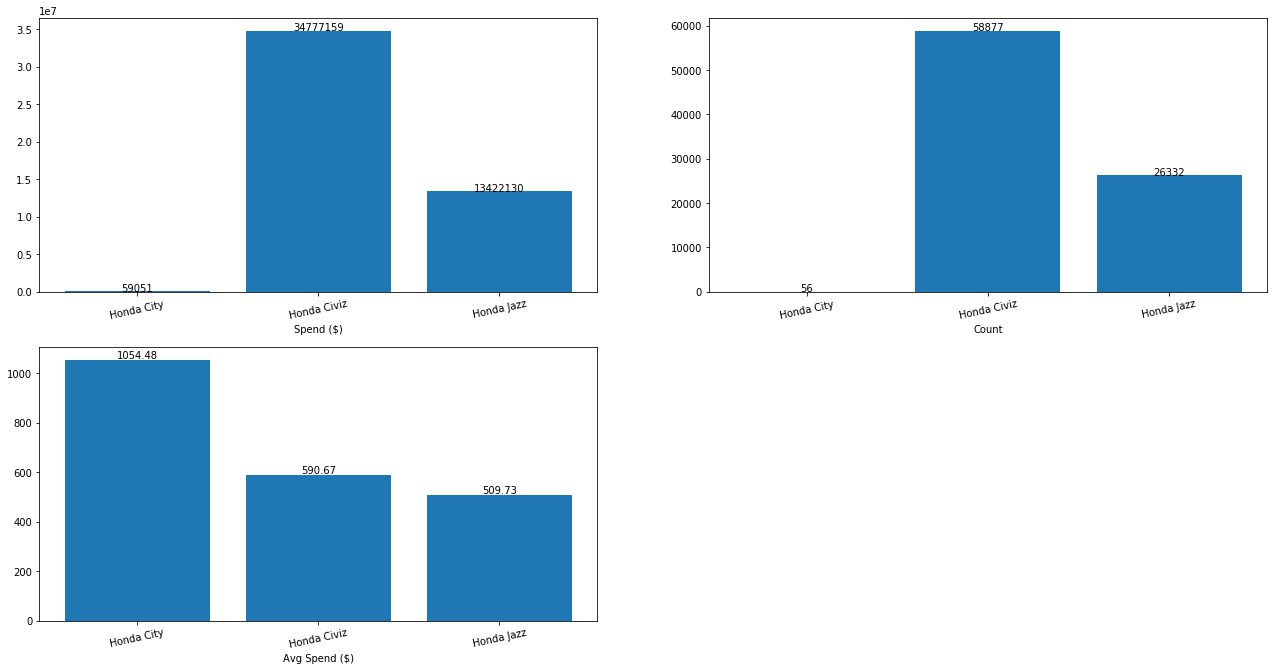

In [160]:
bar(p[0])

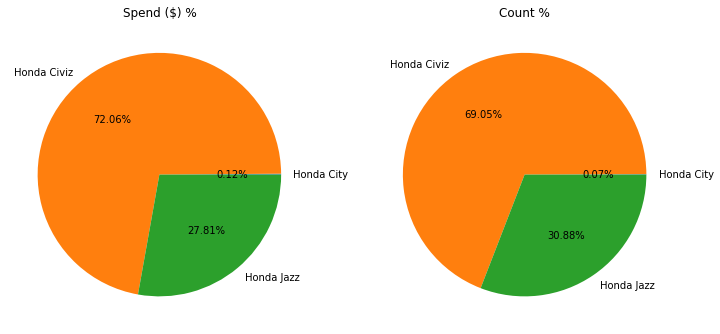

In [161]:
pie(p[1])

### `Products:`
- #### Out of total advertisements ran by Honda cars brand, nearly 70% of Advs were for the promotion of Honda Civiz, also out of total budget 72% was spend for this product.
- #### Though, the brand ran only 56 advs for the promotion of Honda City, but the average spend per adv is 1054, which is heighest among other products.

In [162]:
display_side_by_side(q[0],q[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Quarters 
 
 
 
 
 
 
 
 Q1 
 16963778 
 25929 
 654.24 
 
 
 Q2 
 9549604 
 19388 
 492.55 
 
 
 Q3 
 12073060 
 23020 
 524.46 
 
 
 Q4 
 9671898 
 16928 
 571.36 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Quarters 
 
 
 
 
 
 
 Q1 
 35.152013 
 30.409899 
 
 
 Q2 
 19.788505 
 22.738521 
 
 
 Q3 
 25.017562 
 26.998182 
 
 
 Q4 
 20.041920 
 19.853398

In [163]:
data.loc[(data['Spend ($)']==5500000)  ,['Brand','Product','Spend ($)','Pod Position','Quarters','Broadcast Month']]


,Brand,Product,Spend ($),Pod Position,Quarters,Broadcast Month
93821,Hyundai Motors India,Hyundai I20,5500000,4,Q1,Feb


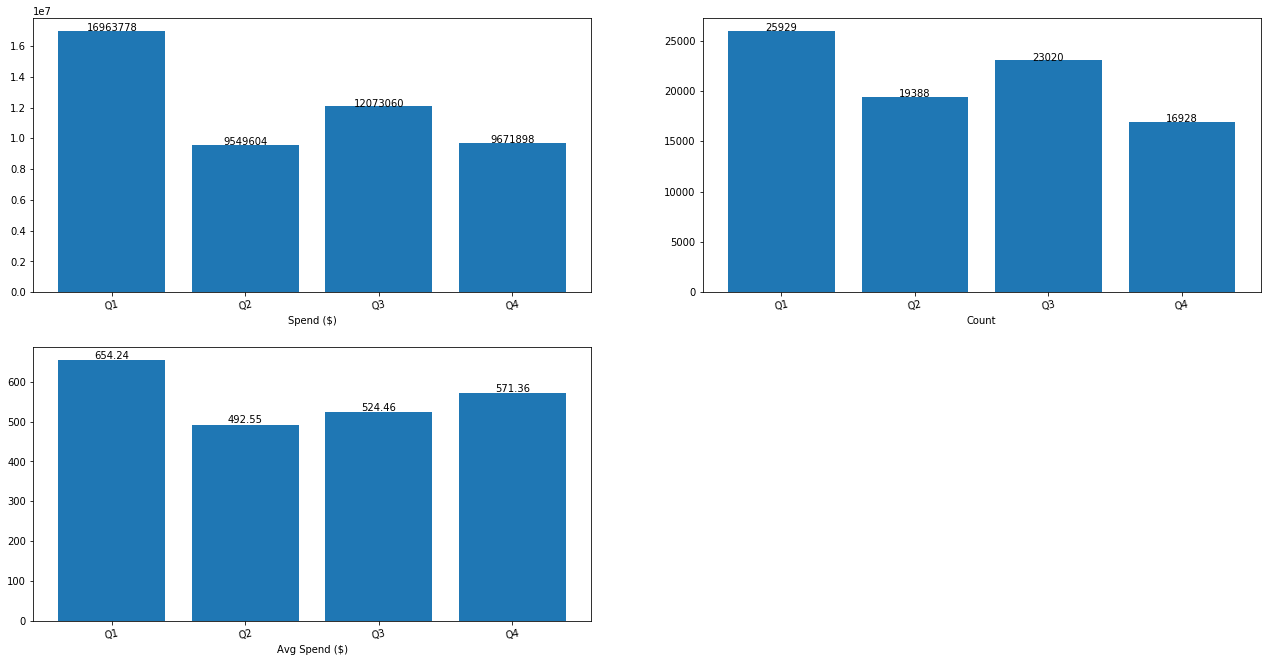

In [164]:
bar(q[0])


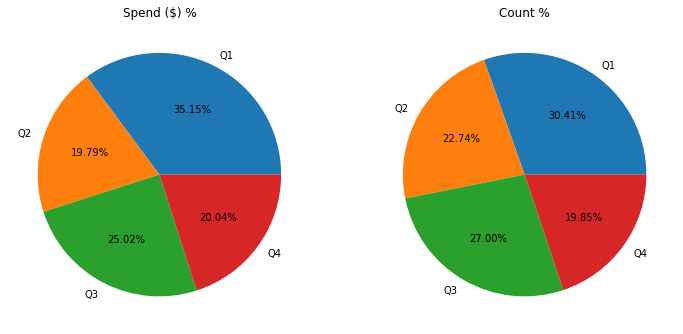

In [165]:
pie(q[1])



### `Quarters:`
- #### During the Q1, Honda Car ran most advs, also spend most money for advs.
- #### After Q1, the budget for the Advs were reduced.


In [166]:
display_side_by_side(d[0],d[1],titles=[])


,Spend ($),Count,Avg Spend ($)
Dayparts,,,
DAYTIME,15106799,28031,538.93
EARLY FRINGE,5763471,7056,816.82
EARLY MORNING,5190376,14877,348.89
EVENING NEWS,2105762,3067,686.59
LATE FRINGE,3421197,6168,554.67
OVERNIGHT,2820096,5714,493.54
PRIME ACCESS,1352961,1903,710.96
PRIME TIME,7002902,8391,834.57
WEEKEND,5494776,10058,546.31


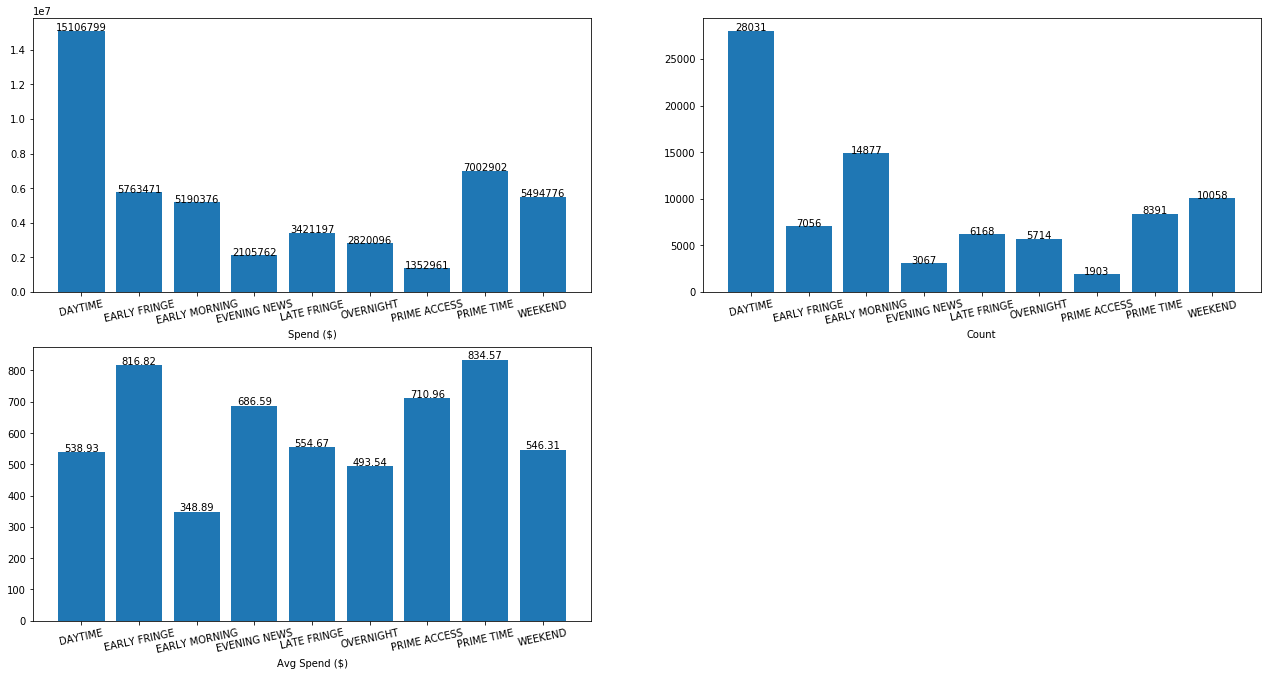

In [167]:
bar(d[0])


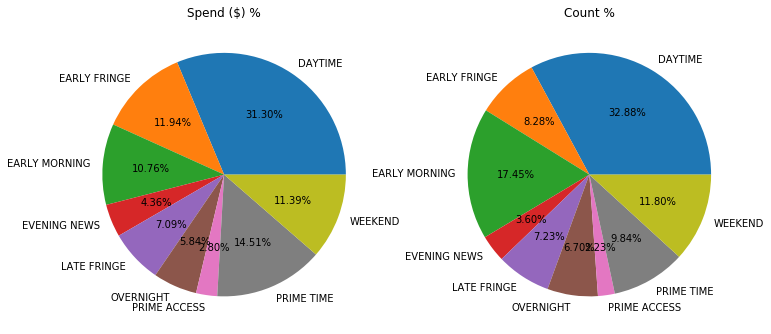

In [168]:
pie(d[1])


### `Dayparts:`
- #### Honda car prefer to run their advs during the Daytime, Weekend, Primetime and Early-morning shows.
- #### For the Daytime show, Honda car spend 31.30% of it's budget, and for the weekend show 11.39%, for the primetime show 14.51% & for the early-fringe show 11.94%.

In [169]:
display_side_by_side(t[0],t[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 TimeZone 
 
 
 
 
 
 
 
 Central India 
 56458 
 156 
 361.91 
 
 
 Northeast India 
 46729376 
 83236 
 561.41 
 
 
 Northern India 
 1045 
 5 
 209.00 
 
 
 Southern India 
 1471461 
 1868 
 787.72 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 TimeZone 
 
 
 
 
 
 
 Central India 
 0.116991 
 0.182959 
 
 
 Northeast India 
 96.831710 
 97.620360 
 
 
 Northern India 
 0.002165 
 0.005864 
 
 
 Southern India 
 3.049133 
 2.190817

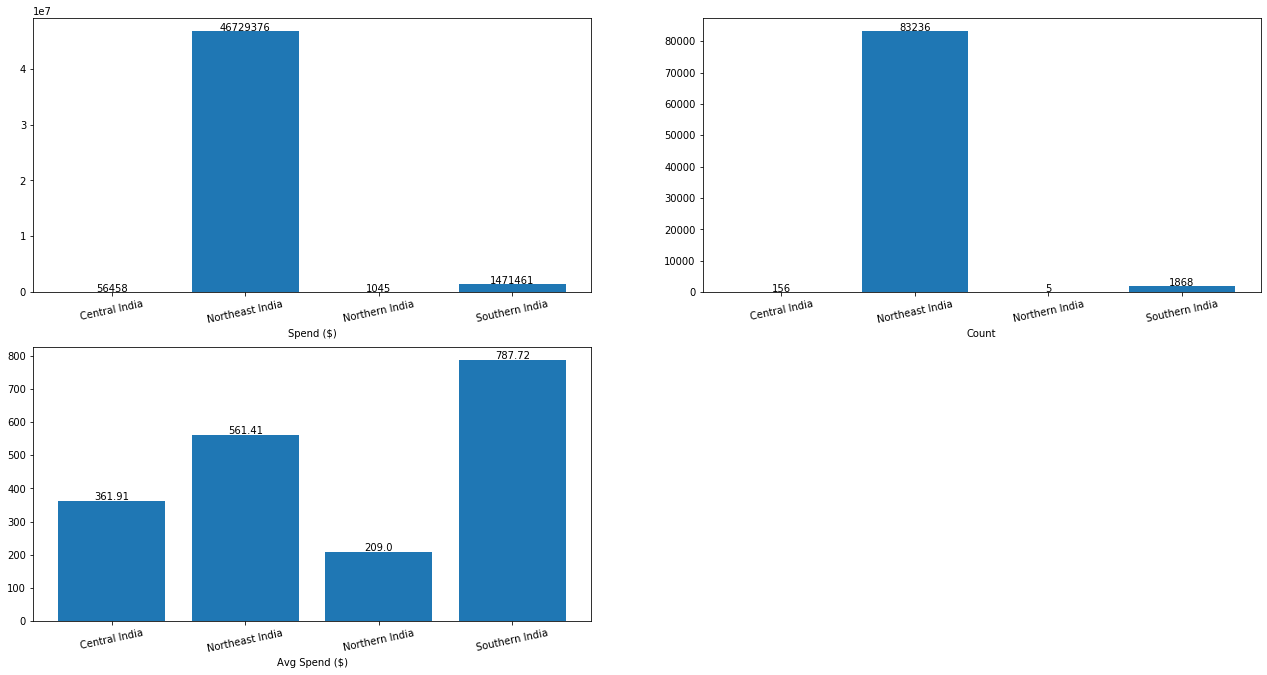

In [170]:
bar(t[0])

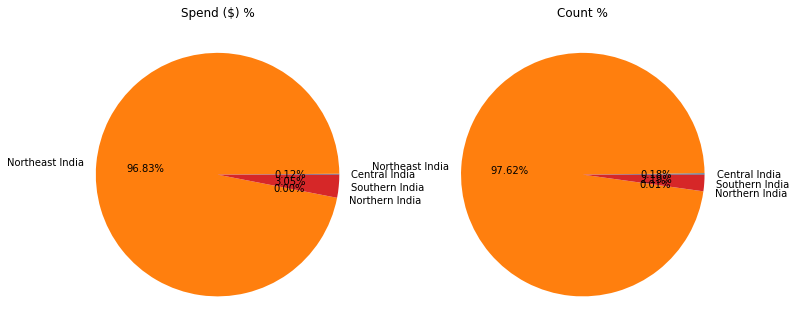

In [171]:
pie(t[1])


### `Timezone:`
- #### More than 95% of the Advs were ran on the Northeast India timezone, also 97% of the budget were allocated for this timezone.
- #### The average spend on Advs in the Southern India timezone is higher than other timezones.


In [172]:
display_side_by_side(n[0],n[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Network Type 
 
 
 
 
 
 
 
 broadcast 
 14835303 
 10611 
 1398.11 
 
 
 cable 
 33423037 
 74654 
 447.71 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Network Type 
 
 
 
 
 
 
 broadcast 
 30.741428 
 12.444731 
 
 
 cable 
 69.258572 
 87.555269

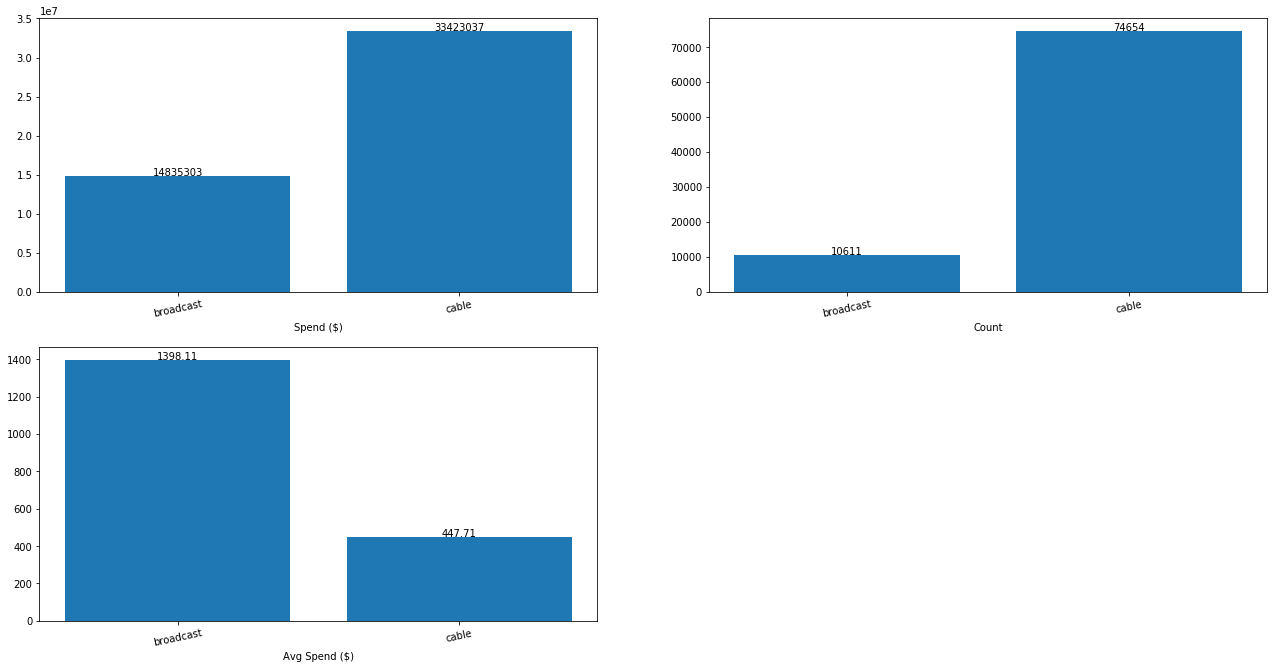

In [173]:
bar(n[0])

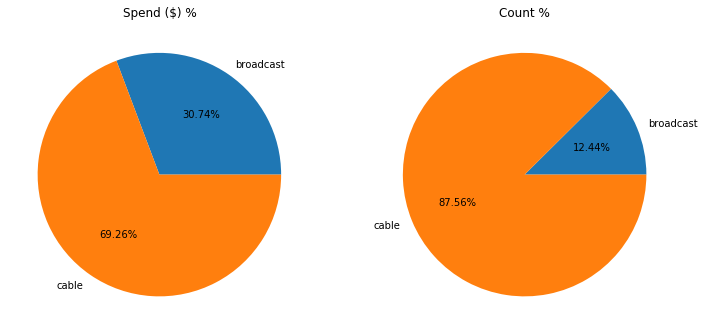

In [174]:
pie(n[1])

### `Network:`
- #### 88% of the Advs were ran on the Cable network, and 70% of the budget were allocated for this network.
- #### The average spendon the Broadcast network is higher than the cable network.

### `Products:`
- #### Honda Cars has 3 products, they are 'Honda Jazz', 'Honda Civiz', 'Honda City'
- ####  2 times Honda car's advertisements were at Pod position 1 without spending a singel penny.
- #### Honda cars spend most for promoting `Honda Civiz`, on 18-07-2021 at Overnight show.
- #### Out of total advertisements ran by Honda cars brand, nearly 70% of Advs were for the promotion of Honda Civiz, also out of total budget 72% was spend for this product.
- #### Though, the brand ran only 56 advs for the promotion of Honda City, but the average spend per adv is 1054, which is heighest among other products.


### `Quarters:`
- #### During the Q1, Honda Car ran most advs, also spend most money for advs.
- #### After Q1, the budget for the Advs were reduced.

### `Dayparts:`
- #### Honda car prefer to run their advs during the Daytime, Weekend, Primetime and Early-morning shows.
- #### For the Daytime show, Honda car spend 31.30% of it's budget, and for the weekend show 11.39%, for the primetime show 14.51% & for the early-fringe show 11.94%.

### `Timezone:`
- #### More than 95% of the Advs were ran on the Northeast India timezone, also 97% of the budget were allocated for this timezone.
- #### The average spend on Advs in the Southern India timezone is higher than other timezones.

### `Network:`
- #### 88% of the Advs were ran on the Cable network, and 70% of the budget were allocated for this network.
- #### The average spendon the Broadcast network is higher than the cable network.

## <u>`Maruti Suzuki`

In [175]:
data.loc[data['Brand']=='Maruti Suzuki',:]['Product'].unique()

array(['Maruti Suzuki Baleno', 'Maruti Suzuki Ciaz',
       'Maruti Suzuki WagonR', 'Maruti Suzuki Ertiga',
       'Maruti Suzuki Swift', 'Maruti Suzuki Ignis',
       'Maruti Suzuki Celerio'], dtype=object)

In [176]:
len(data.loc[data['Brand']=='Maruti Suzuki',:]['Product'].unique())

7

- #### Maruti Suzuki has 7 products, they are 'Maruti Suzuki Baleno', 'Maruti Suzuki Ciaz','Maruti Suzuki WagonR', 'Maruti Suzuki Ertiga','Maruti Suzuki Swift', 'Maruti Suzuki Ignis','Maruti Suzuki Celerio'

In [177]:
data.loc[(data['Brand']=='Maruti Suzuki') & (data['Pod Position']==1) & (data['Spend ($)']==0),:]

,Id,Brand,Product,Network,Network Type,Show,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Week,Day Of Week,Hour Of Day,TimeZone,Date_Time,Broadcast Month,Day_Time,Quarters
243669,1243670,Maruti Suzuki,Maruti Suzuki Ciaz,N-10028,broadcast,S-16527,1,PRIME TIME,30,1.00,0,17,Tues,21,Central India,2021-04-20 21:54:46,Apr,Night,Q2
246398,1246399,Maruti Suzuki,Maruti Suzuki Ciaz,N-10028,broadcast,S-16527,1,EARLY MORNING,30,1.00,0,16,Sun,8,Central India,2021-04-18 08:54:51,Apr,Early-morning,Q2
257927,1257928,Maruti Suzuki,Maruti Suzuki Ciaz,N-10090,cable,S-21506,1,DAYTIME,30,1.00,0,18,Fri,12,Southern India,2021-04-30 12:57:18,Apr,Afternoon,Q2
272153,1272154,Maruti Suzuki,Maruti Suzuki Ciaz,N-10090,cable,S-14276,1,LATE FRINGE,30,1.00,0,18,Sun,23,Southern India,2021-05-02 23:56:47,May,Night,Q2
311111,1311112,Maruti Suzuki,Maruti Suzuki Baleno,N-10028,broadcast,S-17768,1,WEEKEND,30,1.00,0,21,Sun,10,Central India,2021-05-23 10:21:07,May,Morning,Q2
313268,1313269,Maruti Suzuki,Maruti Suzuki Baleno,N-10028,broadcast,S-17625,1,WEEKEND,30,1.00,0,21,Sun,10,Central India,2021-05-23 10:54:09,May,Morning,Q2
329942,1329943,Maruti Suzuki,Maruti Suzuki Baleno,N-10028,broadcast,S-16527,1,PRIME TIME,30,1.00,0,24,Tues,21,Central India,2021-06-08 21:37:12,Jun,Night,Q2
352734,1352735,Maruti Suzuki,Maruti Suzuki Baleno,N-10090,cable,S-10956,1,PRIME TIME,30,1.00,0,23,Wed,22,Southern India,2021-06-02 22:31:49,Jun,Night,Q2
363771,1363772,Maruti Suzuki,Maruti Suzuki Ciaz,N-10090,cable,S-14276,1,LATE FRINGE,30,1.00,0,24,Sun,23,Southern India,2021-06-13 23:18:51,Jun,Night,Q2
367697,1367698,Maruti Suzuki,Maruti Suzuki Ciaz,N-10090,cable,S-14276,1,LATE FRINGE,30,1.00,0,24,Fri,23,Southern India,2021-06-11 23:38:06,Jun,Night,Q2


In [178]:
data.loc[(data['Brand']=='Maruti Suzuki') & (data['Pod Position']==1) & (data['Spend ($)']==0),:].shape

(282, 19)

- #### ⬆️⬆️ Above 282 times Maruti Suzuki's advertisements were at Pod position 1 without spending a singel penny.

In [179]:
sca

,Spend ($),Count,Avg Spend ($),Max Spend ($),Min Spend ($)
Brand,,,,,
Honda Cars,48258340,85265,565.98,72902,0
Hyundai Motors India,180808756,71296,2536.03,5500000,0
Mahindra and Mahindra,397305655,147890,2686.49,103048,0
Maruti Suzuki,558646472,280274,1993.22,91596,0
Tata Motors,94790227,81041,1169.66,83935,0
Toyota,112653112,66018,1706.40,92140,0


In [180]:
data.loc[(data['Brand']=='Maruti Suzuki') & (data['Spend ($)']==91596),:]

,Id,Brand,Product,Network,Network Type,Show,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Week,Day Of Week,Hour Of Day,TimeZone,Date_Time,Broadcast Month,Day_Time,Quarters
691500,1691501,Maruti Suzuki,Maruti Suzuki Baleno,N-10002,broadcast,S-16062,2,PRIME TIME,30,1.0,91596,50,Tues,20,Northeast India,2021-12-07 20:42:48,Dec,Evening,Q4


- #### ⬆️⬆️ Maruti Suzuki spend most for promoting `Maruti Suzuki Baleno`, on 07-12-2021 at PRIME TIME show.

In [181]:
p=product_comapre('Maruti Suzuki')
q=quarters_comapre('Maruti Suzuki')
d=daypart_comapre('Maruti Suzuki')
t=timezone_comapre('Maruti Suzuki')
n=network_comapre('Maruti Suzuki')

In [182]:
display_side_by_side(p[0],p[1],titles=[])

Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Product 
 
 
 
 
 
 
 
 Maruti Suzuki Baleno 
 332492531 
 161393 
 2060.14 
 
 
 Maruti Suzuki Celerio 
 104075 
 33 
 3153.79 
 
 
 Maruti Suzuki Ciaz 
 199405767 
 102799 
 1939.76 
 
 
 Maruti Suzuki Ertiga 
 4038393 
 2558 
 1578.73 
 
 
 Maruti Suzuki Ignis 
 35283 
 39 
 904.69 
 
 
 Maruti Suzuki Swift 
 15347 
 133 
 115.39 
 
 
 Maruti Suzuki WagonR 
 22555076 
 13319 
 1693.45 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Product 
 
 
 
 
 
 
 Maruti Suzuki Baleno 
 59.517521 
 57.584007 
 
 
 Maruti Suzuki Celerio 
 0.018630 
 0.011774 
 
 
 Maruti Suzuki Ciaz 
 35.694447 
 36.678036 
 
 
 Maruti Suzuki Ertiga 
 0.722889 
 0.912678 
 
 
 Maruti Suzuki Ignis 
 0.006316 
 0.013915 
 
 
 Maruti Suzuki Swift 
 0.002747 
 0.047454 
 
 
 Maruti Suzuki WagonR 
 4.037451 
 4.752135

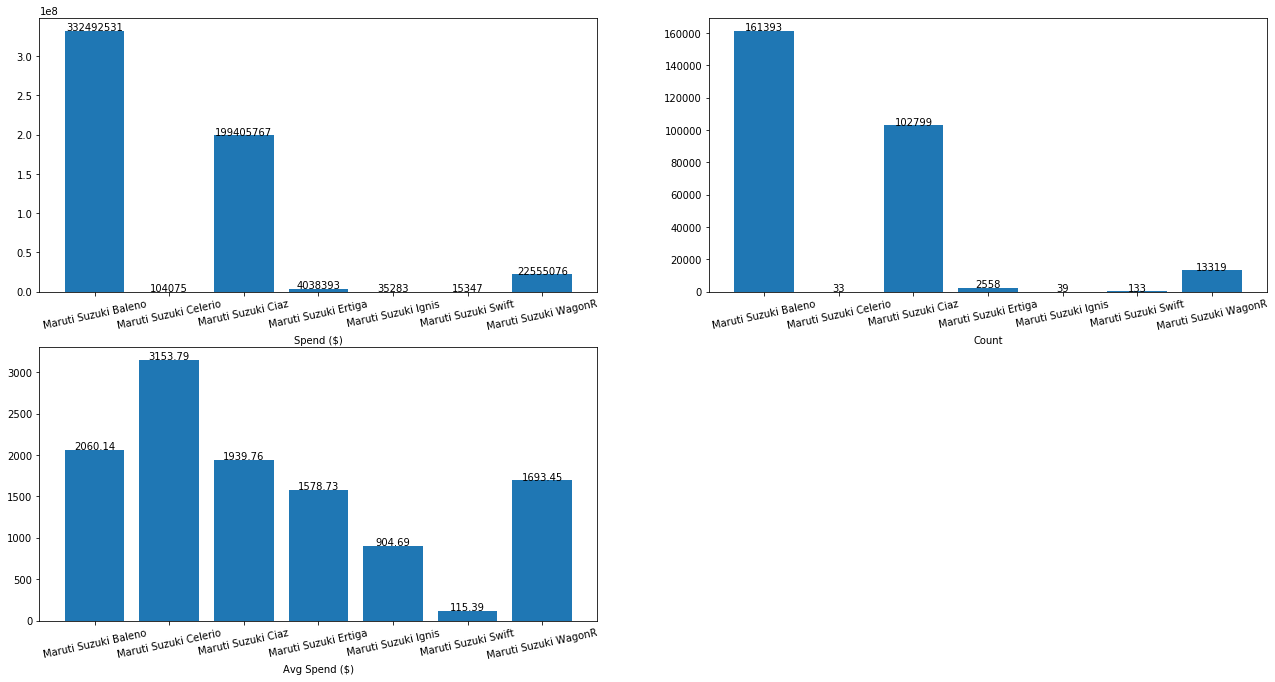

In [183]:
bar(p[0])

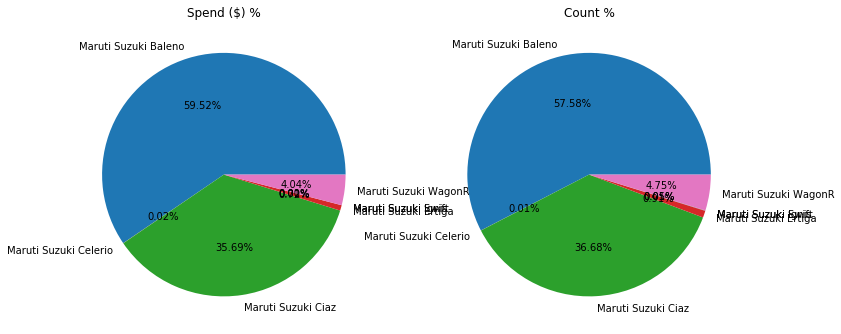

In [184]:
pie(p[1])

### `Products:`
- #### Out of total advertisements ran by Maruti Suzuki brand, nearly 58% of Advs were for the promotion of Baleno, and out of total budget 60 was spend for this product.
- #### Out of total advertisements ran by Maruti Suzuki brand, 37% of Advs were for the promotion of Ciaz, and out of total budget 36% was spend for this product.
- #### The brand ran only 33 advs for the promotion of celerio.

In [185]:
display_side_by_side(q[0],q[1],titles=[])

Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Quarters 
 
 
 
 
 
 
 
 Q1 
 183019481 
 82381 
 2221.62 
 
 
 Q2 
 129229242 
 71695 
 1802.49 
 
 
 Q3 
 124833119 
 66196 
 1885.81 
 
 
 Q4 
 121564630 
 60002 
 2026.01 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Quarters 
 
 
 
 
 
 
 Q1 
 32.761235 
 29.393023 
 
 
 Q2 
 23.132562 
 25.580325 
 
 
 Q3 
 22.345638 
 23.618316 
 
 
 Q4 
 21.760565 
 21.408336

In [186]:
data.loc[(data['Spend ($)']==5500000)  ,['Brand','Product','Spend ($)','Pod Position','Quarters','Broadcast Month']]

,Brand,Product,Spend ($),Pod Position,Quarters,Broadcast Month
93821,Hyundai Motors India,Hyundai I20,5500000,4,Q1,Feb


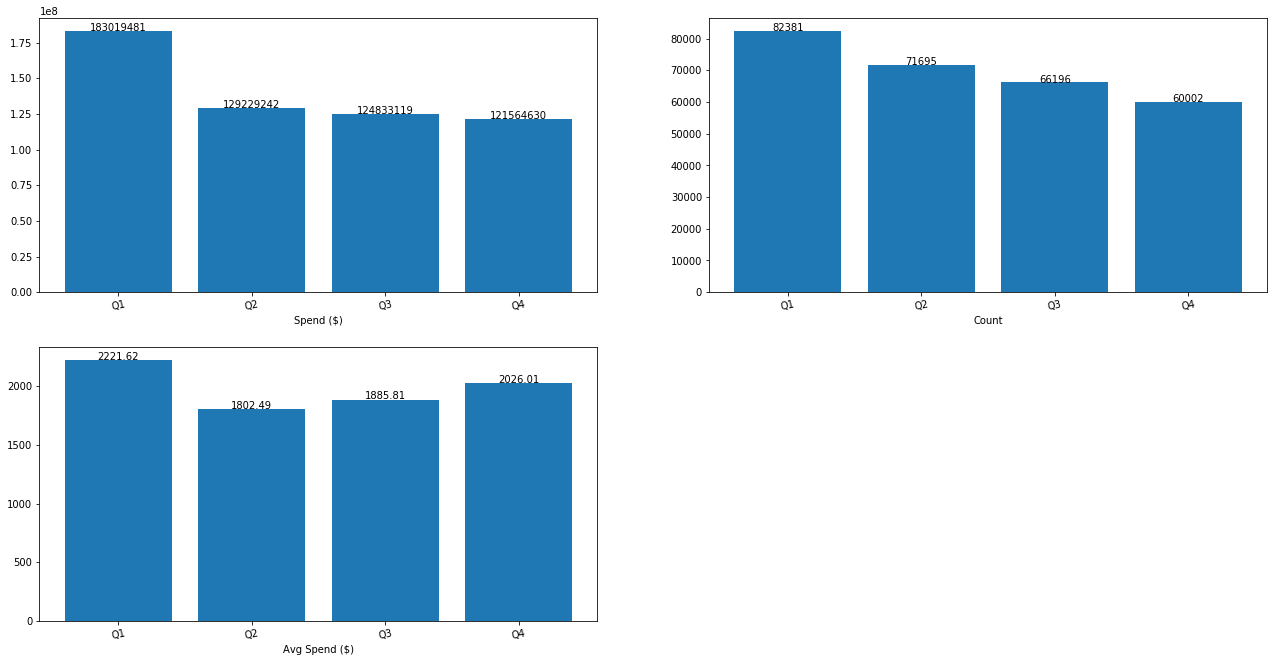

In [187]:
bar(q[0])

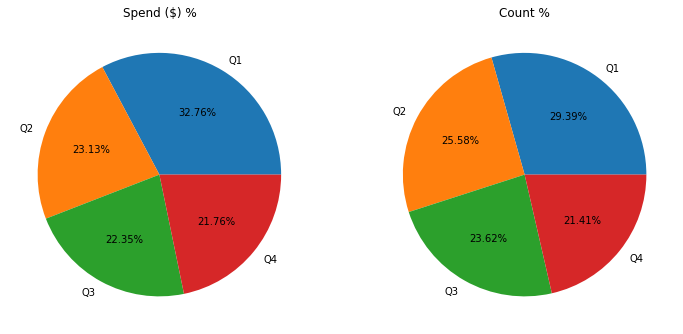

In [188]:
pie(q[1])


### `Quarters:`
- #### During the Q1, Maruti Suziki ran most advs, also spend most money for advs.
- #### After Q1, the budget for the Advs were reduced.
- #### During Q4, the average spend on Advs were bit increased.


In [189]:
display_side_by_side(d[0],d[1],titles=[])

,Spend ($),Count,Avg Spend ($)
Dayparts,,,
DAYTIME,48678486,49811,977.26
EARLY FRINGE,22745305,17124,1328.27
EARLY MORNING,28920899,35078,824.47
EVENING NEWS,20776891,9968,2084.36
LATE FRINGE,74069950,45224,1637.85
OVERNIGHT,23614157,27224,867.40
PRIME ACCESS,29021227,9473,3063.57
PRIME TIME,213609797,47738,4474.63
WEEKEND,97209760,38634,2516.17


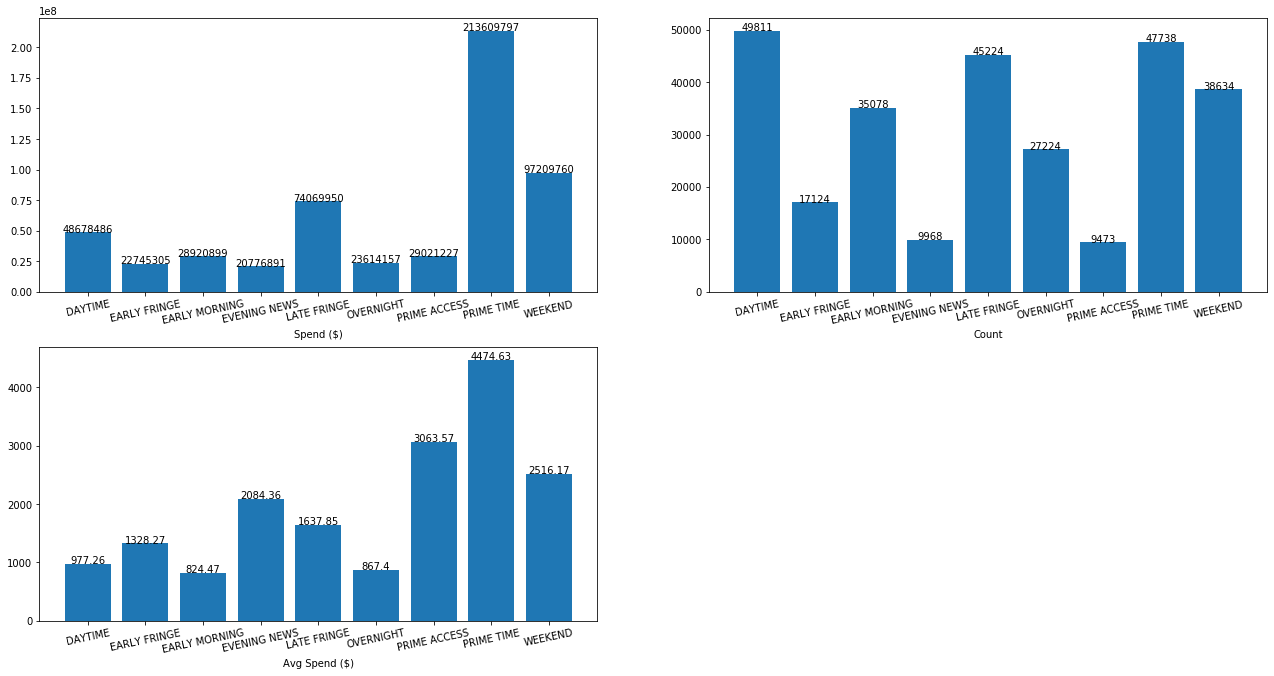

In [190]:
bar(d[0])

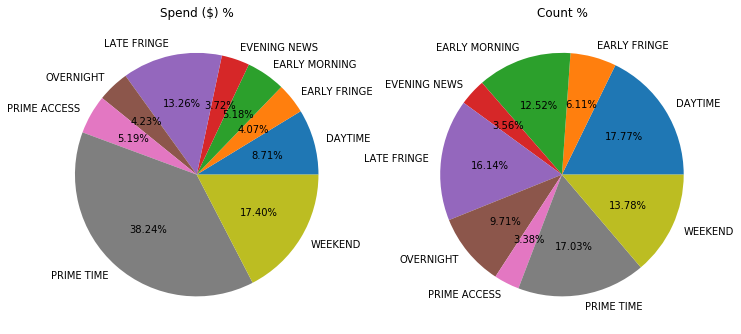

In [191]:
pie(d[1])

### `Dayparts:`
- #### Maruti Suzuki prefer to run their advs during the Daytime, Weekend, Primetime and Early-morning shows.
- #### For the primetime show, Honda car spend 38% of it's budget, and for the weekend show 17%.

In [192]:
display_side_by_side(t[0],t[1],titles=[])

Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 TimeZone 
 
 
 
 
 
 
 
 Central India 
 1836696 
 1316 
 1395.67 
 
 
 Northeast India 
 509718664 
 269674 
 1890.13 
 
 
 Northern India 
 395195 
 41 
 9638.90 
 
 
 Southern India 
 46695917 
 9243 
 5052.03 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 TimeZone 
 
 
 
 
 
 
 Central India 
 0.328776 
 0.469541 
 
 
 Northeast India 
 91.241723 
 96.217987 
 
 
 Northern India 
 0.070742 
 0.014629 
 
 
 Southern India 
 8.358760 
 3.297844

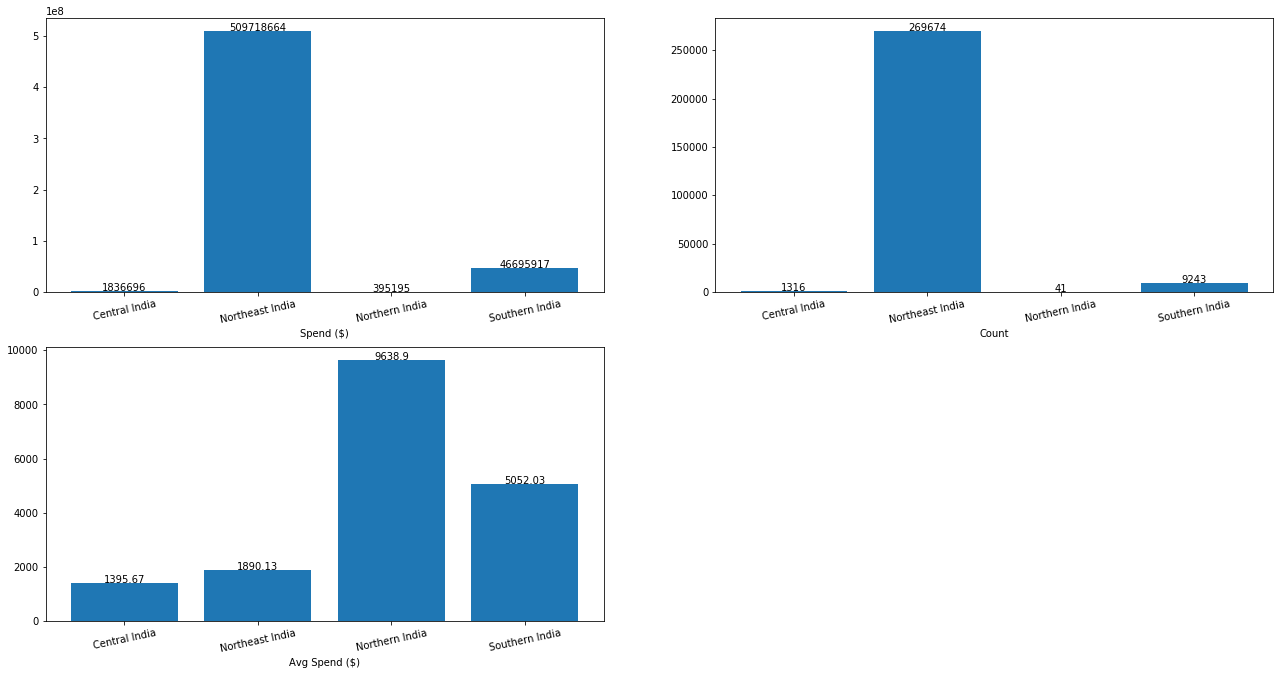

In [193]:
bar(t[0])

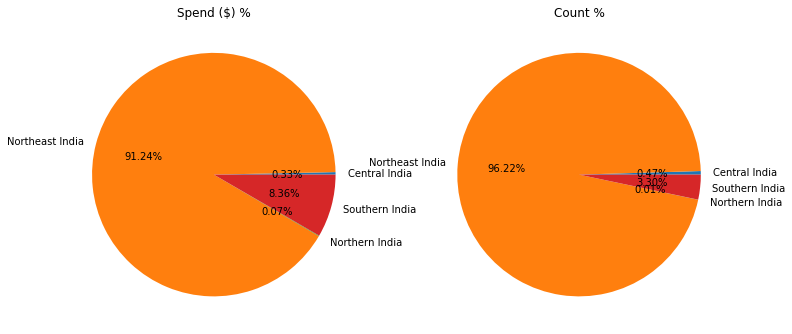

In [194]:
pie(t[1])


### `Timezone:`
- #### More than 95% of the Advs were ran on the Northeast India timezone, also 91% of the budget were allocated for this timezone.
- #### The average spend on Advs in the Northern India timezone is higher than other timezones.


In [195]:
display_side_by_side(n[0],n[1],titles=[])

Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Network Type 
 
 
 
 
 
 
 
 broadcast 
 239190273 
 23160 
 10327.73 
 
 
 cable 
 319456199 
 257114 
 1242.47 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Network Type 
 
 
 
 
 
 
 broadcast 
 42.816036 
 8.263342 
 
 
 cable 
 57.183964 
 91.736658

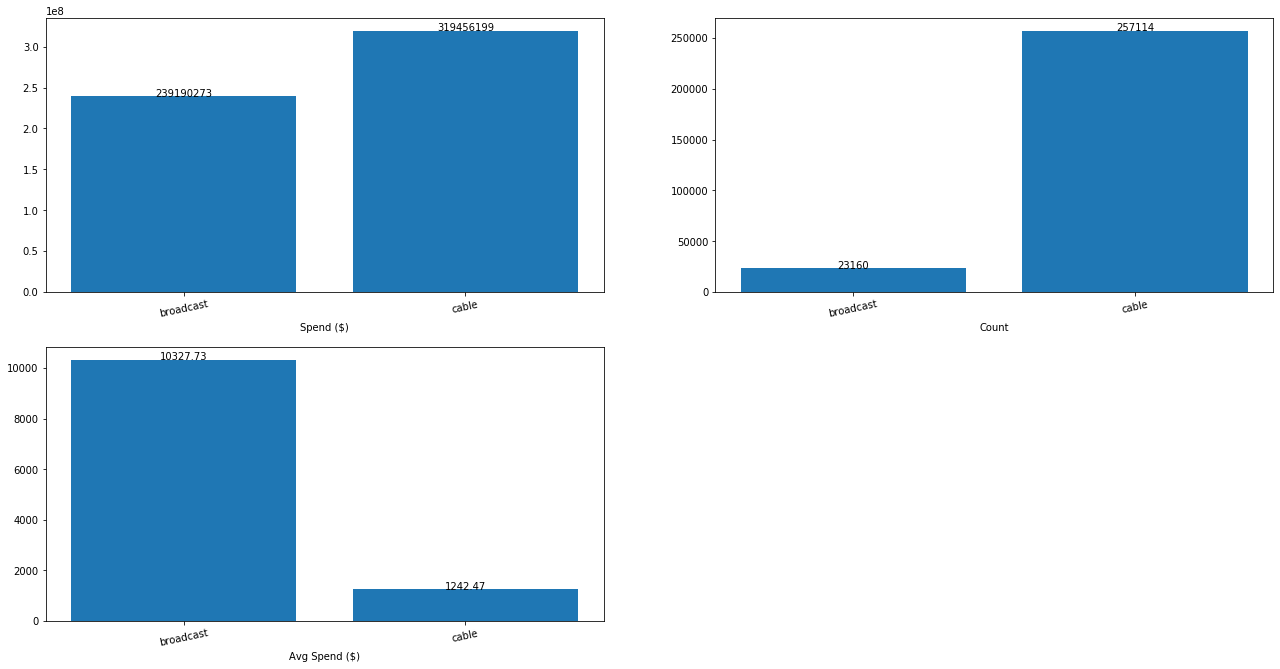

In [196]:
bar(n[0])

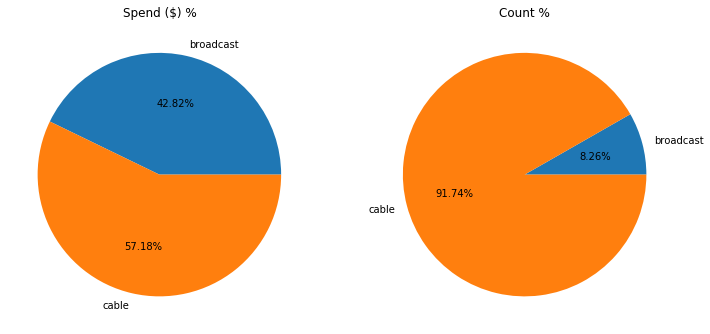

In [197]:
pie(n[1])

### `Network:`
- #### 92% of the Advs were ran on the Cable network, and 57% of the budget were allocated for this network.
- #### Though the spend on the cable network is bit higher than the boradcast network, but the average spendon the Broadcast network is way more higher than the cable network.

### `Products:`
- #### Maruti Suzuki has 7 products, they are 'Maruti Suzuki Baleno', 'Maruti Suzuki Ciaz','Maruti Suzuki WagonR', 'Maruti Suzuki Ertiga','Maruti Suzuki Swift', 'Maruti Suzuki Ignis','Maruti Suzuki Celerio'
- ####  282 times Maruti Suzuki's advertisements were at Pod position 1 without spending a singel penny.
- #### Maruti Suzuki spend most for promoting `Maruti Suzuki Baleno`, on 07-12-2021 at PRIME TIME show.
- #### Out of total advertisements ran by Maruti Suzuki brand, nearly 58% of Advs were for the promotion of Baleno, and out of total budget 60 was spend for this product.
- #### Out of total advertisements ran by Maruti Suzuki brand, 37% of Advs were for the promotion of Ciaz, and out of total budget 36% was spend for this product.
- #### The brand ran only 33 advs for the promotion of celerio.


### `Quarters:`
- #### During the Q1, Maruti Suziki ran most advs, also spend most money for advs.
- #### After Q1, the budget for the Advs were reduced.
- #### During Q4, the average spend on Advs were bit increased.


### `Dayparts:`
- #### Maruti Suzuki prefer to run their advs during the Daytime, Weekend, Primetime and Early-morning shows.
- #### For the primetime show, Honda car spend 38% of it's budget, and for the weekend show 17%.


### `Timezone:`
- #### More than 95% of the Advs were ran on the Northeast India timezone, also 91% of the budget were allocated for this timezone.
- #### The average spend on Advs in the Northern India timezone is higher than other timezones.


### `Network:`
- #### 92% of the Advs were ran on the Cable network, and 57% of the budget were allocated for this network.
- #### Though the spend on the cable network is bit higher than the boradcast network, but the average spendon the Broadcast network is way more higher than the cable network.

## <u>`Hyundai Motors India`

In [198]:
data.loc[data['Brand']=='Hyundai Motors India',:]['Product'].unique()

array(['Hyundai I20'], dtype=object)

In [199]:
len(data.loc[data['Brand']=='Hyundai Motors India',:]['Product'].unique())

1

- #### Hyundai Motors India has 1 product, it is 'Hyundai I20'

In [200]:
data.loc[(data['Brand']=='Hyundai Motors India') & (data['Pod Position']==1) & (data['Spend ($)']==0),:]

,Id,Brand,Product,Network,Network Type,Show,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Week,Day Of Week,Hour Of Day,TimeZone,Date_Time,Broadcast Month,Day_Time,Quarters
367601,1367602,Hyundai Motors India,Hyundai I20,N-10090,cable,S-14278,1,EVENING NEWS,30,1.0,0,25,Fri,18,Southern India,2021-06-18 18:39:29,Jun,Evening,Q2
409738,1409739,Hyundai Motors India,Hyundai I20,N-10102,cable,S-15356,1,WEEKEND,15,0.5,0,26,Sun,13,Northeast India,2021-06-27 13:14:12,Jun,Afternoon,Q2
456791,1456792,Hyundai Motors India,Hyundai I20,N-10090,cable,S-18491,1,WEEKEND,30,1.0,0,29,Sun,16,Southern India,2021-07-18 16:03:00,Jul,Afternoon,Q3
511019,1511020,Hyundai Motors India,Hyundai I20,N-10090,cable,S-14276,1,OVERNIGHT,30,1.0,0,35,Wed,4,Southern India,2021-08-25 04:57:47,Aug,Mid-night,Q3
641860,1641861,Hyundai Motors India,Hyundai I20,N-10050,cable,S-12560,1,LATE FRINGE,30,1.0,0,45,Sun,1,Northeast India,2021-11-07 01:46:27,Nov,Mid-night,Q4
649343,1649344,Hyundai Motors India,Hyundai I20,N-10014,cable,S-20263,1,LATE FRINGE,15,0.5,0,45,Sun,1,Northeast India,2021-11-07 01:20:45,Nov,Mid-night,Q4
656525,1656526,Hyundai Motors India,Hyundai I20,N-10014,cable,S-20263,1,LATE FRINGE,15,0.5,0,45,Sun,1,Northeast India,2021-11-07 01:45:01,Nov,Mid-night,Q4


In [201]:
data.loc[(data['Brand']=='Hyundai Motors India') & (data['Pod Position']==1) & (data['Spend ($)']==0),:].shape

(7, 19)

- #### ⬆️⬆️ Above 7 times Hyundai Motors India's advertisements were at Pod position 1 without spending a singel penny.

In [202]:
sca

,Spend ($),Count,Avg Spend ($),Max Spend ($),Min Spend ($)
Brand,,,,,
Honda Cars,48258340,85265,565.98,72902,0
Hyundai Motors India,180808756,71296,2536.03,5500000,0
Mahindra and Mahindra,397305655,147890,2686.49,103048,0
Maruti Suzuki,558646472,280274,1993.22,91596,0
Tata Motors,94790227,81041,1169.66,83935,0
Toyota,112653112,66018,1706.40,92140,0


In [203]:
data.loc[(data['Brand']=='Hyundai Motors India') & (data['Spend ($)']==5500000),:]

,Id,Brand,Product,Network,Network Type,Show,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Week,Day Of Week,Hour Of Day,TimeZone,Date_Time,Broadcast Month,Day_Time,Quarters
93821,1093822,Hyundai Motors India,Hyundai I20,N-10020,broadcast,S-19607,4,PRIME TIME,30,1.0,5500000,6,Sun,19,Northeast India,2021-02-07 19:18:52,Feb,Evening,Q1


- #### ⬆️⬆️ Hyundai Motors India spend most for promoting `Hyundai I20`, on 07-02-2021 at PRIME TIME show.

In [204]:
p=product_comapre('Hyundai Motors India')
q=quarters_comapre('Hyundai Motors India')
d=daypart_comapre('Hyundai Motors India')
t=timezone_comapre('Hyundai Motors India')
n=network_comapre('Hyundai Motors India')

In [205]:
display_side_by_side(q[0],q[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Quarters 
 
 
 
 
 
 
 
 Q1 
 62470842 
 22396 
 2789.37 
 
 
 Q2 
 40830200 
 18623 
 2192.46 
 
 
 Q3 
 38727107 
 16484 
 2349.38 
 
 
 Q4 
 38780607 
 13793 
 2811.62 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Quarters 
 
 
 
 
 
 
 Q1 
 34.550784 
 31.412702 
 
 
 Q2 
 22.581982 
 26.120680 
 
 
 Q3 
 21.418823 
 23.120512 
 
 
 Q4 
 21.448412 
 19.346106

In [206]:
data.loc[(data['Spend ($)']==5500000)  ,['Brand','Product','Spend ($)','Pod Position','Quarters','Broadcast Month']]


,Brand,Product,Spend ($),Pod Position,Quarters,Broadcast Month
93821,Hyundai Motors India,Hyundai I20,5500000,4,Q1,Feb


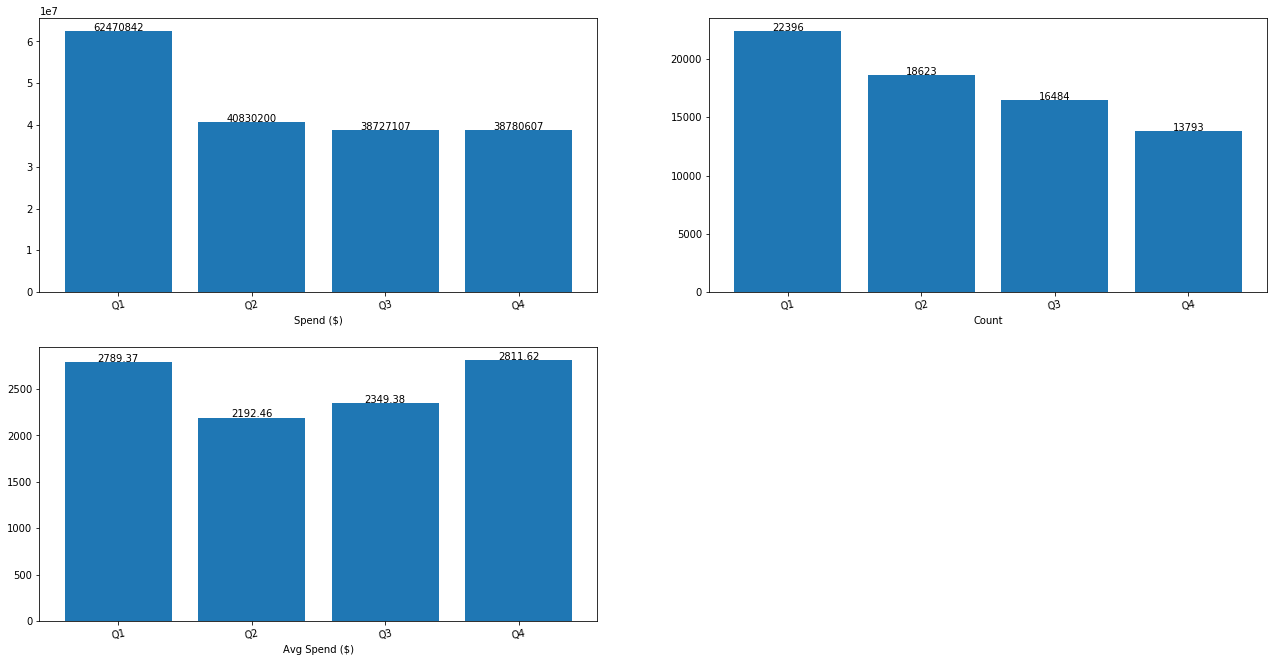

In [207]:
bar(q[0])


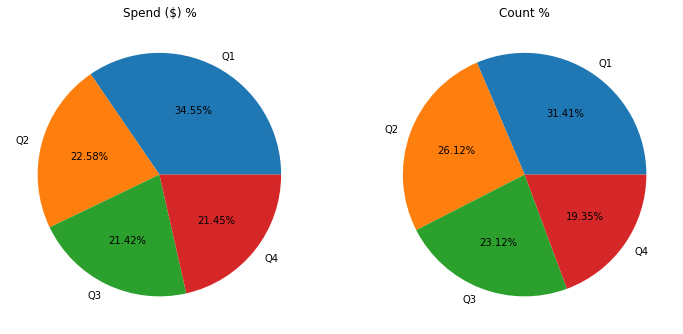

In [208]:
pie(q[1])



### `Quarters:`
- #### During the Q1, Hyundai Motors India ran most advs, also spend most money for advs.
- #### After Q1, the budget for the Advs were reduced.
- #### During the Q4, average spend per Adv is most.

In [209]:
display_side_by_side(d[0],d[1],titles=[])


,Spend ($),Count,Avg Spend ($)
Dayparts,,,
DAYTIME,12360920,12485,990.06
EARLY FRINGE,7156835,4367,1638.84
EARLY MORNING,8708318,8153,1068.11
EVENING NEWS,5364194,2411,2224.88
LATE FRINGE,13648569,10214,1336.26
OVERNIGHT,3181379,6621,480.50
PRIME ACCESS,7711727,2970,2596.54
PRIME TIME,86737738,13508,6421.21
WEEKEND,35939076,10567,3401.07


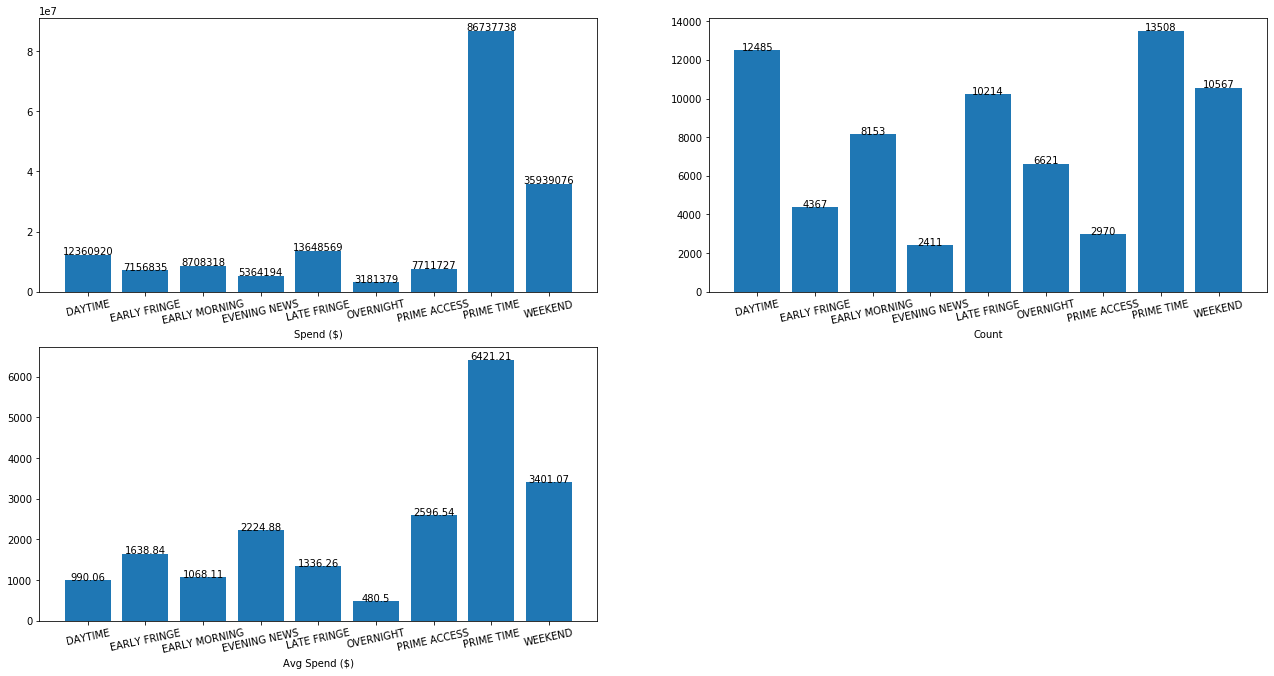

In [210]:
bar(d[0])

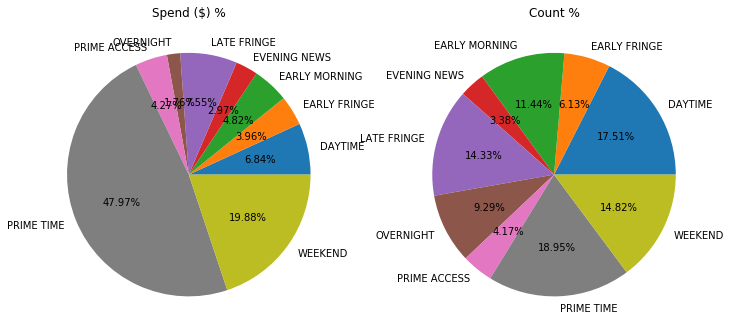

In [211]:
pie(d[1])

### `Dayparts:`
- #### Hyundai Motors India prefer to run their advs during the Daytime, Weekend, Primetime, Late fringe and Early-morning shows.
- #### For the Primetime show, Hyundai Motors India spend 48% of it's budget, and for the weekend show 20%.

In [212]:
display_side_by_side(t[0],t[1],titles=[])

Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 TimeZone 
 
 
 
 
 
 
 
 Central India 
 888129 
 159 
 5585.72 
 
 
 Northeast India 
 162307451 
 69316 
 2341.56 
 
 
 Northern India 
 222498 
 13 
 17115.23 
 
 
 Southern India 
 17390678 
 1808 
 9618.74 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 TimeZone 
 
 
 
 
 
 
 Central India 
 0.491198 
 0.223014 
 
 
 Northeast India 
 89.767473 
 97.222846 
 
 
 Northern India 
 0.123057 
 0.018234 
 
 
 Southern India 
 9.618272 
 2.535907

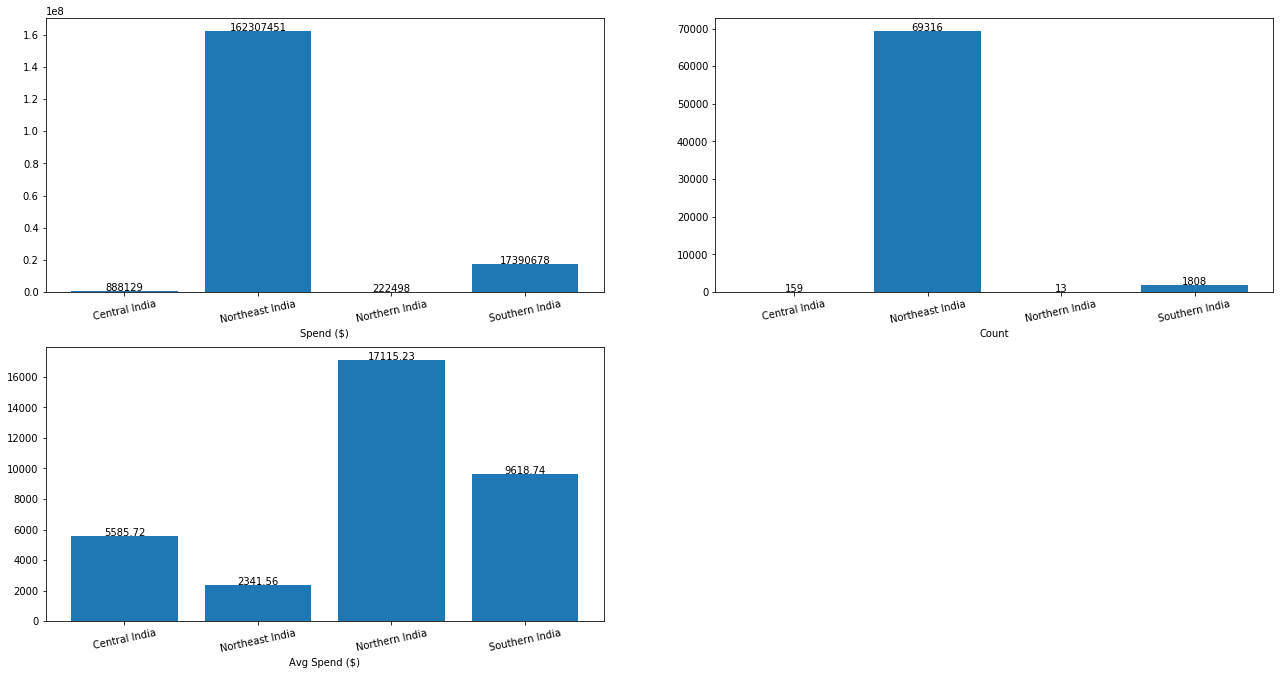

In [213]:
bar(t[0])

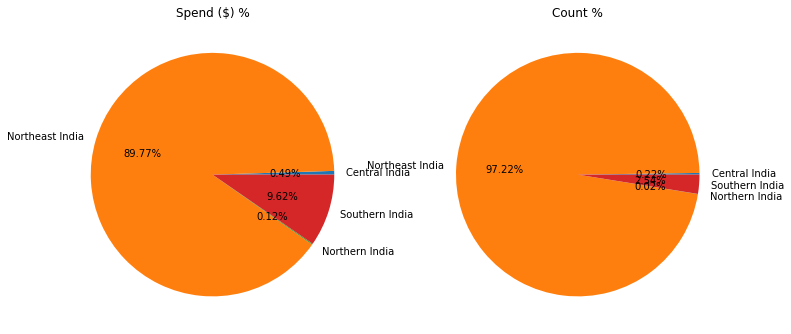

In [214]:
pie(t[1])


### `Timezone:`
- #### More than 95% of the Advs were ran on the Northeast India timezone, also 90% of the budget were allocated for this timezone.
- #### The average spend on Advs in the Northern India, Southern India timezone is higher than other timezones.


In [215]:
display_side_by_side(n[0],n[1],titles=[])

Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Network Type 
 
 
 
 
 
 
 
 broadcast 
 86701728 
 4796 
 18077.92 
 
 
 cable 
 94107028 
 66500 
 1415.14 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Network Type 
 
 
 
 
 
 
 broadcast 
 47.952173 
 6.726885 
 
 
 cable 
 52.047827 
 93.273115

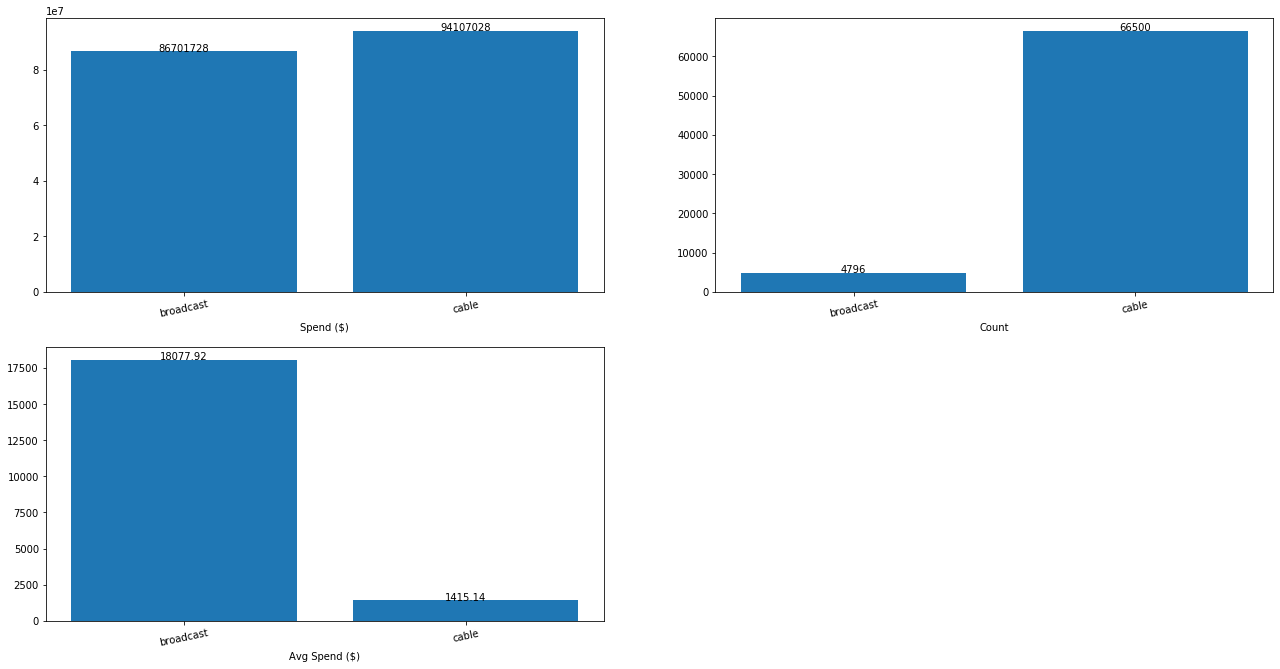

In [216]:
bar(n[0])

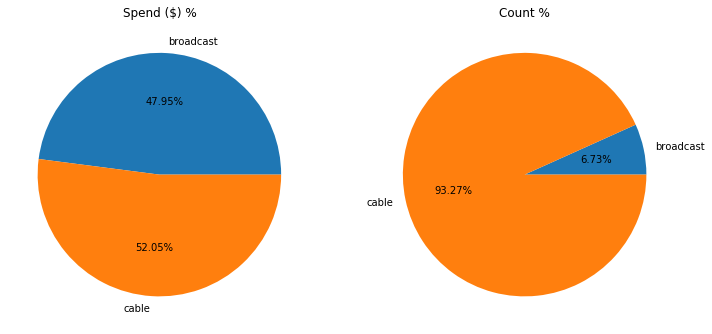

In [217]:
pie(n[1])

### `Network:`
- #### 93% of the Advs were ran on the Cable network, and 52% of the budget were allocated for this network.
- #### Though the spend on the cable network is bit higher than the boradcast network, but the average spendon the Broadcast network is way more higher than the cable network.

### `Products:`
- #### Hyundai Motors India has 1 product, it is 'Hyundai I20'
- #### 7 times Hyundai Motors India's advertisements were at Pod position 1 without spending a singel penny.
- ####  Hyundai Motors India spend most for promoting `Hyundai I20`, on 07-02-2021 at PRIME TIME show.


### `Quarters:`
- #### During the Q1, Hyundai Motors India ran most advs, also spend most money for advs.
- #### After Q1, the budget for the Advs were reduced.
- #### During the Q4, average spend per Adv is most.

### `Dayparts:`
- #### Hyundai Motors India prefer to run their advs during the Daytime, Weekend, Primetime, Late fringe and Early-morning shows.
- #### For the Primetime show, Hyundai Motors India spend 48% of it's budget, and for the weekend show 20%.


### `Timezone:`
- #### More than 95% of the Advs were ran on the Northeast India timezone, also 90% of the budget were allocated for this timezone.
- #### The average spend on Advs in the Northern India, Southern India timezone is higher than other timezones.


### `Network:`
- #### 93% of the Advs were ran on the Cable network, and 52% of the budget were allocated for this network.
- #### Though the spend on the cable network is bit higher than the boradcast network, but the average spendon the Broadcast network is way more higher than the cable network.

## <u>`Toyota`

In [218]:
data.loc[data['Brand']=='Toyota',:]['Product'].unique()

array(['Toyota Innova', 'Toyota Etios', 'Toyota Fortuner'], dtype=object)

In [219]:
len(data.loc[data['Brand']=='Toyota',:]['Product'].unique())

3

- #### Toyota has 3 products, they are 'Toyota Innova', 'Toyota Etios', 'Toyota Fortuner'

In [220]:
data.loc[(data['Brand']=='Toyota') & (data['Pod Position']==1) & (data['Spend ($)']==0),:]

,Id,Brand,Product,Network,Network Type,Show,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Week,Day Of Week,Hour Of Day,TimeZone,Date_Time,Broadcast Month,Day_Time,Quarters
209672,1209673,Toyota,Toyota Etios,N-10048,cable,S-14023,1,EARLY MORNING,15,0.5,0,13,Wed,6,Northeast India,2021-03-24 06:46:11,Mar,Early-morning,Q1
257430,1257431,Toyota,Toyota Innova,N-10090,cable,S-14276,1,PRIME TIME,30,1.0,0,18,Wed,21,Southern India,2021-04-28 21:40:09,Apr,Night,Q2
257925,1257926,Toyota,Toyota Innova,N-10090,cable,S-10321,1,EARLY MORNING,30,1.0,0,19,Tues,6,Southern India,2021-05-04 06:39:00,May,Early-morning,Q2
285269,1285270,Toyota,Toyota Innova,N-10090,cable,S-10318,1,OVERNIGHT,30,1.0,0,18,Fri,2,Southern India,2021-04-30 02:23:28,Apr,Mid-night,Q2
336576,1336577,Toyota,Toyota Innova,N-10090,cable,S-22426,1,DAYTIME,30,1.0,0,24,Tues,14,Southern India,2021-06-08 14:36:18,Jun,Afternoon,Q2
346781,1346782,Toyota,Toyota Innova,N-10090,cable,S-18491,1,EARLY MORNING,30,1.0,0,23,Thurs,7,Southern India,2021-06-03 07:31:16,Jun,Early-morning,Q2
347084,1347085,Toyota,Toyota Innova,N-10090,cable,S-14276,1,DAYTIME,30,1.0,0,24,Wed,14,Southern India,2021-06-09 14:02:05,Jun,Afternoon,Q2
348646,1348647,Toyota,Toyota Innova,N-10090,cable,S-14276,1,PRIME TIME,30,1.0,0,23,Fri,21,Southern India,2021-06-04 21:54:18,Jun,Night,Q2
358405,1358406,Toyota,Toyota Innova,N-10090,cable,S-14276,1,DAYTIME,30,1.0,0,24,Wed,14,Southern India,2021-06-09 14:28:28,Jun,Afternoon,Q2
367637,1367638,Toyota,Toyota Innova,N-10090,cable,S-14276,1,EARLY FRINGE,30,1.0,0,26,Wed,16,Southern India,2021-06-23 16:23:57,Jun,Afternoon,Q2


In [221]:
data.loc[(data['Brand']=='Toyota') & (data['Pod Position']==1) & (data['Spend ($)']==0),:].shape

(40, 19)

- #### ⬆️⬆️ Above 40 times Toyota's advertisements were at Pod position 1 without spending a singel penny. 

In [222]:
sca

,Spend ($),Count,Avg Spend ($),Max Spend ($),Min Spend ($)
Brand,,,,,
Honda Cars,48258340,85265,565.98,72902,0
Hyundai Motors India,180808756,71296,2536.03,5500000,0
Mahindra and Mahindra,397305655,147890,2686.49,103048,0
Maruti Suzuki,558646472,280274,1993.22,91596,0
Tata Motors,94790227,81041,1169.66,83935,0
Toyota,112653112,66018,1706.40,92140,0


In [223]:
data.loc[(data['Brand']=='Toyota') & (data['Spend ($)']==92140),:]

,Id,Brand,Product,Network,Network Type,Show,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Week,Day Of Week,Hour Of Day,TimeZone,Date_Time,Broadcast Month,Day_Time,Quarters
24249,1024250,Toyota,Toyota Innova,N-10020,broadcast,S-20845,1,DAYTIME,120,4.0,92140,2,Tues,11,Northeast India,2021-01-05 11:41:03,Jan,Morning,Q1


- #### ⬆️⬆️ Toyota spend most for promoting `Toyota Innova`, on 05-01-2021 at DAYTIME show.

In [224]:
p=product_comapre('Toyota')
q=quarters_comapre('Toyota')
d=daypart_comapre('Toyota')
t=timezone_comapre('Toyota')
n=network_comapre('Toyota')

In [225]:
display_side_by_side(p[0],p[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Product 
 
 
 
 
 
 
 
 Toyota Etios 
 43551141 
 26865 
 1621.11 
 
 
 Toyota Fortuner 
 159554 
 5 
 31910.80 
 
 
 Toyota Innova 
 68942417 
 39148 
 1761.07 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Product 
 
 
 
 
 
 
 Toyota Etios 
 38.659510 
 40.693447 
 
 
 Toyota Fortuner 
 0.141633 
 0.007574 
 
 
 Toyota Innova 
 61.198857 
 59.298979

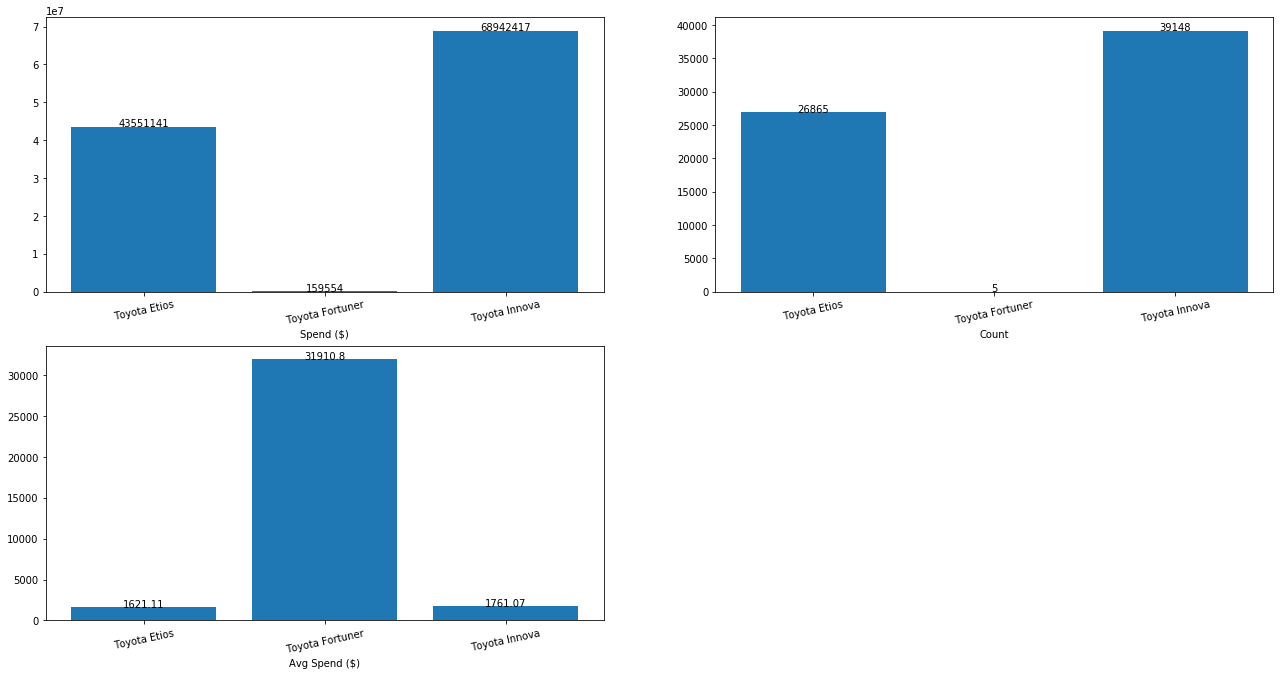

In [226]:
bar(p[0])

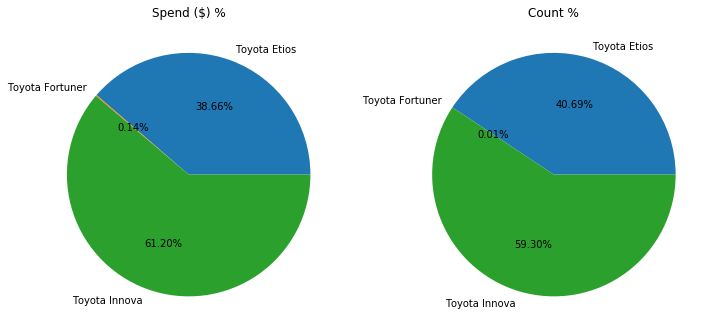

In [227]:
pie(p[1])

### `Products:`
- #### Out of total advertisements ran by Toyota brand, nearly 60% of Advs were for the promotion of Innova, also out of total budget 61% was spend for this product.
- #### Though, the brand ran only 5 advs for the promotion of Fortuner, but the average spend per adv is USD 31910, which is heighest among other products.

In [228]:
display_side_by_side(q[0],q[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Quarters 
 
 
 
 
 
 
 
 Q1 
 40351398 
 18212 
 2215.65 
 
 
 Q2 
 29509857 
 22083 
 1336.32 
 
 
 Q3 
 28424768 
 19678 
 1444.49 
 
 
 Q4 
 14367089 
 6045 
 2376.69 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Quarters 
 
 
 
 
 
 
 Q1 
 35.819160 
 27.586416 
 
 
 Q2 
 26.195332 
 33.449968 
 
 
 Q3 
 25.232120 
 29.807022 
 
 
 Q4 
 12.753388 
 9.156594

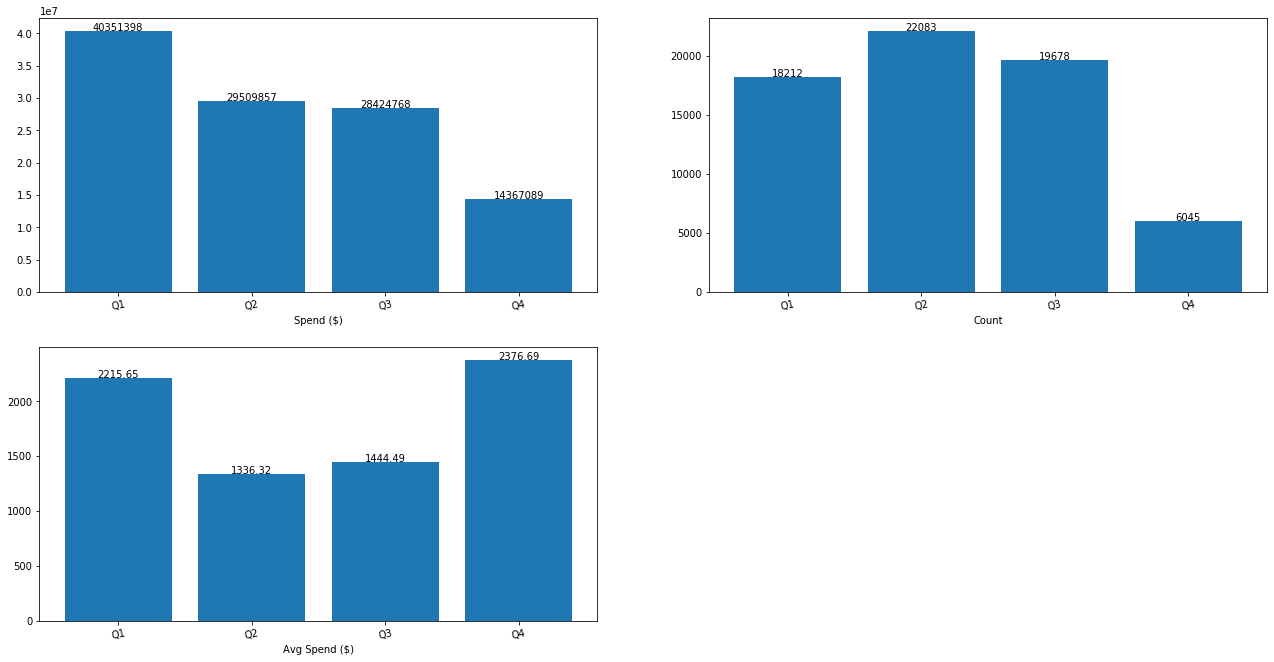

In [229]:
bar(q[0])


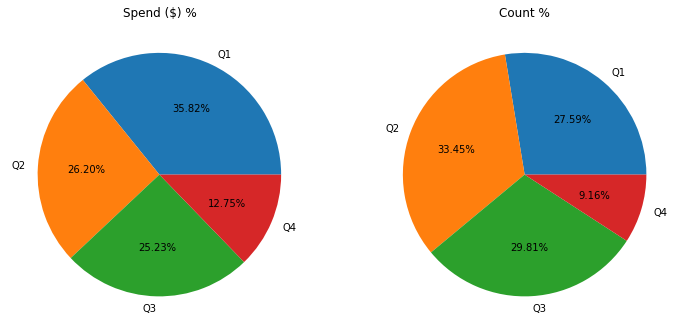

In [230]:
pie(q[1])



### `Quarters:`
- #### We can see a jump in numbers of Advs from Q1 to Q2, after that Advs were reduced.
- #### During the Q1, Toyota ran spend most on advs.
- #### After Q1, the budget for the Advs were reduced.


In [231]:
display_side_by_side(d[0],d[1],titles=[])


,Spend ($),Count,Avg Spend ($)
Dayparts,,,
DAYTIME,18560894,17393,1067.15
EARLY FRINGE,9744570,4611,2113.33
EARLY MORNING,8294798,8807,941.84
EVENING NEWS,5409054,2535,2133.75
LATE FRINGE,8863807,7716,1148.76
OVERNIGHT,1716154,3458,496.29
PRIME ACCESS,8979945,2353,3816.38
PRIME TIME,24146575,9204,2623.49
WEEKEND,26937315,9941,2709.72


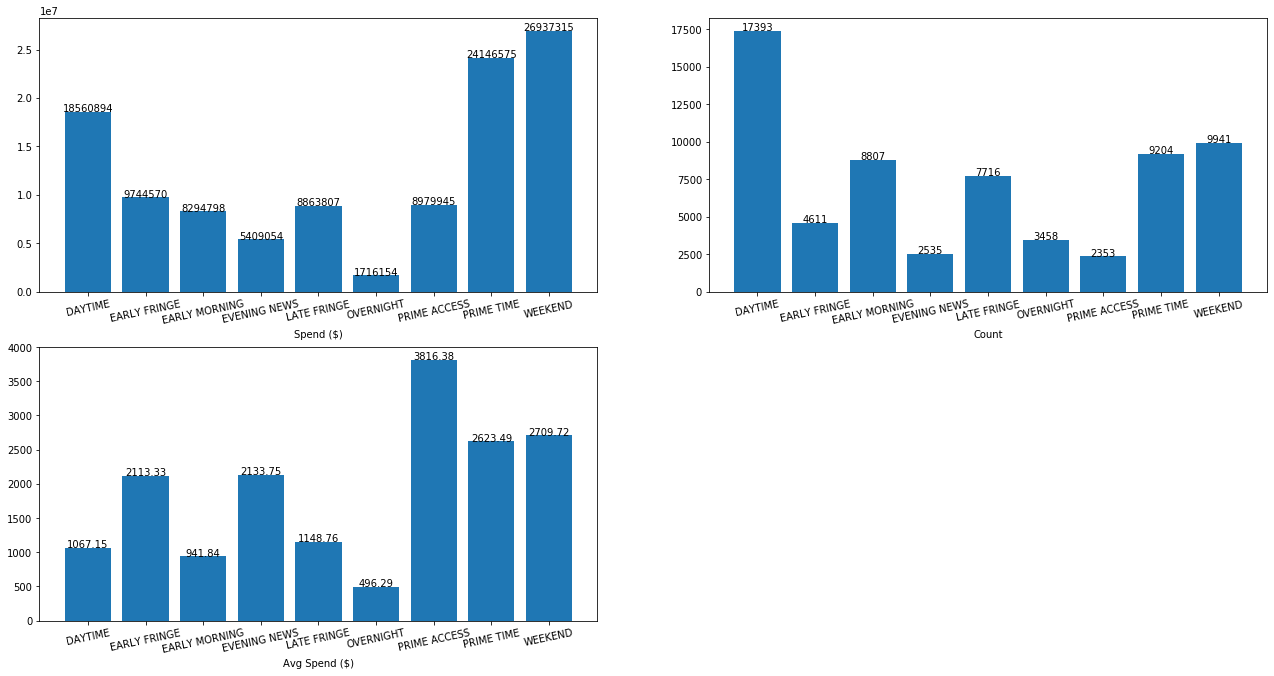

In [232]:
bar(d[0])


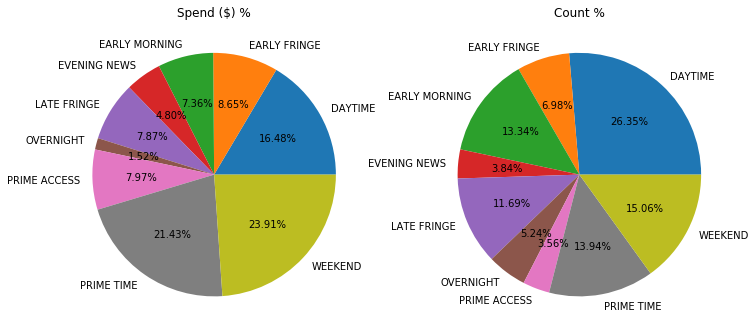

In [233]:
pie(d[1])


### `Dayparts:`
- #### Toyota prefer to run their advs during the Daytime, Weekend, Primetime and Early-morning shows.
- #### For the Weekend show, Toyota spend 24% of it's budget, and for the primetime show 21%, for the daytime show 16.5%.

In [234]:
display_side_by_side(t[0],t[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 TimeZone 
 
 
 
 
 
 
 
 Central India 
 1015383 
 999 
 1016.40 
 
 
 Northeast India 
 100164016 
 61848 
 1619.52 
 
 
 Northern India 
 197467 
 7 
 28209.57 
 
 
 Southern India 
 11276246 
 3164 
 3563.92 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 TimeZone 
 
 
 
 
 
 
 Central India 
 0.901336 
 1.513224 
 
 
 Northeast India 
 88.913670 
 93.683541 
 
 
 Northern India 
 0.175288 
 0.010603 
 
 
 Southern India 
 10.009707 
 4.792632

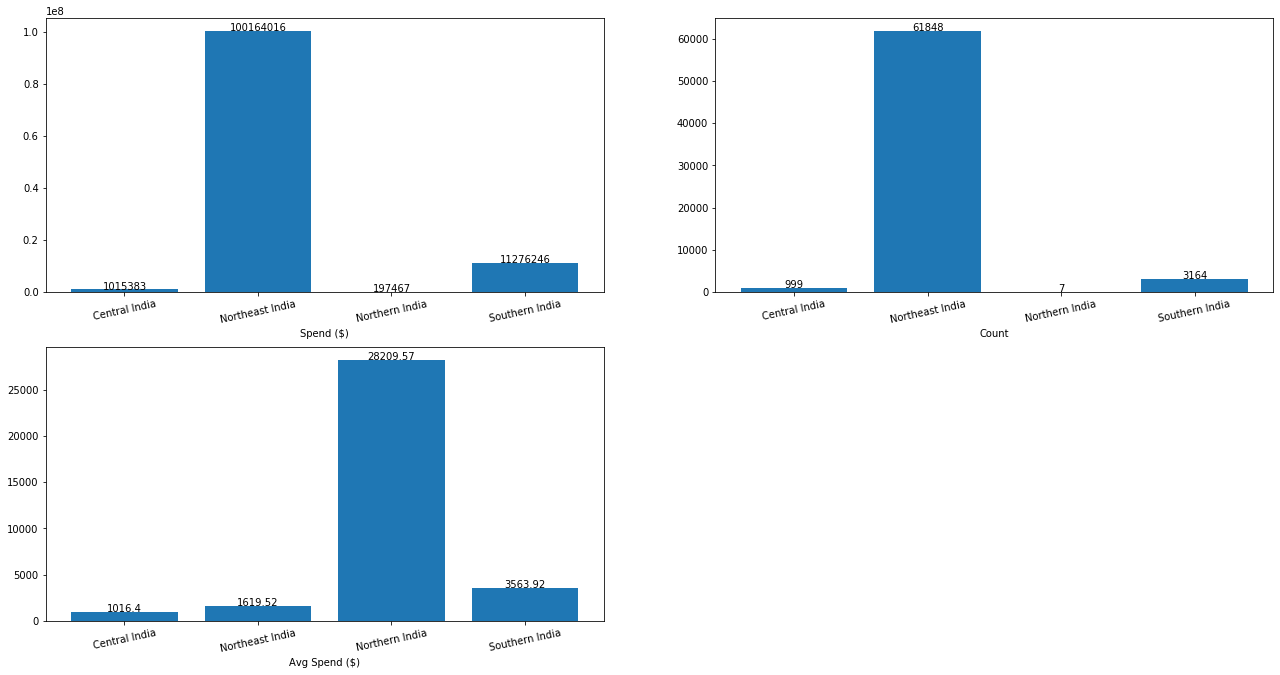

In [235]:
bar(t[0])

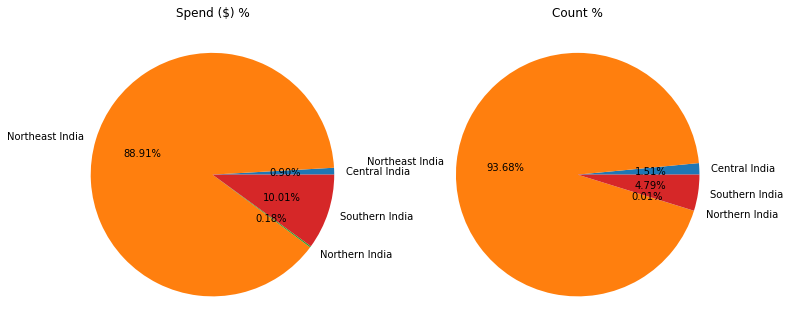

In [236]:
pie(t[1])


### `Timezone:`
- #### More than 94% of the Advs were ran on the Northeast India timezone, also 89% of the budget were allocated for this timezone.
- #### The average spend on Advs in the Northern  India timezone is higher than other timezones.


In [237]:
display_side_by_side(n[0],n[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Network Type 
 
 
 
 
 
 
 
 broadcast 
 29330783 
 3205 
 9151.57 
 
 
 cable 
 83322329 
 62813 
 1326.51 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Network Type 
 
 
 
 
 
 
 broadcast 
 26.036372 
 4.854737 
 
 
 cable 
 73.963628 
 95.145263

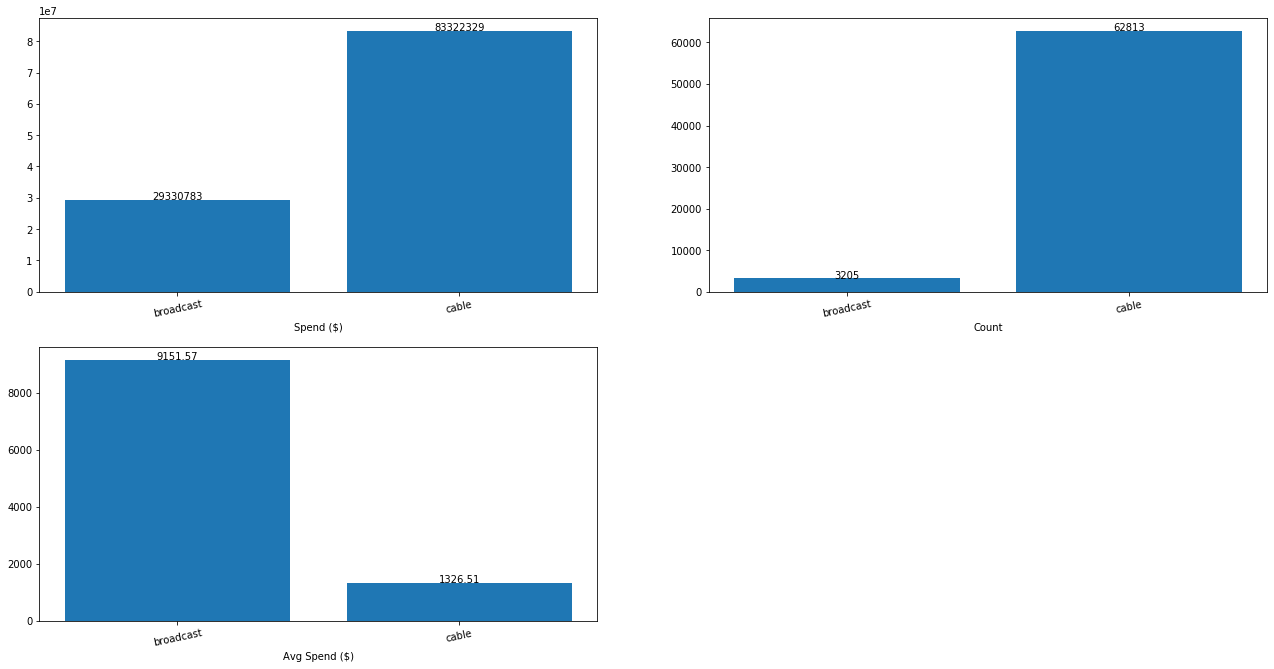

In [238]:
bar(n[0])

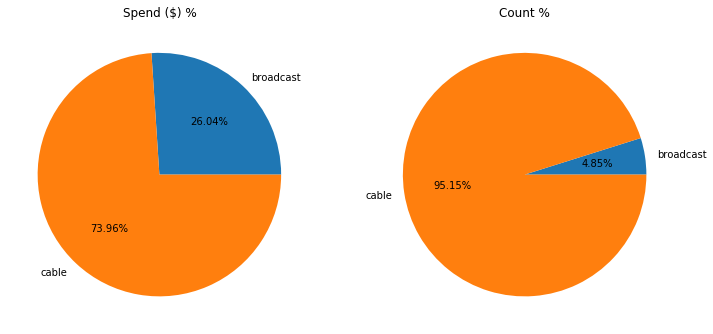

In [239]:
pie(n[1])

### `Network:`
- #### 95% of the Advs were ran on the Cable network, and 74% of the budget were allocated for this network.
- #### Though the spend on the cable network is higher than the boradcast network, but the average spendon the Broadcast network is way more higher than the cable network.

### `Products:`
- #### Toyota has 3 products, they are 'Toyota Innova', 'Toyota Etios', 'Toyota Fortuner'
- #### 40 times Toyota's advertisements were at Pod position 1 without spending a singel penny. 
- #### Toyota spend most for promotion of `Toyota Innova`, on 05-01-2021 at DAYTIME show.
- #### Out of total advertisements ran by Toyota brand, nearly 60% of Advs were for the promotion of Innova, also out of total budget 61% was spend for this product.
- #### Though, the brand ran only 5 advs for the promotion of Fortuner, but the average spend per adv is USD 31910, which is heighest among other products.


### `Quarters:`
- #### We can see a jump in numbers of Advs from Q1 to Q2, after that Advs were reduced.
- #### During the Q1, Toyota ran spend most on advs.
- #### After Q1, the budget for the Advs were reduced.


### `Dayparts:`
- #### Toyota prefer to run their advs during the Daytime, Weekend, Primetime and Early-morning shows.
- #### For the Weekend show, Toyota spend 24% of it's budget, and for the primetime show 21%, for the daytime show 16.5%.


### `Timezone:`
- #### More than 94% of the Advs were ran on the Northeast India timezone, also 89% of the budget were allocated for this timezone.
- #### The average spend on Advs in the Northern  India timezone is higher than other timezones.


### `Network:`
- #### 95% of the Advs were ran on the Cable network, and 74% of the budget were allocated for this network.
- #### Though the spend on the cable network is higher than the boradcast network, but the average spendon the Broadcast network is way more higher than the cable network.

## <u>`Tata Motors`

In [240]:
data.loc[data['Brand']=='Tata Motors',:]['Product'].unique()

array(['Tata Tiago', 'Tata Safari', 'Tata Nexon'], dtype=object)

In [241]:
len(data.loc[data['Brand']=='Tata Motors',:]['Product'].unique())

3

- #### Tata Motors has 3 products, they are 'Tata Tiago', 'Tata Safari', 'Tata Nexon'

In [242]:
data.loc[(data['Brand']=='Tata Motors') & (data['Pod Position']==1) & (data['Spend ($)']==0),:]

,Id,Brand,Product,Network,Network Type,Show,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Week,Day Of Week,Hour Of Day,TimeZone,Date_Time,Broadcast Month,Day_Time,Quarters
222720,1222721,Tata Motors,Tata Safari,N-10062,cable,S-12129,1,DAYTIME,15,0.50,0,13,Tues,14,Northeast India,2021-03-23 14:02:24,Mar,Afternoon,Q1
445511,1445512,Tata Motors,Tata Safari,N-10052,cable,S-19790,1,WEEKEND,5,0.17,0,30,Sat,16,Northeast India,2021-07-24 16:29:14,Jul,Afternoon,Q3
571129,1571130,Tata Motors,Tata Nexon,N-10138,cable,S-14774,1,DAYTIME,15,0.50,0,39,Wed,14,Northeast India,2021-09-22 14:47:56,Sep,Afternoon,Q3
652486,1652487,Tata Motors,Tata Nexon,N-10051,cable,S-12560,1,LATE FRINGE,15,0.50,0,45,Sun,1,Northeast India,2021-11-07 01:21:10,Nov,Mid-night,Q4
652615,1652616,Tata Motors,Tata Safari,N-10033,cable,S-12007,1,LATE FRINGE,5,0.17,0,45,Sun,1,Northeast India,2021-11-07 01:44:49,Nov,Mid-night,Q4


In [243]:
data.loc[(data['Brand']=='Tata Motors') & (data['Pod Position']==1) & (data['Spend ($)']==0),:].shape

(5, 19)

- #### ⬆️⬆️ Above 5 times Tata Motors's advertisements were at Pod position 1 without spending a singel penny.

In [244]:
sca

,Spend ($),Count,Avg Spend ($),Max Spend ($),Min Spend ($)
Brand,,,,,
Honda Cars,48258340,85265,565.98,72902,0
Hyundai Motors India,180808756,71296,2536.03,5500000,0
Mahindra and Mahindra,397305655,147890,2686.49,103048,0
Maruti Suzuki,558646472,280274,1993.22,91596,0
Tata Motors,94790227,81041,1169.66,83935,0
Toyota,112653112,66018,1706.40,92140,0


In [245]:
data.loc[(data['Brand']=='Tata Motors') & (data['Spend ($)']==83935),:]

,Id,Brand,Product,Network,Network Type,Show,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Week,Day Of Week,Hour Of Day,TimeZone,Date_Time,Broadcast Month,Day_Time,Quarters
681144,1681145,Tata Motors,Tata Nexon,N-10002,broadcast,S-14870,7,PRIME TIME,30,1.0,83935,49,Wed,21,Northeast India,2021-12-01 21:57:26,Dec,Night,Q4


- #### ⬆️⬆️ Tata Motors spend most for promoting `Tata Nexon`, on 01-12-2021 at PRIME TIME show.

In [246]:
p=product_comapre('Tata Motors')
q=quarters_comapre('Tata Motors')
d=daypart_comapre('Tata Motors')
t=timezone_comapre('Tata Motors')
n=network_comapre('Tata Motors')

In [247]:
display_side_by_side(p[0],p[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Product 
 
 
 
 
 
 
 
 Tata Nexon 
 68498763 
 50101 
 1367.21 
 
 
 Tata Safari 
 24022082 
 28785 
 834.53 
 
 
 Tata Tiago 
 2269382 
 2155 
 1053.08 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Product 
 
 
 
 
 
 
 Tata Nexon 
 72.263529 
 61.821794 
 
 
 Tata Safari 
 25.342362 
 35.519058 
 
 
 Tata Tiago 
 2.394110 
 2.659148

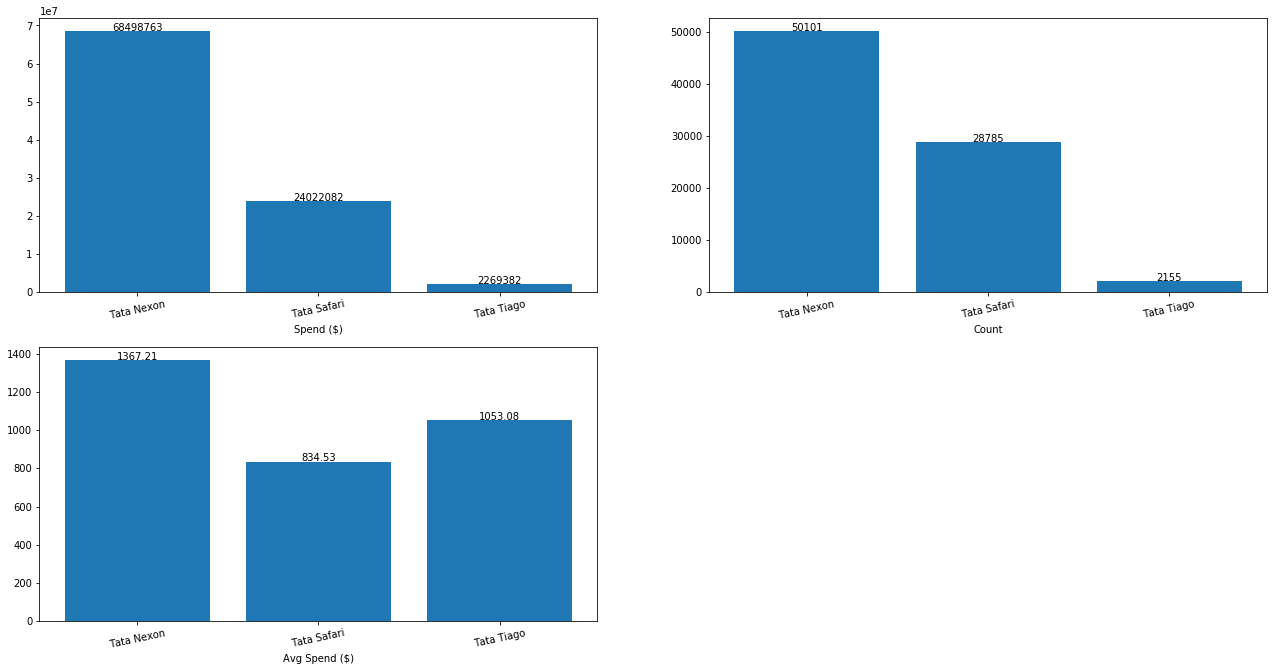

In [248]:
bar(p[0])

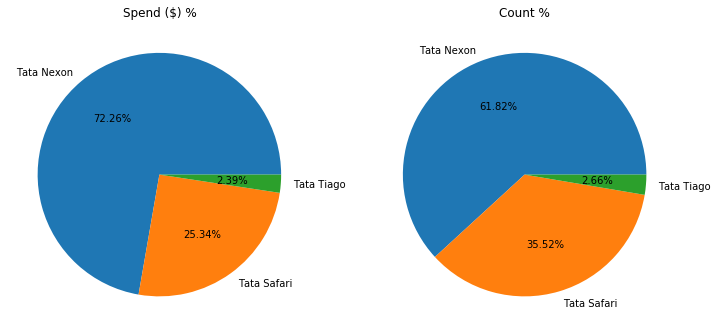

In [249]:
pie(p[1])

### `Products:`
- #### Out of total advertisements ran by Tata Motors brand, nearly 62% of Advs were for the promotion of Tata Nexon, also out of total budget 72% was spend for this product.


In [250]:
display_side_by_side(q[0],q[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Quarters 
 
 
 
 
 
 
 
 Q1 
 25796631 
 20679 
 1247.48 
 
 
 Q2 
 16408174 
 14967 
 1096.29 
 
 
 Q3 
 15831865 
 14912 
 1061.69 
 
 
 Q4 
 36753557 
 30483 
 1205.71 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Quarters 
 
 
 
 
 
 
 Q1 
 27.214442 
 25.516714 
 
 
 Q2 
 17.309985 
 18.468430 
 
 
 Q3 
 16.702001 
 18.400563 
 
 
 Q4 
 38.773572 
 37.614294

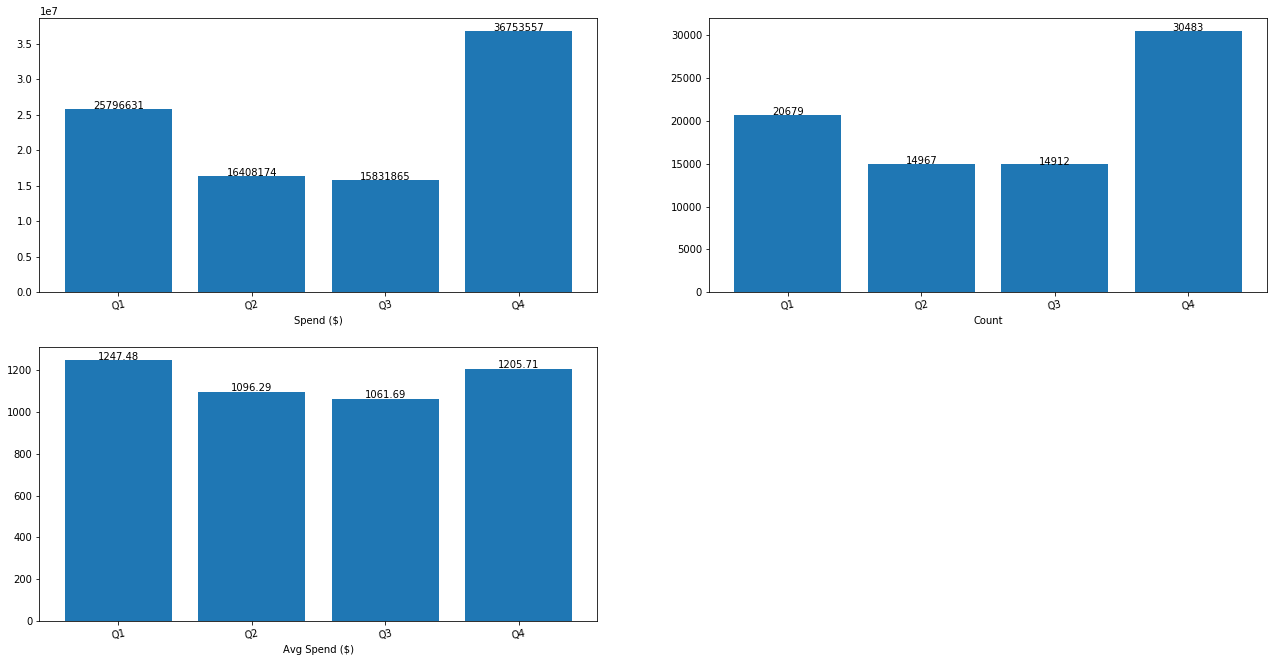

In [251]:
bar(q[0])


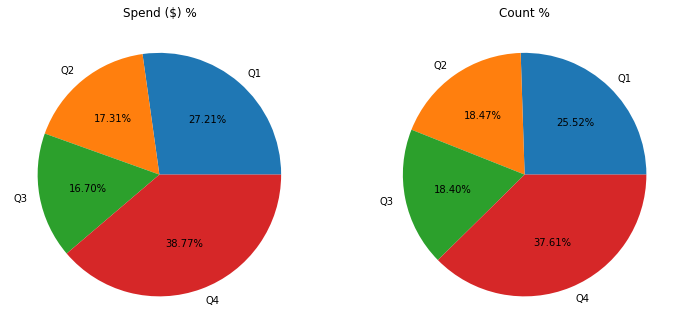

In [252]:
pie(q[1])



### `Quarters:`
- #### Tata gave most focus on the Q4, not like other brands who spent more on the Q1.
- #### Average spend in all quarters is quiet symmetric.

In [253]:
display_side_by_side(d[0],d[1],titles=[])

,Spend ($),Count,Avg Spend ($)
Dayparts,,,
DAYTIME,16513542,17745,930.60
EARLY FRINGE,6058611,5346,1133.30
EARLY MORNING,7110565,9226,770.71
EVENING NEWS,5829272,3007,1938.57
LATE FRINGE,11161135,11137,1002.17
OVERNIGHT,2552537,5819,438.66
PRIME ACCESS,5799904,3030,1914.16
PRIME TIME,25652452,13553,1892.75
WEEKEND,14112209,12178,1158.83


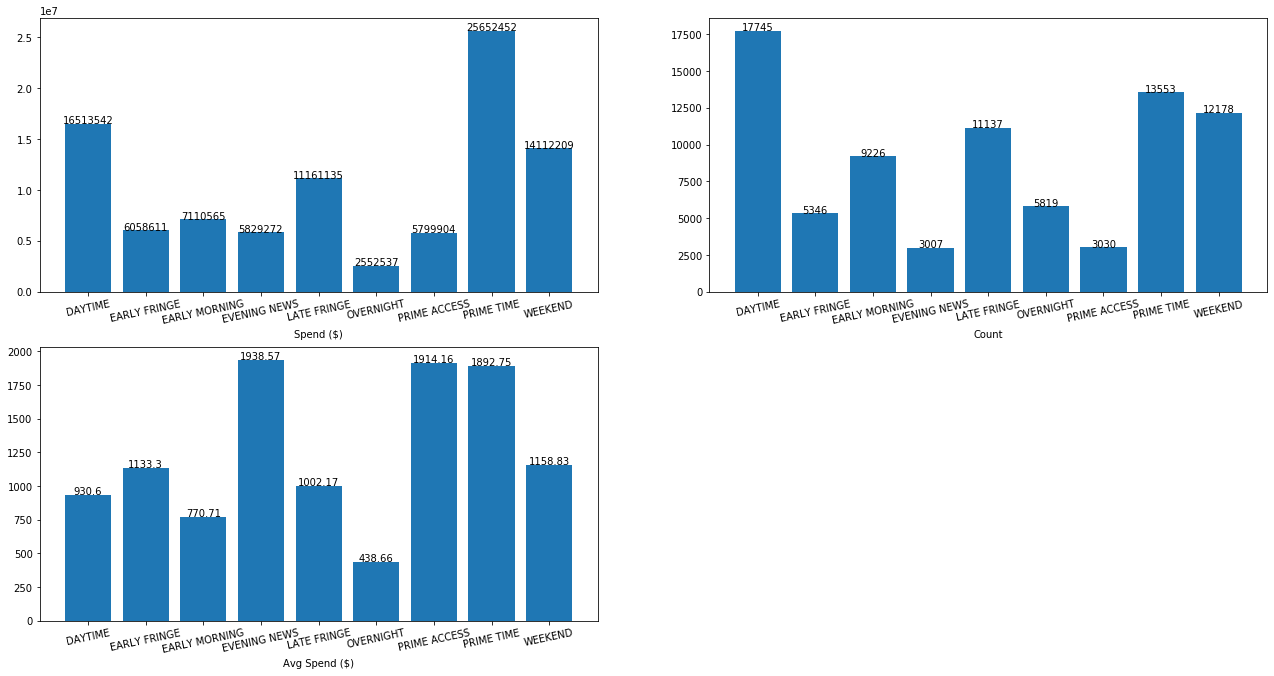

In [254]:
bar(d[0])


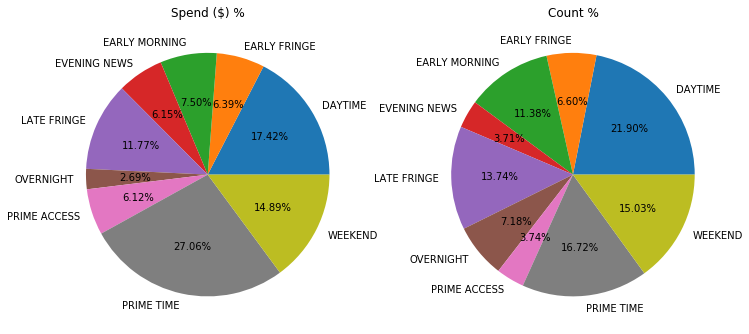

In [255]:
pie(d[1])


### `Dayparts:`
- #### Tata Motors prefer to run their advs during the Daytime, Weekend, Primetime, Late-fringe and Early-morning shows.
- #### For the primetime show, Tata Motors spend 27% of it's budget, and for the weekend show 15%, for the daytime show 17% & for the late-fringe show 12%. 

In [256]:
display_side_by_side(t[0],t[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 TimeZone 
 
 
 
 
 
 
 
 Central India 
 137828 
 309 
 446.05 
 
 
 Northeast India 
 87529847 
 78897 
 1109.42 
 
 
 Northern India 
 66497 
 17 
 3911.59 
 
 
 Southern India 
 7056055 
 1818 
 3881.22 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 TimeZone 
 
 
 
 
 
 
 Central India 
 0.145403 
 0.381288 
 
 
 Northeast India 
 92.340582 
 97.354426 
 
 
 Northern India 
 0.070152 
 0.020977 
 
 
 Southern India 
 7.443863 
 2.243309

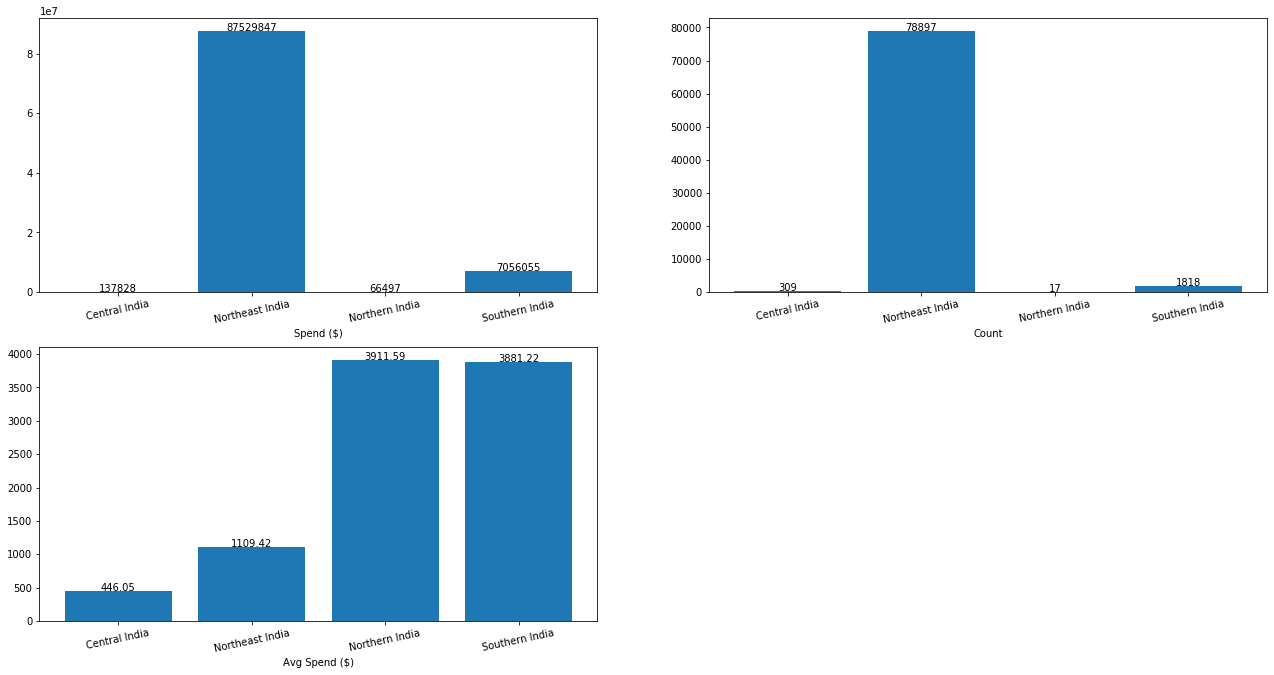

In [257]:
bar(t[0])

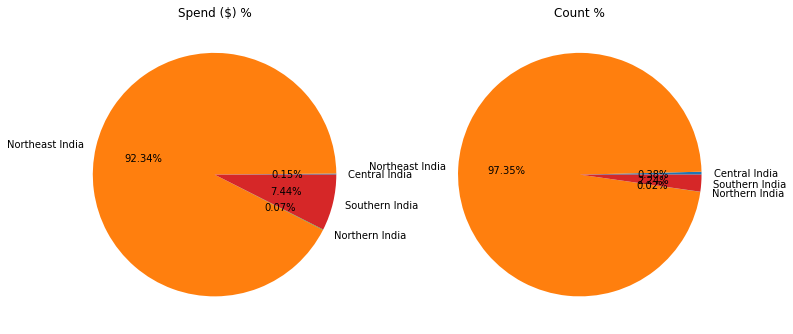

In [258]:
pie(t[1])


### `Timezone:`
- #### More than 95% of the Advs were ran on the Northeast India timezone, also 92% of the budget were allocated for this timezone.
- #### The average spend on Advs in the Northern India, Southern India timezone is higher than other timezones.


In [259]:
display_side_by_side(n[0],n[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Network Type 
 
 
 
 
 
 
 
 broadcast 
 29303349 
 6127 
 4782.66 
 
 
 cable 
 65486878 
 74914 
 874.16 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Network Type 
 
 
 
 
 
 
 broadcast 
 30.913893 
 7.560371 
 
 
 cable 
 69.086107 
 92.439629

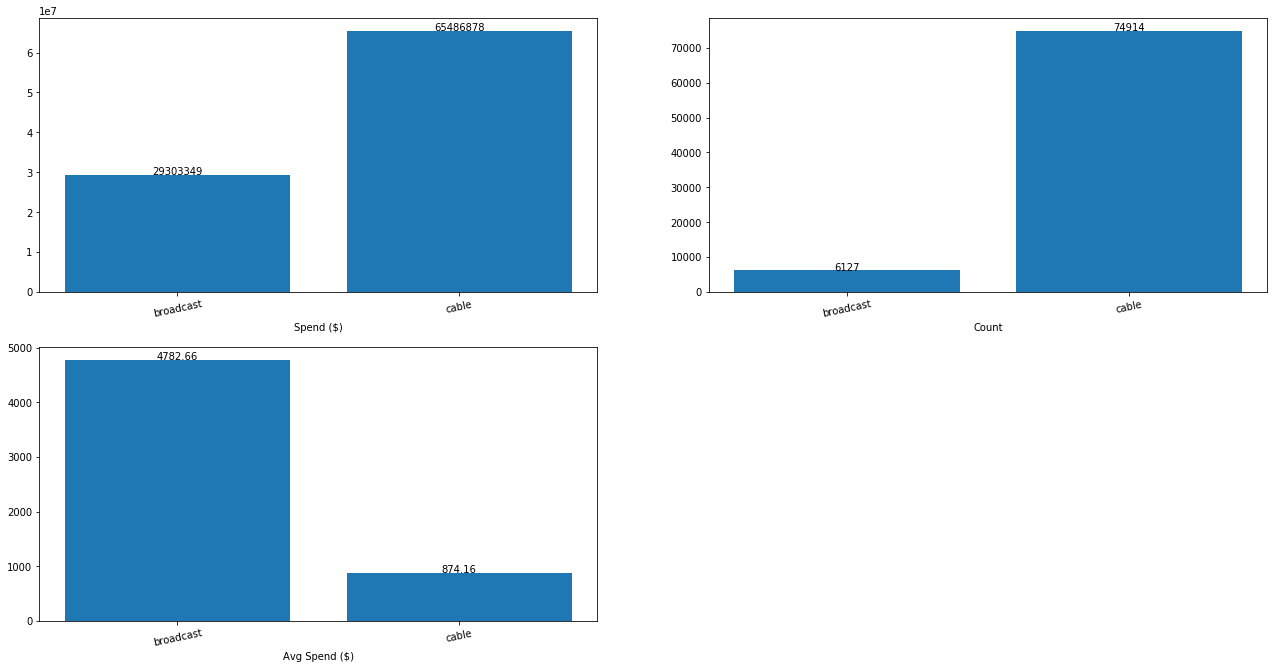

In [260]:
bar(n[0])

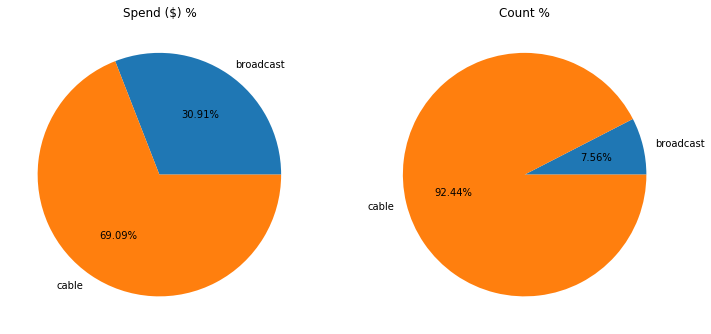

In [261]:
pie(n[1])

### `Network:`
- #### 92% of the Advs were ran on the Cable network, and 69% of the budget were allocated for this network.
- #### Though the spend on the cable network is higher than the boradcast network, but the average spend on the Broadcast network is way more higher than the cable network.

### `Products:`
- #### Tata Motors has 3 products, they are 'Tata Tiago', 'Tata Safari', 'Tata Nexon'.
- #### 5 times Tata Motors's advertisements were at Pod position 1 without spending a singel penny.
- ####  Tata Motors spend most for promoting `Tata Nexon`, on 01-12-2021 at PRIME TIME show.
- #### Out of total advertisements ran by Tata Motors brand, nearly 62% of Advs were for the promotion of Tata Nexon, also out of total budget 72% was spend for this product.



### `Quarters:`
- #### Tata gave most focus on the Q4, not like other brands who spent more on the Q1.
- #### Average spend in all quarters is quiet symmetric.

### `Dayparts:`
- #### Tata Motors prefer to run their advs during the Daytime, Weekend, Primetime, Late-fringe and Early-morning shows.
- #### For the primetime show, Tata Motors spend 27% of it's budget, and for the weekend show 15%, for the daytime show 17% & for the late-fringe show 12%. 


### `Timezone:`
- #### More than 95% of the Advs were ran on the Northeast India timezone, also 92% of the budget were allocated for this timezone.
- #### The average spend on Advs in the Northern India, Southern India timezone is higher than other timezones.


### `Network:`
- #### 92% of the Advs were ran on the Cable network, and 69% of the budget were allocated for this network.
- #### Though the spend on the cable network is higher than the boradcast network, but the average spend on the Broadcast network is way more higher than the cable network.

## <u>`Mahindra and Mahindra`

In [262]:
data.loc[data['Brand']=='Mahindra and Mahindra',:]['Product'].unique()

array(['Mahindra XUV 700', 'Mahindra New Thar', 'Mahindra Scorpio'],
      dtype=object)

In [263]:
len(data.loc[data['Brand']=='Mahindra and Mahindra',:]['Product'].unique())

3

- #### Mahindra and Mahindra has 3 products, they are 'Mahindra XUV 700', 'Mahindra New Thar', 'Mahindra Scorpio'

In [264]:
data.loc[(data['Brand']=='Mahindra and Mahindra') & (data['Pod Position']==1) & (data['Spend ($)']==0),:]

,Id,Brand,Product,Network,Network Type,Show,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Week,Day Of Week,Hour Of Day,TimeZone,Date_Time,Broadcast Month,Day_Time,Quarters
161031,1161032,Mahindra and Mahindra,Mahindra New Thar,N-10092,cable,S-10956,1,WEEKEND,30,1.0,0,11,Sun,9,Northeast India,2021-03-14 09:31:39,Mar,Early-morning,Q1
164085,1164086,Mahindra and Mahindra,Mahindra New Thar,N-10092,cable,S-10956,1,WEEKEND,30,1.0,0,11,Sun,10,Northeast India,2021-03-14 10:08:40,Mar,Morning,Q1
274347,1274348,Mahindra and Mahindra,Mahindra New Thar,N-10090,cable,S-14276,1,OVERNIGHT,30,1.0,0,18,Sun,2,Southern India,2021-05-02 02:21:59,May,Mid-night,Q2
289548,1289549,Mahindra and Mahindra,Mahindra New Thar,N-10090,cable,S-22140,1,OVERNIGHT,30,1.0,0,18,Sun,4,Southern India,2021-05-02 04:58:17,May,Mid-night,Q2
357011,1357012,Mahindra and Mahindra,Mahindra New Thar,N-10090,cable,S-14276,1,PRIME TIME,30,1.0,0,23,Fri,22,Southern India,2021-06-04 22:00:49,Jun,Night,Q2
380256,1380257,Mahindra and Mahindra,Mahindra New Thar,N-10090,cable,S-10956,1,EVENING NEWS,30,1.0,0,25,Thurs,18,Southern India,2021-06-17 18:25:43,Jun,Evening,Q2
409320,1409321,Mahindra and Mahindra,Mahindra New Thar,N-10090,cable,S-14276,1,WEEKEND,30,1.0,0,28,Sun,18,Southern India,2021-07-11 18:57:17,Jul,Evening,Q3
411263,1411264,Mahindra and Mahindra,Mahindra New Thar,N-10090,cable,S-22137,1,DAYTIME,30,1.0,0,27,Tues,12,Southern India,2021-06-29 12:22:49,Jun,Afternoon,Q2
427579,1427580,Mahindra and Mahindra,Mahindra New Thar,N-10090,cable,S-10956,1,PRIME TIME,30,1.0,0,27,Wed,22,Southern India,2021-06-30 22:43:22,Jun,Night,Q2
437493,1437494,Mahindra and Mahindra,Mahindra New Thar,N-10090,cable,S-14276,1,PRIME TIME,30,1.0,0,30,Mon,22,Southern India,2021-07-19 22:19:50,Jul,Night,Q3


In [265]:
data.loc[(data['Brand']=='Mahindra and Mahindra') & (data['Pod Position']==1) & (data['Spend ($)']==0),:].shape

(210, 19)

- #### ⬆️⬆️ Above 210 times Mahindra and Mahindra's advertisements were at Pod position 1 without spending a singel penny.

In [266]:
sca

,Spend ($),Count,Avg Spend ($),Max Spend ($),Min Spend ($)
Brand,,,,,
Honda Cars,48258340,85265,565.98,72902,0
Hyundai Motors India,180808756,71296,2536.03,5500000,0
Mahindra and Mahindra,397305655,147890,2686.49,103048,0
Maruti Suzuki,558646472,280274,1993.22,91596,0
Tata Motors,94790227,81041,1169.66,83935,0
Toyota,112653112,66018,1706.40,92140,0


In [267]:
data.loc[(data['Brand']=='Mahindra and Mahindra') & (data['Spend ($)']==103048),:]

,Id,Brand,Product,Network,Network Type,Show,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Week,Day Of Week,Hour Of Day,TimeZone,Date_Time,Broadcast Month,Day_Time,Quarters
210620,1210621,Mahindra and Mahindra,Mahindra New Thar,N-10002,broadcast,S-10948,6,PRIME TIME,60,2.0,103048,14,Sun,20,Northeast India,2021-04-04 20:18:23,Apr,Evening,Q2


- #### ⬆️⬆️ Mahindra and Mahindra spend most for promoting `Mahindra New Thar`, on 04-04-2021 at PRIME TIME show.

In [268]:
p=product_comapre('Mahindra and Mahindra')
q=quarters_comapre('Mahindra and Mahindra')
d=daypart_comapre('Mahindra and Mahindra')
t=timezone_comapre('Mahindra and Mahindra')
n=network_comapre('Mahindra and Mahindra')

In [269]:
display_side_by_side(p[0],p[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Product 
 
 
 
 
 
 
 
 Mahindra New Thar 
 393217909 
 143449 
 2741.17 
 
 
 Mahindra Scorpio 
 2278229 
 1939 
 1174.95 
 
 
 Mahindra XUV 700 
 1809517 
 2502 
 723.23 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Product 
 
 
 
 
 
 
 Mahindra New Thar 
 98.971133 
 96.997092 
 
 
 Mahindra Scorpio 
 0.573420 
 1.311110 
 
 
 Mahindra XUV 700 
 0.455447 
 1.691798

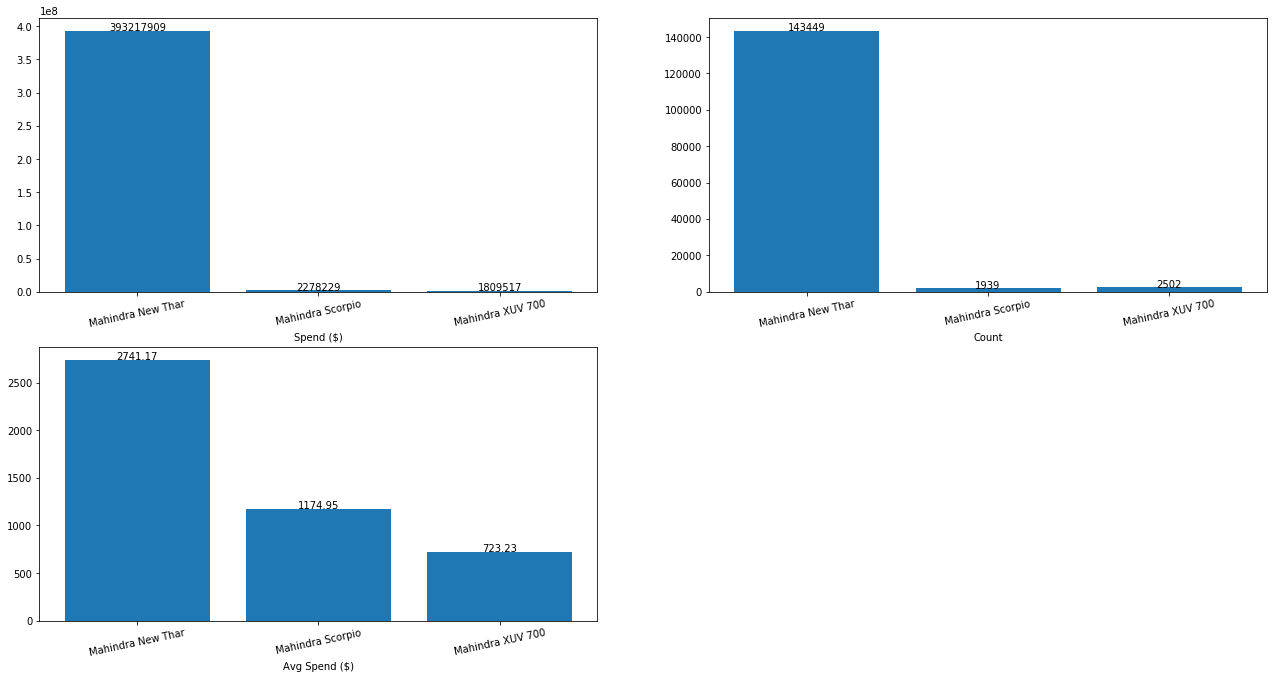

In [270]:
bar(p[0])

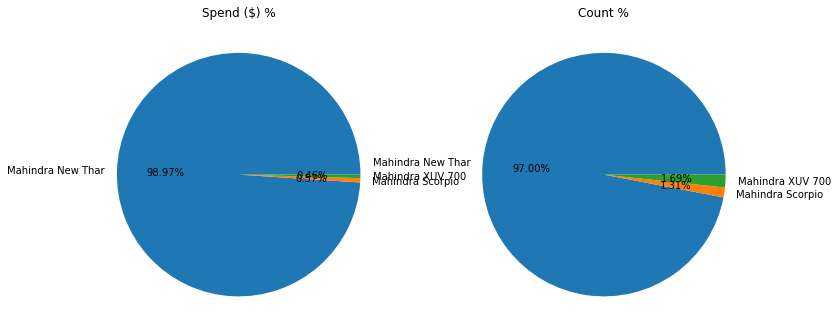

In [271]:
pie(p[1])

### `Products:`
- #### Out of total advertisements ran by Mahindra and Mahindra brand,  97% of Advs were for the promotion of Thar, also out of total budget 99% was spend for this product.


In [272]:
display_side_by_side(q[0],q[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Quarters 
 
 
 
 
 
 
 
 Q1 
 129215380 
 43371 
 2979.30 
 
 
 Q2 
 99500908 
 46244 
 2151.65 
 
 
 Q3 
 95196781 
 39537 
 2407.79 
 
 
 Q4 
 73392586 
 18738 
 3916.78 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Quarters 
 
 
 
 
 
 
 Q1 
 32.522915 
 29.326526 
 
 
 Q2 
 25.043919 
 31.269187 
 
 
 Q3 
 23.960590 
 26.734059 
 
 
 Q4 
 18.472575 
 12.670228

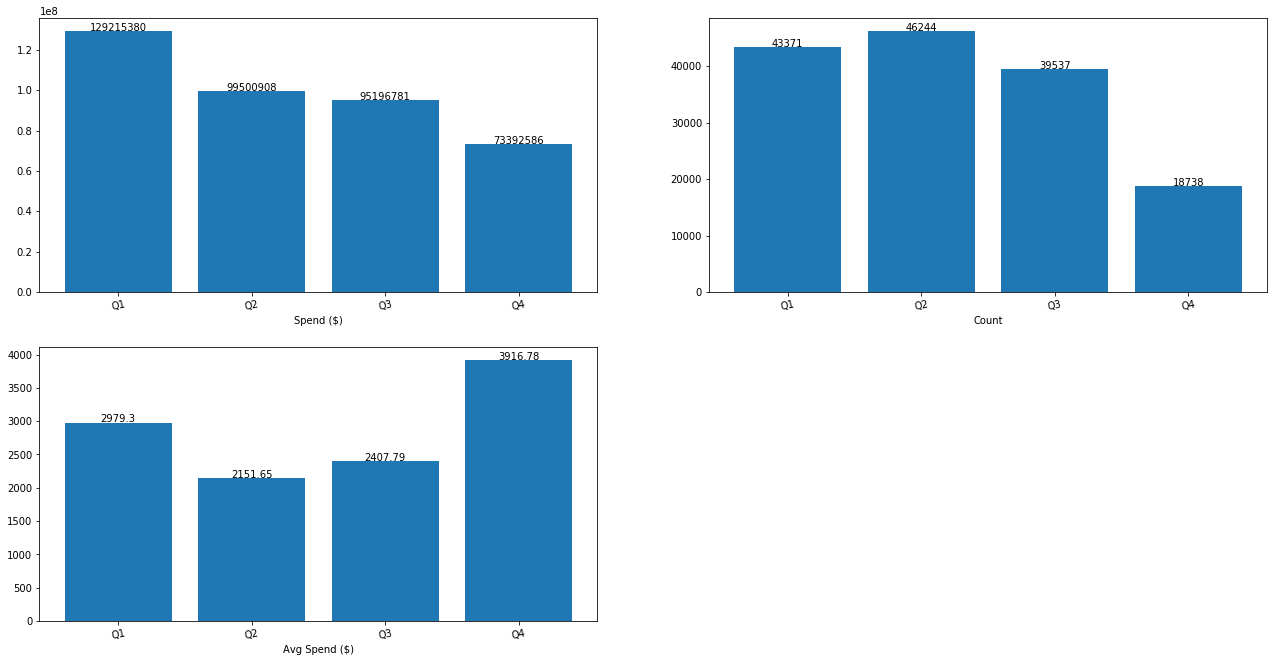

In [273]:
bar(q[0])


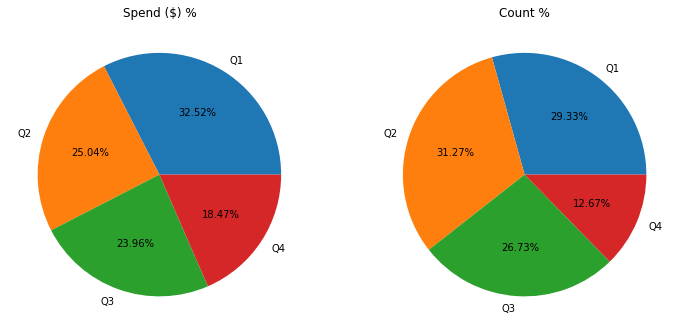

In [274]:
pie(q[1])



### `Quarters:`
- #### During the Q2, Mahindra and Mahindra ran most advs, also spend most money for advs.
- #### After Q1, the budget for the Advs were reduced.
- #### During Q4, Mahindra and Mahindra has heighest per Adv spend.


In [275]:
display_side_by_side(d[0],d[1],titles=[])


,Spend ($),Count,Avg Spend ($)
Dayparts,,,
DAYTIME,64154402,33552,1912.09
EARLY FRINGE,19204408,9335,2057.25
EARLY MORNING,12119383,13999,865.73
EVENING NEWS,16018235,4549,3521.27
LATE FRINGE,41781609,24468,1707.60
OVERNIGHT,8597788,6480,1326.82
PRIME ACCESS,10299276,4038,2550.59
PRIME TIME,152713257,28302,5395.85
WEEKEND,72417297,23167,3125.88


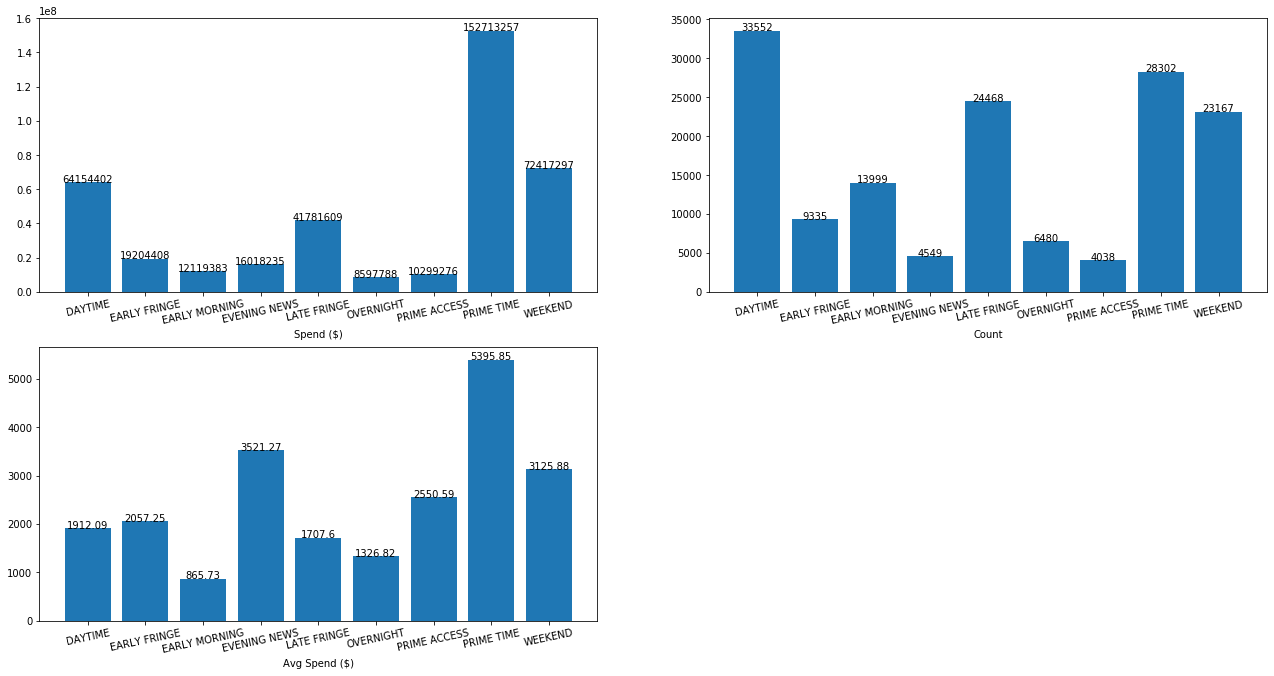

In [276]:
bar(d[0])


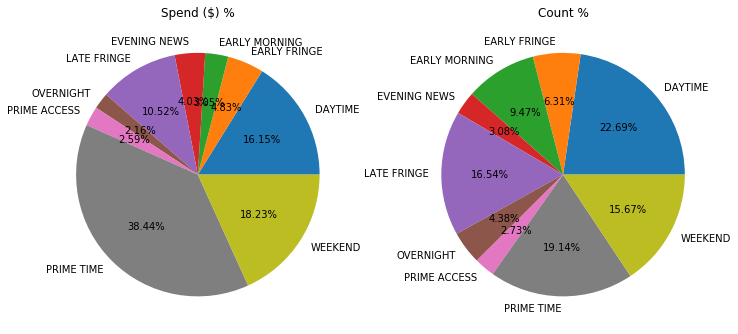

In [277]:
pie(d[1])


### `Dayparts:`
- #### Mahindra and Mahindra prefer to run their advs during the Daytime, Weekend, Primetime and late-fringe shows.
- #### For the primetime show, Mahindra and Mahindra spend 38% of it's budget, and for the weekend show 18%, for the daytime show 16%.

In [278]:
display_side_by_side(t[0],t[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 TimeZone 
 
 
 
 
 
 
 
 Central India 
 951460 
 205 
 4641.27 
 
 
 Northeast India 
 375103729 
 144949 
 2587.83 
 
 
 Northern India 
 191725 
 35 
 5477.86 
 
 
 Southern India 
 21058741 
 2701 
 7796.65 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 TimeZone 
 
 
 
 
 
 
 Central India 
 0.239478 
 0.138617 
 
 
 Northeast India 
 94.411878 
 98.011360 
 
 
 Northern India 
 0.048256 
 0.023666 
 
 
 Southern India 
 5.300388 
 1.826357

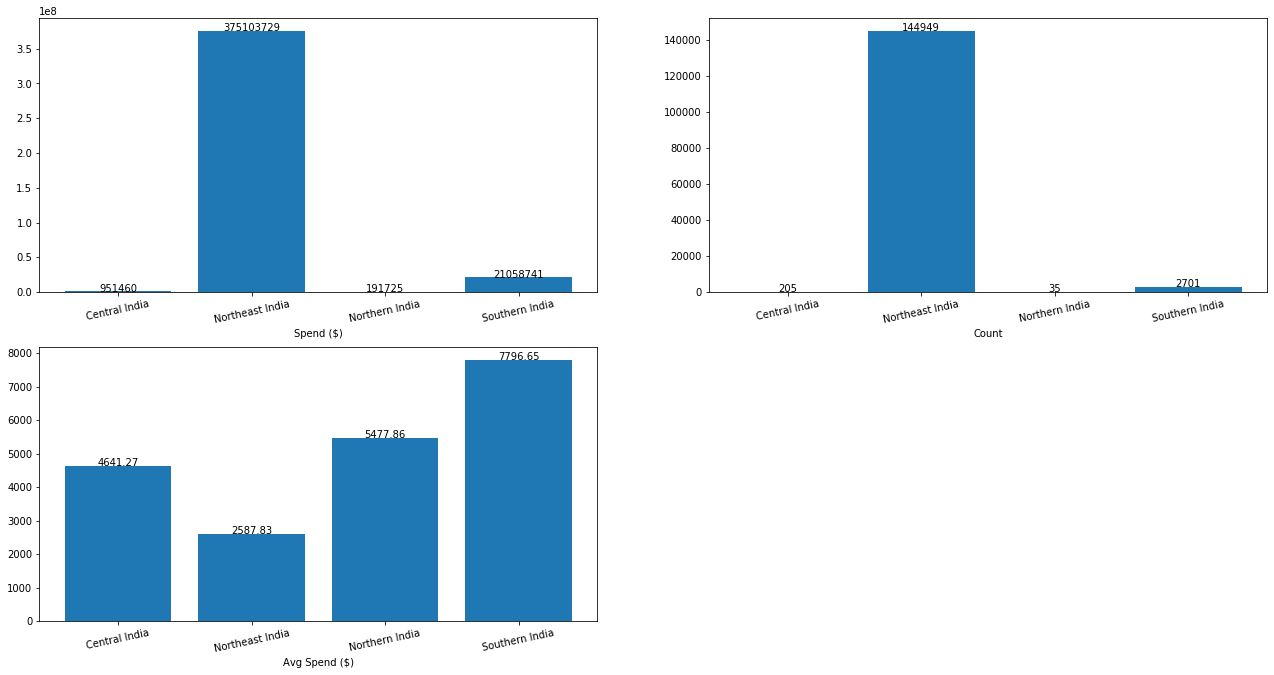

In [279]:
bar(t[0])

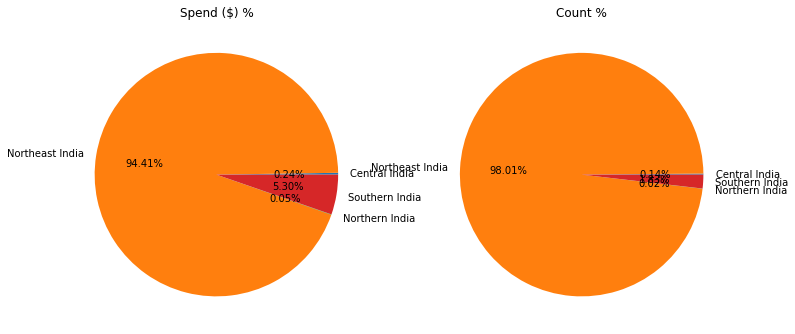

In [280]:
pie(t[1])


### `Timezone:`
- #### More than 95% of the Advs were ran on the Northeast India timezone, also 94% of the budget were allocated for this timezone.
- #### The average spend on Advs in the Southern India & Northern India timezone is higher than other timezones.


In [281]:
display_side_by_side(n[0],n[1],titles=[])


Spend ($) 
 Count 
 Avg Spend ($) 
 
 
 Network Type 
 
 
 
 
 
 
 
 broadcast 
 181166689 
 13814 
 13114.72 
 
 
 cable 
 216138966 
 134076 
 1612.06 
 
 
 
 
 
 
 Spend ($) % 
 Count % 
 
 
 Network Type 
 
 
 
 
 
 
 broadcast 
 45.59882 
 9.340726 
 
 
 cable 
 54.40118 
 90.659274

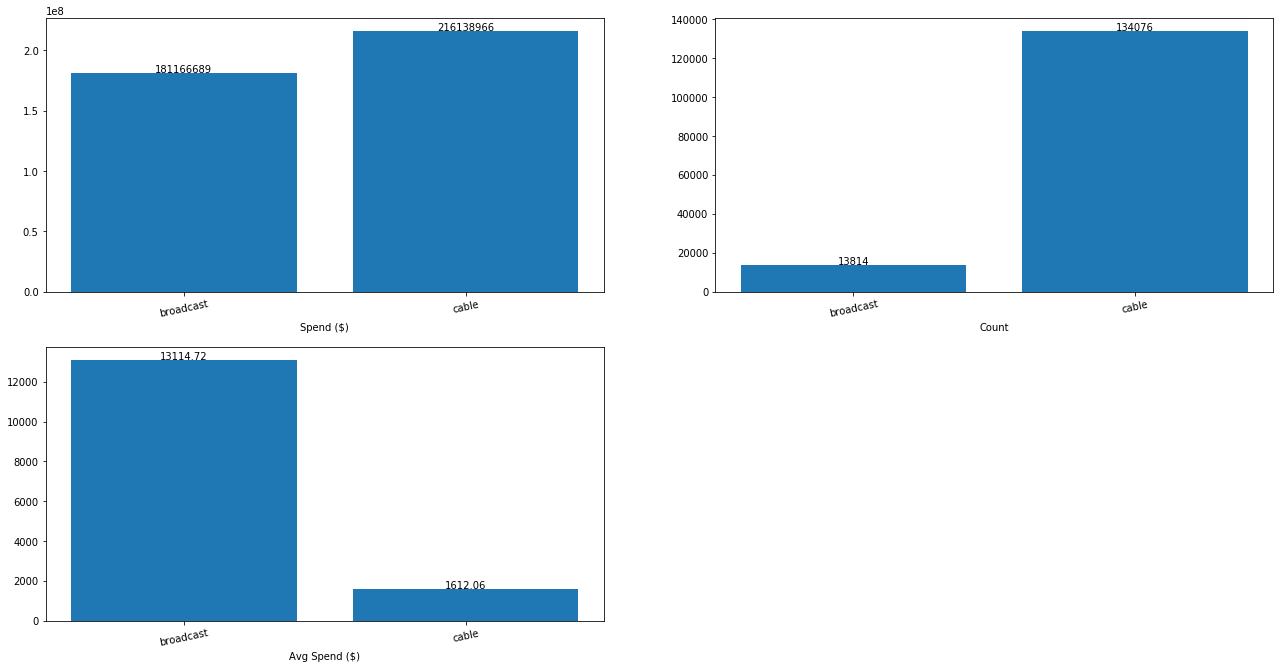

In [282]:
bar(n[0])

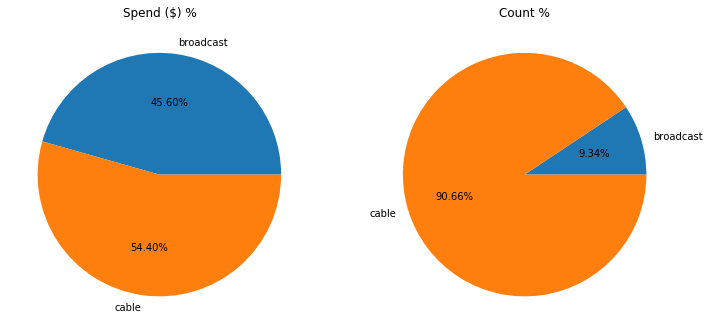

In [283]:
pie(n[1])

### `Network:`
- #### 90% of the Advs were ran on the Cable network, and 54% of the budget were allocated for this network.
- #### Though the spend on the cable network is bit higher than the boradcast network, but the average spendon the Broadcast network is way more higher than the cable network.

### `Products:`
- #### Mahindra and Mahindra has 3 products, they are 'Mahindra XUV 700', 'Mahindra New Thar', 'Mahindra Scorpio'
- #### 210 times Mahindra and Mahindra's advertisements were at Pod position 1 without spending a singel penny.
- #### Mahindra and Mahindra spend most for promoting `Mahindra New Thar`, on 04-04-2021 at PRIME TIME show.
- #### Out of total advertisements ran by Mahindra and Mahindra brand,  97% of Advs were for the promotion of Thar, also out of total budget 99% was spend for this product.



### `Quarters:`
- #### During the Q2, Mahindra and Mahindra ran most advs, also spend most money for advs.
- #### After Q1, the budget for the Advs were reduced.
- #### During Q4, Mahindra and Mahindra has heighest per Adv spend.


### `Dayparts:`
- #### Mahindra and Mahindra prefer to run their advs during the Daytime, Weekend, Primetime and late-fringe shows.
- #### For the primetime show, Mahindra and Mahindra spend 38% of it's budget, and for the weekend show 18%, for the daytime show 16%.


### `Timezone:`
- #### More than 95% of the Advs were ran on the Northeast India timezone, also 94% of the budget were allocated for this timezone.
- #### The average spend on Advs in the Southern India & Northern India timezone is higher than other timezones.


### `Network:`
- #### 90% of the Advs were ran on the Cable network, and 54% of the budget were allocated for this network.
- #### Though the spend on the cable network is bit higher than the boradcast network, but the average spendon the Broadcast network is way more higher than the cable network.

# Q4. Mahindra and Mahindra wants to run a digital ad campaign to complement its existing TV ads in Q1 of 2022. Based on the data from 2021, suggest a media plan to the CMO of Mahindra and Mahindra. Which audience should they target? *Assume XYZ Ads has the ad viewership data and TV viewership for the people in India. 

In [284]:
mm = data.loc[data['Brand']=='Mahindra and Mahindra',:]

In [285]:
mm.head()

,Id,Brand,Product,Network,Network Type,Show,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Week,Day Of Week,Hour Of Day,TimeZone,Date_Time,Broadcast Month,Day_Time,Quarters
23,1000024,Mahindra and Mahindra,Mahindra XUV 700,N-10103,cable,S-22277,1,EARLY FRINGE,20,0.67,417,1,Fri,16,Northeast India,2021-01-01 16:28:54,Jan,Afternoon,Q1
24,1000025,Mahindra and Mahindra,Mahindra New Thar,N-10016,cable,S-16132,2,DAYTIME,30,1.00,116,3,Wed,12,Northeast India,2021-01-13 12:15:52,Jan,Afternoon,Q1
25,1000026,Mahindra and Mahindra,Mahindra XUV 700,N-10010,cable,S-22198,6,EARLY MORNING,20,0.67,151,1,Sat,6,Northeast India,2021-01-02 06:52:36,Jan,Early-morning,Q1
30,1000031,Mahindra and Mahindra,Mahindra New Thar,N-10058,cable,S-19523,4,WEEKEND,30,1.00,780,1,Sat,16,Northeast India,2021-01-02 16:53:16,Jan,Afternoon,Q1
39,1000040,Mahindra and Mahindra,Mahindra New Thar,N-10099,cable,S-17876,7,WEEKEND,30,1.00,1362,3,Sat,11,Northeast India,2021-01-16 11:21:57,Jan,Morning,Q1


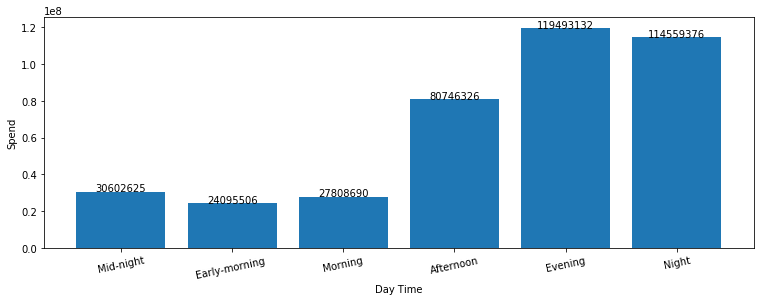

In [287]:
dt=mm.pivot_table(values='Spend ($)', index=['Day_Time'],aggfunc='sum')
plt.figure(figsize=(150,50))           
ax = plt.subplot(10,10,1)
plt.bar(dt['Spend ($)'].index,dt['Spend ($)'].values)
plt.xticks(rotation = 12)
plt.xlabel('Day Time')
plt.ylabel('Spend') 
#plt.title('Cable Network')
for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    height,
                    ha="center")

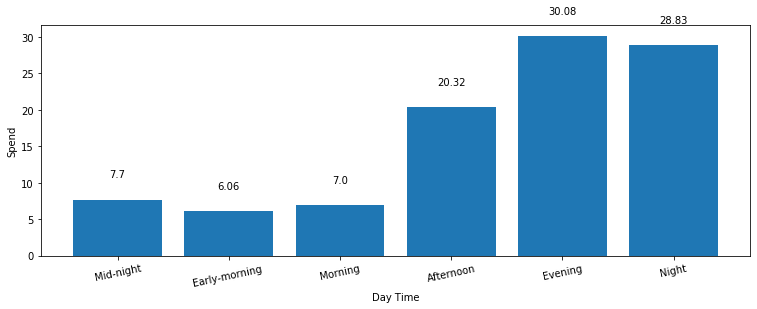

In [288]:
dt=mm.pivot_table(values='Spend ($)', index=['Day_Time'],aggfunc='sum')
plt.figure(figsize=(150,50))           
ax = plt.subplot(10,10,1)
plt.bar(dt['Spend ($)'].index,((100*dt['Spend ($)'].values)/dt['Spend ($)'].sum()).round(2))
plt.xticks(rotation = 12)
plt.xlabel('Day Time')
plt.ylabel('Spend') 
for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    height,
                    ha="center")

##### `Time of the day`
- Eary-Morning  5 am to 9 am
- Morning       9 am to 12 pm
- Afternoon     12 pm to 5 pm
- Evening       5 pm to 9 pm
- Night         9 pm to 12 am
- Mid-Night     12 am to 5 am

- #### During Early-Morning M&M should run more advs, as people tends to watch TV/Shows before going to the work.

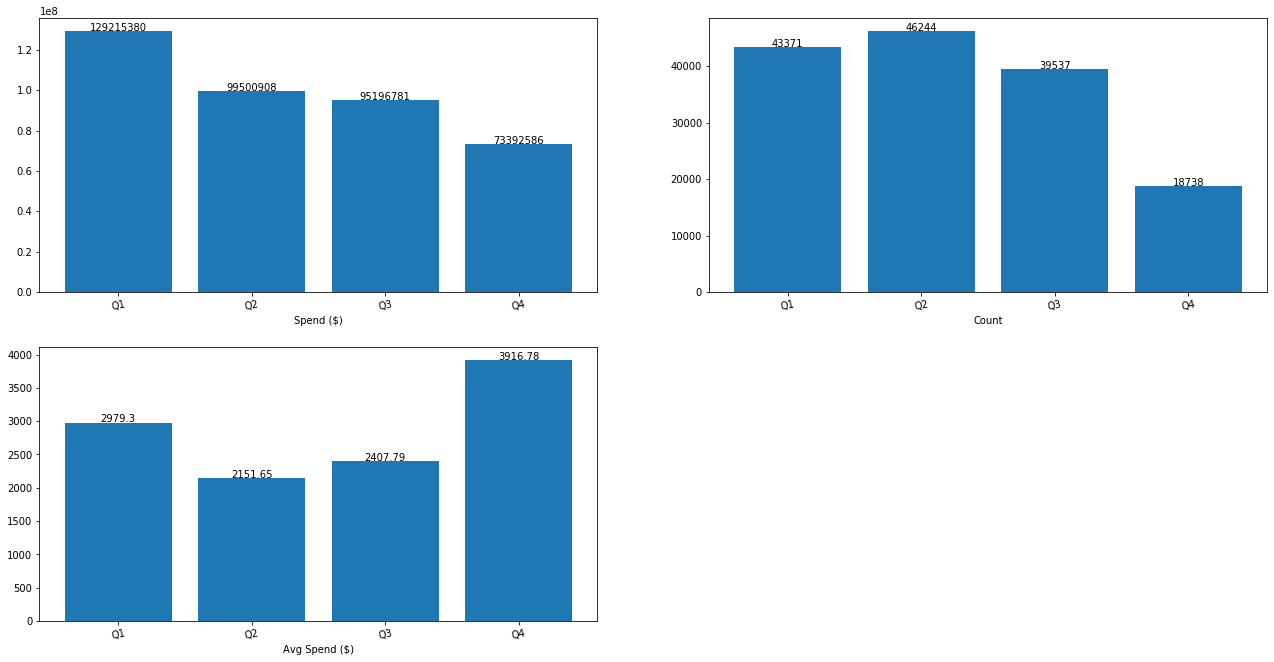

In [289]:
(73392586-95196781)/95196781

-0.2290434064151812

In [290]:
(18738-39537)/39537

-0.5260641930343729

- #### Perviously we see that M&M most advs were runnig @Q2 and most spending were @Q1 and there is 52% downfall in ads count and 23% downfall in ads spend from Q3 to Q4 , but we found out that Spend v/s Pod position has maximum correaltion @Q4. So M&M should give more focus on the Q4. Because in India Q4 is a festival season (Durga Puja,Diwali,Bhaiphota...etc), at this time people get more free time to watch TV/Shows, also during festival time people love to spend.

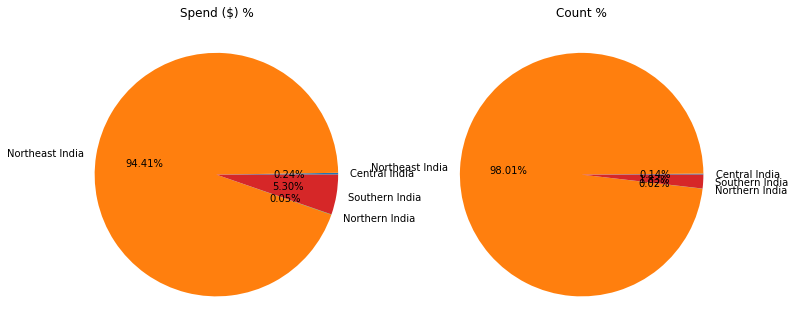

- #### M&M had ran their 98% of the advs and spends 94% of budgets in  the Northern India timezone only, M&M should run their ads in the other timezone also, it would help them to register it's presence in Pan India.